# Credit Risk Assessment Using Selected Machine Learning Algorithms

Name - Debanjan Das <br>
Student ID - 17202833 <br>
Project completed under the supervision of Professor Mark Keane. 

# Content And Approach

 <b> 1. Introduction </b>
 
 <b> 2. Data Collection and Cleaning </b>
  
 <b> 3. Data Analysis (Various factors) and Visualization. </b>
     * Age
     * Housing
     * Gender Analysis
     * Impact of job status on loan outcome.
     * Credit Amount Distribution
     * Savings Account exploration
     * Checking Account Variable
     * Wealth Analysis 
     * Loan Purpose
     * Impact of loan duration on loan outcome. 
 <b> 4. Exploring Machine learning classifier models. </b>
     * XGBoost Model
         1. Original Dataset - ROC AUC 
         2. Balanced Dataset - ROC AUC
     * Logistic Regression
         1. Original Dataset - ROC AUC 
         2. Balanced Dataset - ROC AUC
     * Random Forest
         1. Original Dataset - ROC AUC 
         2. Balanced Dataset - ROC AUC
     * Neural Networks 
         1. Original Dataset - ROC AUC 
         2. Balanced Dataset - ROC AUC
     * Comparison of ML models 
     
 <b> 5. Clustering </b> <br>
     * Finding the optimal K using optimal method and Affinity Propagation 
     * Clusters based on Age, duration and credit amount (Customer Segmentation) 
     
 <b> 6. Classification on Clusters </b> <br>
     * Attempt with 2 clusters (K=2) 
     * Attempt with 3 clusters (K=3)
     Note: K has been determined by elbow method
 
 <b> 7. Data Simulation for a pandemic </b> <br>
 
 <b> 8. Conclusion </b> <br>

## 1. Introduction 

It is important for a bank to assess its credit risk and the extent of its exposure in the event of
non-performing customers. Statistical approaches have been used to estimate this type of risk for
decades, and with recent advances in the field of machine learning, there has been an interest
in seeing whether machine learning algorithms can achieve better risk quantification. The aim
of this study is to see which approach from a collection of machine learning techniques performs
the best in default prediction when model evaluation parameters are chosen. Logistic Regression,
Random Forest, XGBoost, and Artificial Neural Network were the techniques studied. To address
the imbalance between classes for the response variable, an oversampling technique known as
SMOTE was used. In order to enhance model accuracy, data was divided into clusters, followed
by the deployment of Machine Learning models on each of these clusters. In terms of the chosen
model evaluation metric, the results showed that XGBoost with hyperparameter tuning achieved
the best result. An attempt has also been made to simulate data in a pandemic environment and
the built-in model has been adjusted accordingly to assess credit risk.

In [1]:
#Importing necessary packages in Python 
%matplotlib inline 
import matplotlib.pyplot as plt 

import numpy as np ; np.random.seed(sum(map(ord, "aesthetics")))
import pandas as pd

from sklearn.datasets import make_classification 
#from sklearn.learning_curve import learning_curve 
#from sklearn.cross_validation import train_test_split 
#from sklearn.grid_search import GridSearchCV
#from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import ShuffleSplit,train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler

import seaborn 
seaborn.set_context('notebook') 
seaborn.set_style(style='darkgrid')

from pprint import pprint 

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Data collection and cleaning

In [2]:
data =  pd.read_csv("german_credit (1).csv",index_col=0)

## https://github.com/adriangasinski/datahacking_0001/blob/master/00_german_credit.R

In [3]:
data = data.reset_index()

In [5]:
data = data.rename(columns={"default": "classification"})
data.head(5)

classification account_check_status  duration_in_month  \
0               0               < 0 DM                  6   
1               1    0 <= ... < 200 DM                 48   
2               0  no checking account                 12   
3               0               < 0 DM                 42   
4               1               < 0 DM                 24   

                                      credit_history  \
0  critical account/ other credits existing (not ...   
1           existing credits paid back duly till now   
2  critical account/ other credits existing (not ...   
3           existing credits paid back duly till now   
4                    delay in paying off in the past   

                        purpose  credit_amount                      savings  \
0           domestic appliances           1169  unknown/ no savings account   
1           domestic appliances           5951                 ... < 100 DM   
2  (vacation - does not exist?)           2096                 ... < 100 DM   
3              radio/television           7882                 ... < 100 DM   
4                     car (new)           4870                 ... < 100 DM   

    present_emp_since  installment_as_income_perc  \
0       .. >= 7 years                           4   
1  1 <= ... < 4 years                           2   
2  4 <= ... < 7 years                           2   
3  4 <= ... < 7 years                           2   
4  1 <= ... < 4 years                           3   

                   personal_status_sex  ... present_res_since  \
0                        male : single  ...                 4   
1  female : divorced/separated/married  ...                 2   
2                        male : single  ...                 3   
3                        male : single  ...                 4   
4                        male : single  ...                 4   

                                            property age  \
0                                        real estate  67   
1                                        real estate  22   
2                                        real estate  49   
3  if not A121 : building society savings agreeme...  45   
4                              unknown / no property  53   

   other_installment_plans   housing credits_this_bank  \
0                     none       own                 2   
1                     none       own                 1   
2                     none       own                 1   
3                     none  for free                 1   
4                     none  for free                 2   

                           job people_under_maintenance  \
0  skilled employee / official                        1   
1  skilled employee / official                        1   
2         unskilled - resident                        2   
3  skilled employee / official                        2   
4  skilled employee / official                        2   

                                   telephone foreign_worker  
0  yes, registered under the customers name             yes  
1                                       none            yes  
2                                       none            yes  
3                                       none            yes  
4                                       none            yes  

[5 rows x 21 columns]

<b> <u> Attribute 1: (qualitative) </u> </b>

Status of existing checking account

A11 : ... < 0 DM

A12 : 0 <= ... < 200 DM

A13 : ... >= 200 DM / salary assignments for at least 1 year

A14 : no checking account

<b> <u> Attribute 2: (numerical) </u> </b>

Duration in month

<b> <u> Attribute 3: (qualitative) </u> </b>

Credit history

A30 : no credits taken/ all credits paid back duly

A31 : all credits at this bank paid back duly

A32 : existing credits paid back duly till now

A33 : delay in paying off in the past

A34 : critical account/ other credits existing (not at this bank)

<b> <u> Attribute 4: (qualitative) </u> </b>

Purpose

A40 : car (new)

A41 : car (used)

A42 : furniture/equipment

A43 : radio/television

A44 : domestic appliances

A45 : repairs

A46 : education

A47 : (vacation - does not exist?)

A48 : retraining

A49 : business

A410 : others

<b> <u> Attribute 5: (numerical) </u> </b>

Credit amount

<b> <u> Attibute 6: (qualitative) </u> </b>

Savings account/bonds

A61 : ... < 100 DM

A62 : 100 <= ... < 500 DM

A63 : 500 <= ... < 1000 DM

A64 : .. >= 1000 DM

A65 : unknown/ no savings account

<b> <u> Attribute 7: (qualitative) </u> </b>

Present employment since

A71 : unemployed

A72 : ... < 1 year

A73 : 1 <= ... < 4 years

A74 : 4 <= ... < 7 years

A75 : .. >= 7 years

<b> <u> Attribute 8: (numerical) </u> </b>

Installment rate in percentage of disposable income

<b> <u> Attribute 9: (qualitative) </u> </b>

Personal status and sex

A91 : male : divorced/separated

A92 : female : divorced/separated/married

A93 : male : single

A94 : male : married/widowed

A95 : female : single

<b> <u> Attribute 10: (qualitative) </u> </b>

Other debtors / guarantors

A101 : none

A102 : co-applicant

A103 : guarantor

<b> <u> Attribute 11: (numerical) </u> </b>

Present residence since

<b> <u> Attribute 12: (qualitative) </u> </b>

Property

A121 : real estate

A122 : if not A121 : building society savings agreement/ life insurance

A123 : if not A121/A122 : car or other, not in attribute 6

A124 : unknown / no property

<b> <u> Attribute 13: (numerical) </u> </b>

Age in years

<b> <u> Attribute 14: (qualitative) </u> </b>

Other installment plans

A141 : bank

A142 : stores

A143 : none

<b> <u> Attribute 15: (qualitative) </u> </b>

Housing

A151 : rent

A152 : own

A153 : for free

<b> <u> Attribute 16: (numerical) </u> </b>

Number of existing credits at this bank

<b> <u> Attribute 17: (qualitative) </u> </b>

Job

A171 : unemployed/ unskilled - non-resident

A172 : unskilled - resident

A173 : skilled employee / official

A174 : management/ self-employed/

highly qualified employee/ officer

<b> <u> Attribute 18: (numerical) </u> </b>

Number of people being liable to provide maintenance for

<b> <u> Attribute 19: (qualitative) </u> </b>

Telephone

A191 : none

A192 : yes, registered under the customers name

<b> <u> Attribute 20: (qualitative) </u> </b>

foreign worker

A201 : yes

A202 : no

In [6]:
# summarize the shape of the dataset
print(data.shape)

(1000, 21)


In [7]:
# Binarize the y output for easier use of e.g. ROC curves -> 0 = 'bad' credit; 1 = 'good' credit
data.classification.replace([1,0], [0,1], inplace=True)
# Print number of 'good' credits (should be 700) and 'bad credits (should be 300)
data.classification.value_counts()

1    700
0    300
Name: classification, dtype: int64

In [8]:
#numerical variables labels
numvars = ['credit_amount', 'duration_in_month', 'installment_as_income_perc', 'present_res_since', 'age', 
           'credits_this_bank', 'people_under_maintenance', 'classification']

# Standardization
numdata_std = pd.DataFrame(StandardScaler().fit_transform(data[numvars].drop(['classification'], axis=1)))

In [9]:
numdata_std

0         1         2         3         4         5         6
0   -0.745131 -1.236478  0.918477  1.046987  2.766456  1.027079 -0.428290
1    0.949817  2.248194 -0.870183 -0.765977 -1.191404 -0.704926 -0.428290
2   -0.416562 -0.738668 -0.870183  0.140505  1.183312 -0.704926  2.334869
3    1.634247  1.750384 -0.870183  1.046987  0.831502 -0.704926  2.334869
4    0.566664  0.256953  0.024147  1.046987  1.535122  1.027079  2.334869
..        ...       ...       ...       ...       ...       ...       ...
995 -0.544162 -0.738668  0.024147  1.046987 -0.399832 -0.704926 -0.428290
996  0.207612  0.754763  0.918477  1.046987  0.391740 -0.704926 -0.428290
997 -0.874503 -0.738668  0.918477  1.046987  0.215835 -0.704926 -0.428290
998 -0.505528  1.999289  0.918477  1.046987 -1.103451 -0.704926 -0.428290
999  0.462457  1.999289  0.024147  1.046987 -0.751642 -0.704926 -0.428290

[1000 rows x 7 columns]

In [10]:
data.columns

Index(['classification', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [11]:
from collections import defaultdict

#categorical variables labels
catvars = ['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since',
           'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 
           'telephone', 'foreign_worker']

d = defaultdict(LabelEncoder)

# Encoding the variable
lecatdata = data[catvars].apply(lambda x: d[x.name].fit_transform(x))

# print transformations
for x in range(len(catvars)):
    print(catvars[x],": ", data[catvars[x]].unique())
    print(catvars[x],": ", lecatdata[catvars[x]].unique())

#One hot encoding, create dummy variables for every category of every categorical variable
dummyvars = pd.get_dummies(data[catvars])

account_check_status :  ['< 0 DM' '0 <= ... < 200 DM' 'no checking account'
 '>= 200 DM / salary assignments for at least 1 year']
account_check_status :  [1 0 3 2]
credit_history :  ['critical account/ other credits existing (not at this bank)'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'no credits taken/ all credits paid back duly'
 'all credits at this bank paid back duly']
credit_history :  [1 3 2 4 0]
purpose :  ['domestic appliances' '(vacation - does not exist?)' 'radio/television'
 'car (new)' 'car (used)' 'business' 'repairs' 'education'
 'furniture/equipment' 'retraining']
purpose :  [4 0 7 2 3 1 8 5 6 9]
savings :  ['unknown/ no savings account' '... < 100 DM' '500 <= ... < 1000 DM '
 '.. >= 1000 DM ' '100 <= ... < 500 DM']
savings :  [4 1 3 0 2]
present_emp_since :  ['.. >= 7 years' '1 <= ... < 4 years' '4 <= ... < 7 years' 'unemployed'
 '... < 1 year ']
present_emp_since :  [0 2 3 4 1]
personal_status_sex :  ['male : single' 'female : d

In [12]:
data_clean = pd.concat([data[numvars], dummyvars], axis = 1)
data_clean

credit_amount  duration_in_month  installment_as_income_perc  \
0             1169                  6                           4   
1             5951                 48                           2   
2             2096                 12                           2   
3             7882                 42                           2   
4             4870                 24                           3   
..             ...                ...                         ...   
995           1736                 12                           3   
996           3857                 30                           4   
997            804                 12                           4   
998           1845                 45                           4   
999           4576                 45                           3   

     present_res_since  age  credits_this_bank  people_under_maintenance  \
0                    4   67                  2                         1   
1                    2   22                  1                         1   
2                    3   49                  1                         2   
3                    4   45                  1                         2   
4                    4   53                  2                         2   
..                 ...  ...                ...                       ...   
995                  4   31                  1                         1   
996                  4   40                  1                         1   
997                  4   38                  1                         1   
998                  4   23                  1                         1   
999                  4   27                  1                         1   

     classification  account_check_status_0 <= ... < 200 DM  \
0                 1                                       0   
1                 0                                       1   
2                 1                                       0   
3                 1                                       0   
4                 0                                       0   
..              ...                                     ...   
995               1                                       0   
996               1                                       0   
997               1                                       0   
998               0                                       0   
999               1                                       1   

     account_check_status_< 0 DM  ...  housing_own  housing_rent  \
0                              1  ...            1             0   
1                              0  ...            1             0   
2                              0  ...            1             0   
3                              1  ...            0             0   
4                              1  ...            0             0   
..                           ...  ...          ...           ...   
995                            0  ...            1             0   
996                            1  ...            1             0   
997                            0  ...            1             0   
998                            1  ...            0             0   
999                            0  ...            1             0   

     job_management/ self-employed/ highly qualified employee/ officer  \
0                                                    0                   
1                                                    0                   
2                                                    0                   
3                                                    0                   
4                                                    0                   
..                                                 ...                   
995                                                  0                   
996                                                  1                   
997                    

### Feature Importance 

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_clean = data_clean.drop('classification', axis=1)
y_clean = data_clean['classification']
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_clean,y_clean)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_clean.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                                                Specs         Score
0                                       credit_amount  58262.490007
1                                   duration_in_month    321.030795
10           account_check_status_no checking account     63.002659
8                         account_check_status_< 0 DM     48.450469
4                                                 age     30.200309
12  credit_history_critical account/ other credits...     23.344872
15  credit_history_no credits taken/ all credits p...     20.119048
11  credit_history_all credits at this bank paid b...     17.190476
30                savings_unknown/ no savings account     13.645850
46                     property_unknown / no property     13.377860
7              account_check_status_0 <= ... < 200 DM     10.453001
27                               savings_... < 100 DM     10.291479
45                               property_real estate     10.218845
32                    present_emp_since_... < 1 

[0.04708138 0.04945363 0.03259022 0.03158616 0.04017201 0.02005592
 0.01290267 0.01849211 0.03820666 0.00967047 0.05800088 0.01009857
 0.02416501 0.01128313 0.01600854 0.01138696 0.00893984 0.01176182
 0.02076371 0.01032005 0.01692699 0.00517721 0.00254401 0.01606612
 0.00294521 0.00174498 0.00673346 0.02402242 0.01117859 0.00760163
 0.01418574 0.01594331 0.01701443 0.01925724 0.01462719 0.0109848
 0.02072166 0.00889348 0.00963699 0.01938805 0.00840712 0.00980261
 0.01213483 0.01685901 0.01874878 0.01914801 0.01254145 0.01534857
 0.01886779 0.00832454 0.00744283 0.01544277 0.01251454 0.01668838
 0.01834802 0.00284823 0.01407853 0.01727999 0.01836658 0.00338818
 0.00488601]


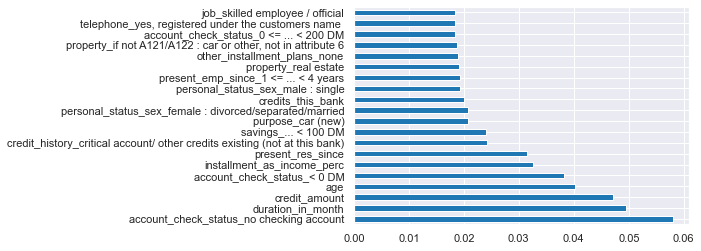

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_clean,y_clean)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_clean.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

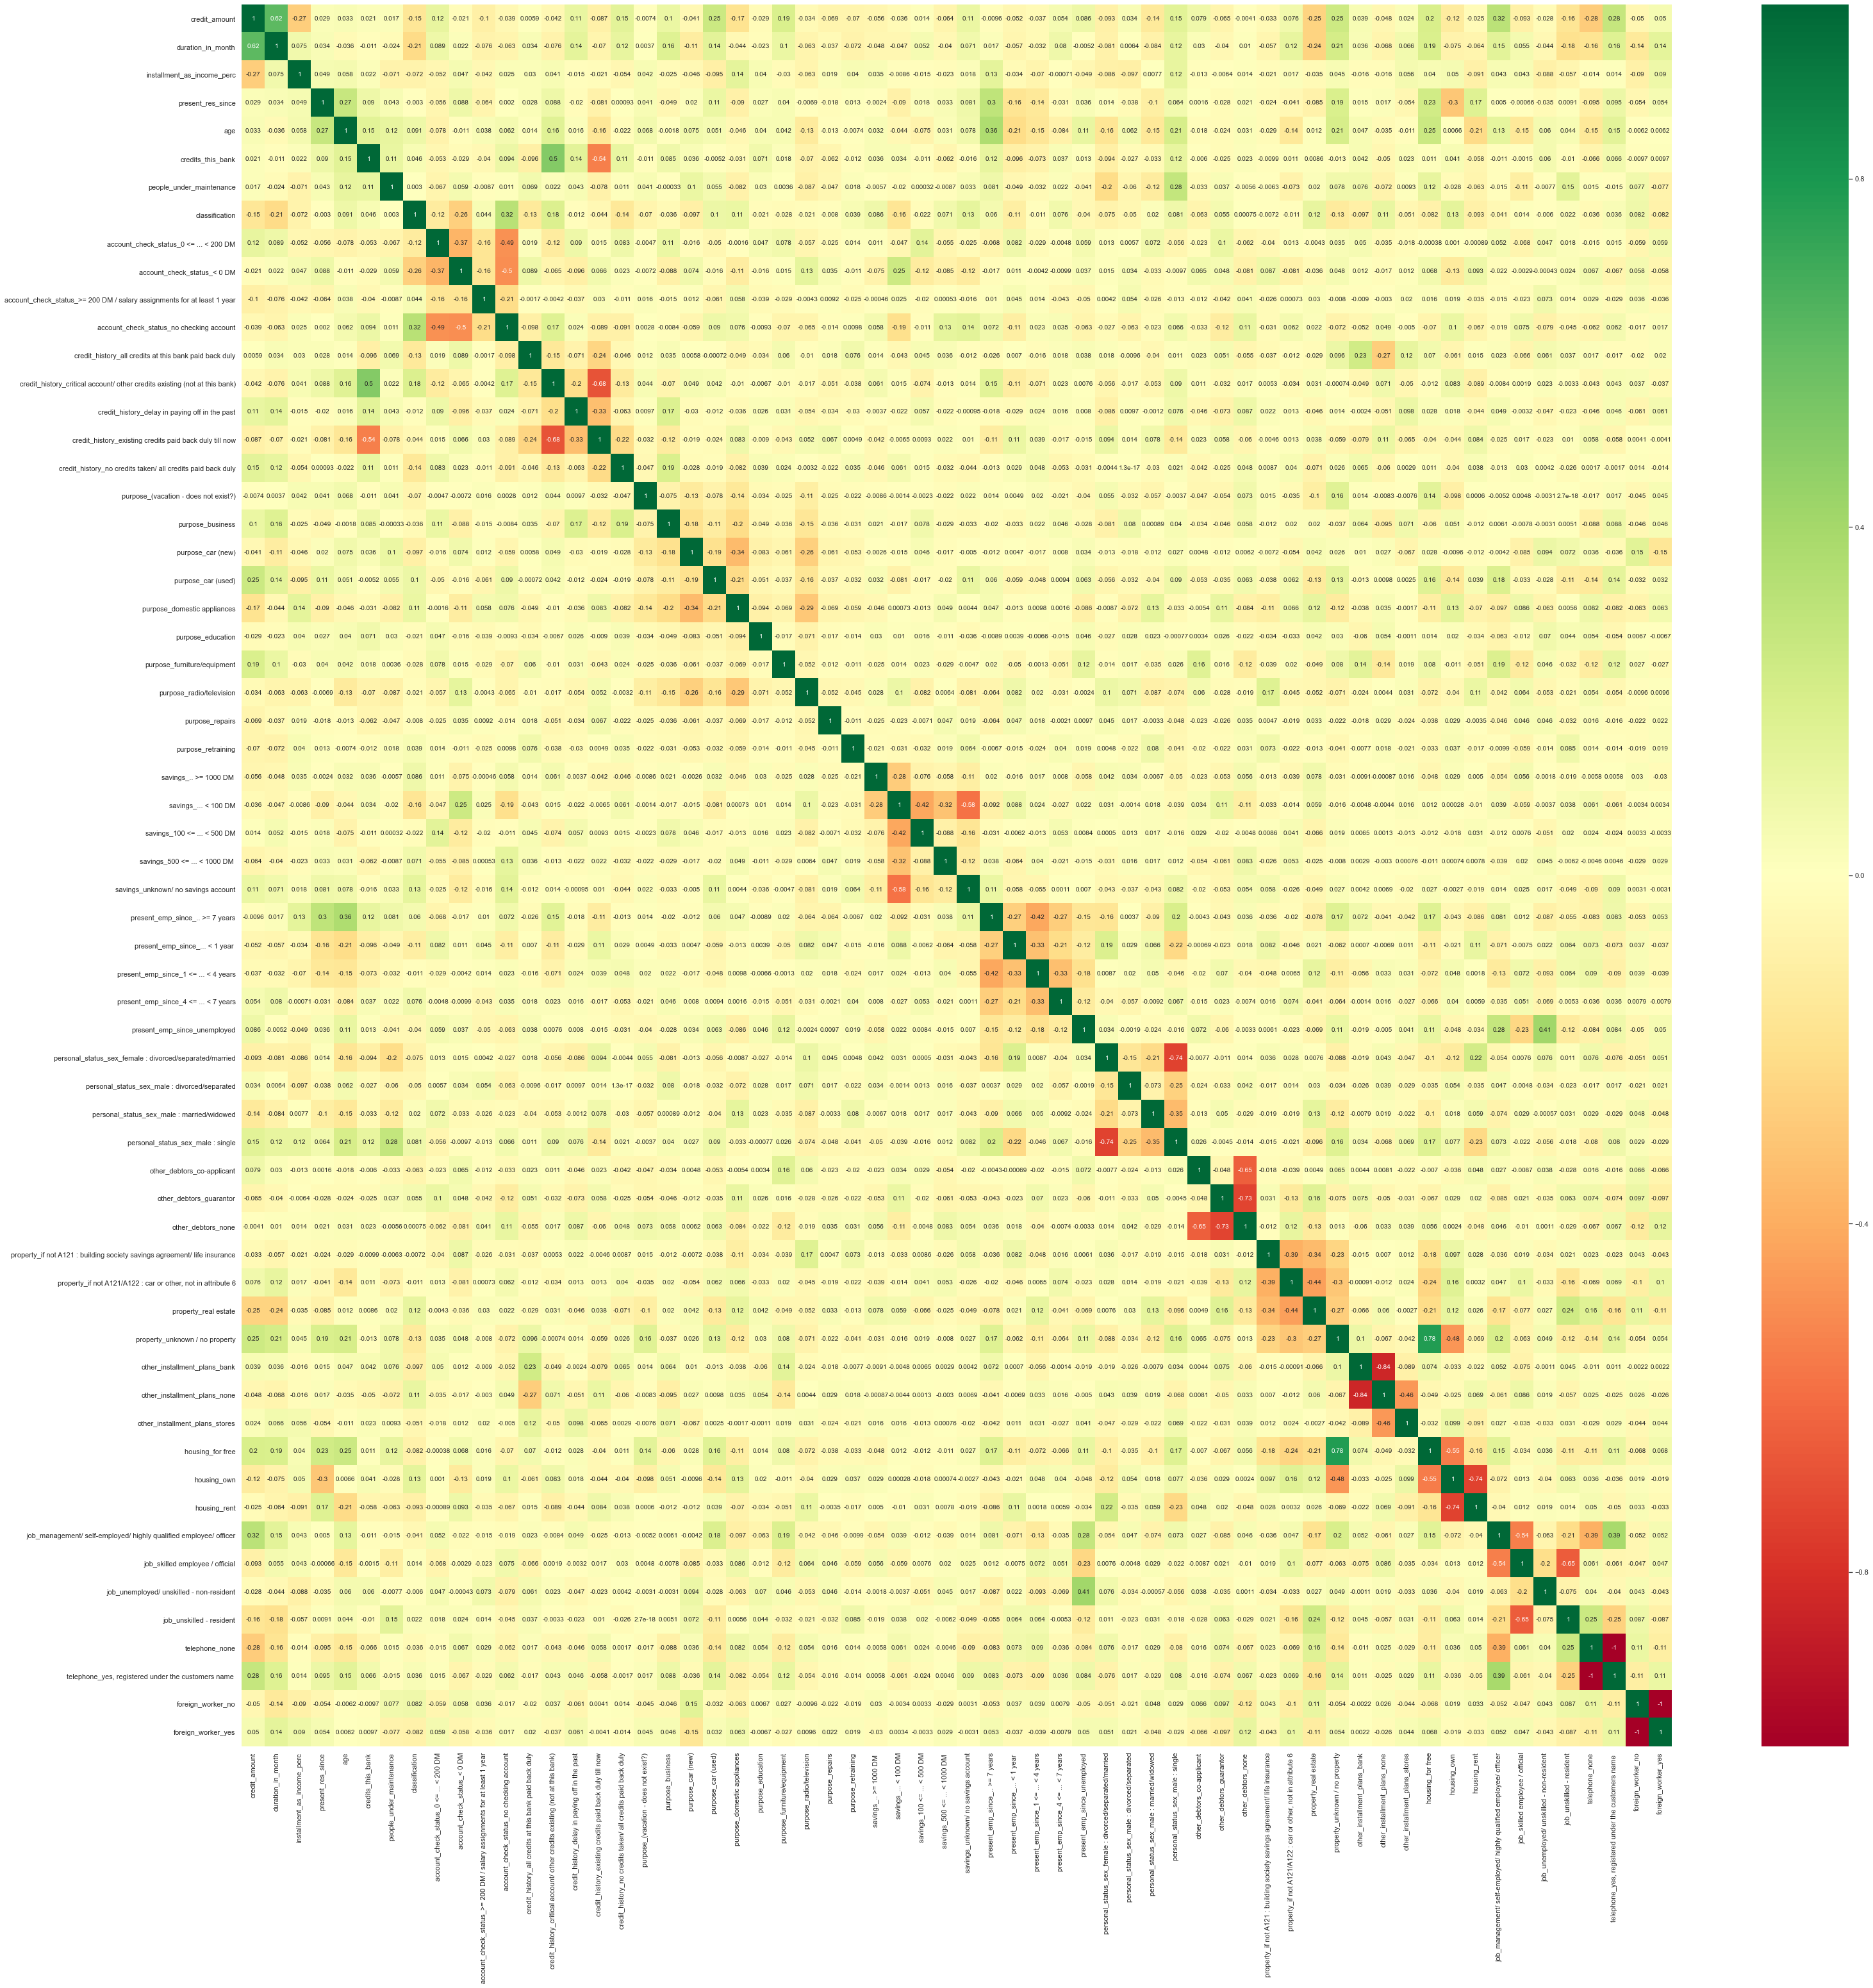

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
#get correlations of each features in dataset
corrmat = data_clean.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(data_clean[top_corr_features].corr(),annot=True,cmap="RdYlGn")


### Data Analysis and Visualization

In [15]:
data_clean

credit_amount  duration_in_month  installment_as_income_perc  \
0             1169                  6                           4   
1             5951                 48                           2   
2             2096                 12                           2   
3             7882                 42                           2   
4             4870                 24                           3   
..             ...                ...                         ...   
995           1736                 12                           3   
996           3857                 30                           4   
997            804                 12                           4   
998           1845                 45                           4   
999           4576                 45                           3   

     present_res_since  age  credits_this_bank  people_under_maintenance  \
0                    4   67                  2                         1   
1                    2   22                  1                         1   
2                    3   49                  1                         2   
3                    4   45                  1                         2   
4                    4   53                  2                         2   
..                 ...  ...                ...                       ...   
995                  4   31                  1                         1   
996                  4   40                  1                         1   
997                  4   38                  1                         1   
998                  4   23                  1                         1   
999                  4   27                  1                         1   

     classification  account_check_status_0 <= ... < 200 DM  \
0                 1                                       0   
1                 0                                       1   
2                 1                                       0   
3                 1                                       0   
4                 0                                       0   
..              ...                                     ...   
995               1                                       0   
996               1                                       0   
997               1                                       0   
998               0                                       0   
999               1                                       1   

     account_check_status_< 0 DM  ...  housing_own  housing_rent  \
0                              1  ...            1             0   
1                              0  ...            1             0   
2                              0  ...            1             0   
3                              1  ...            0             0   
4                              1  ...            0             0   
..                           ...  ...          ...           ...   
995                            0  ...            1             0   
996                            1  ...            1             0   
997                            0  ...            1             0   
998                            1  ...            0             0   
999                            0  ...            1             0   

     job_management/ self-employed/ highly qualified employee/ officer  \
0                                                    0                   
1                                                    0                   
2                                                    0                   
3                                                    0                   
4                                                    0                   
..                                                 ...                   
995                                                  0                   
996                                                  1                   
997                    

### Exploring various factors - 

## Age Groups:
<a id="age_groups"></a>
In this section we will create categorical groups based on the age column. The following categorical variables will belong to the <b> "Age_Group"</b> column:
<ul>
<li> <b>Student: </b> Clients  age ranges from (18 - 25). </li>
<li> <b>Young Adults: </b> Clients age ranges from (26-40) </li>
<li> <b> Senior: </b>  Clients age ranges from (41-55) </li>
<li> <b>Elder: </b> Clients age is more than 55 years old </li>
</ul>

## What we want to accomplish:
<ul>
<li> Create different age groups based on their age. </li>
<li> See the Credit amounts borrowed by clients belonging to each age group.</li>
<li> Get deeper in our analysis and determine which loans were high risk and see if there is any patterns with regards to age groups.  </li>
</ul>

## Summary:
<ul>
<li> The <b>younger age group</b> tended to ask slightly for higher loans compared to the older age groups. </li>
<li> The student and elederly groups had the <b>highest ratio</b> of high risk loans. With <b>45.29%</b> of all the clients that belong to the student age group being considered of high risk. </li>
<li> The number of loans that were considered of high risk within the elderly group is<b> 44.28%</b> of the total amount of people considered in the elderly group. </li>
<li> Interesting enough these are the groups that are most likely to be<b> unemployed or working part-time</b>, since the youngest group either <b>don't have the experience</b> to have a job or they are <b>studying in a university</b> so they don't have enough time to work in a full-time job. </li>
<li>In the elderly group side, this is the group that are most likely receiving their money from their <b>pensions</b>, meaning the elderly group is most likely unemployed or working part-time. </li>
</ul>

In [16]:
import matplotlib.pyplot as plt
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly

In [17]:
df_good = data_clean.loc[data_clean["classification"] == 1]['age'].values.tolist()
df_bad = data_clean.loc[data_clean["classification"] == 0]['age'].values.tolist()
df_age = data_clean['age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

C:\Users\User\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<b> Observations - Concentrated around age group: 20-40 </b>

In [18]:
interval = (18, 29, 40, 55, 120)

cats = ['Student', 'Young Adults', 'Senior', 'Elderly']
data["Age_cat"] = pd.cut(data.age, interval, labels=cats)

df_good = data[data["classification"] == 1]
df_bad = data[data["classification"] == 0]

In [19]:
trace0 = go.Box(
    y=df_good["credit_amount"],
    x=df_good["Age_cat"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['credit_amount'],
    x=df_bad['Age_cat'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
info = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (US Dollar)',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=info, layout=layout)

py.iplot(fig, filename='box-age-cat')

<b> Boxplot to observe credit amounts taken by different age groups and see if it qualified as a good credit or a bad credit. </b>
    
    Good credit - Loan approved
    Bad  Credit - Loan rejected

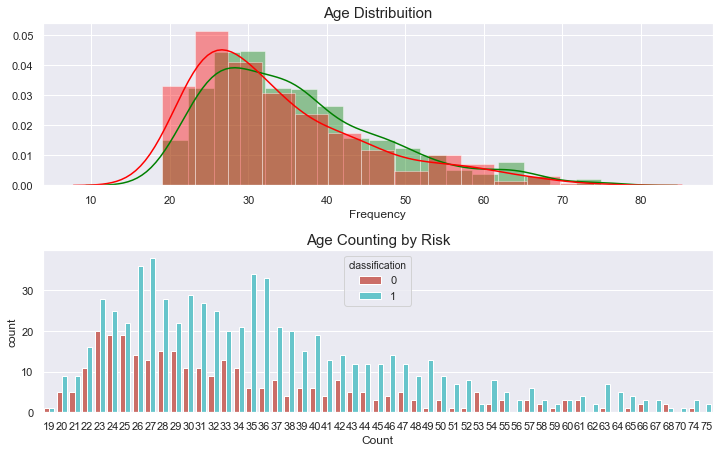

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["age"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["age"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="age",data=data_clean, 
              palette="hls", ax=ax[1], 
              hue = "classification")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()

In [21]:
data['Age_Group'] = np.nan

lst = [data]

for col in lst:
    col.loc[(col['age'] > 18) & (col['age'] <= 29), 'Age_Group'] = 'Students'
    col.loc[(col['age'] > 29) & (col['age'] <= 40), 'Age_Group'] = 'Young Adults'
    col.loc[(col['age'] > 40) & (col['age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['age'] > 55, 'Age_Group'] = 'Elder' 
    
data.head()

classification account_check_status  duration_in_month  \
0               1               < 0 DM                  6   
1               0    0 <= ... < 200 DM                 48   
2               1  no checking account                 12   
3               1               < 0 DM                 42   
4               0               < 0 DM                 24   

                                      credit_history  \
0  critical account/ other credits existing (not ...   
1           existing credits paid back duly till now   
2  critical account/ other credits existing (not ...   
3           existing credits paid back duly till now   
4                    delay in paying off in the past   

                        purpose  credit_amount                      savings  \
0           domestic appliances           1169  unknown/ no savings account   
1           domestic appliances           5951                 ... < 100 DM   
2  (vacation - does not exist?)           2096                 ... < 100 DM   
3              radio/television           7882                 ... < 100 DM   
4                     car (new)           4870                 ... < 100 DM   

    present_emp_since  installment_as_income_perc  \
0       .. >= 7 years                           4   
1  1 <= ... < 4 years                           2   
2  4 <= ... < 7 years                           2   
3  4 <= ... < 7 years                           2   
4  1 <= ... < 4 years                           3   

                   personal_status_sex  ... age  other_installment_plans  \
0                        male : single  ...  67                     none   
1  female : divorced/separated/married  ...  22                     none   
2                        male : single  ...  49                     none   
3                        male : single  ...  45                     none   
4                        male : single  ...  53                     none   

    housing  credits_this_bank                          job  \
0       own                  2  skilled employee / official   
1       own                  1  skilled employee / official   
2       own                  1         unskilled - resident   
3  for free                  1  skilled employee / official   
4  for free                  2  skilled employee / official   

  people_under_maintenance                                  telephone  \
0                        1  yes, registered under the customers name    
1                        1                                       none   
2                        2                                       none   
3                        2                                       none   
4                        2                                       none   

  foreign_worker  Age_cat Age_Group  
0            yes  Elderly     Elder  
1            yes  Student  Students  
2            yes   Senior    Senior  
3            yes   Senior    Senior  
4            yes   Senior    Senior  

[5 rows x 23 columns]

In [22]:
# Lets find loans by age group and by the level of risk and plot them in a bar chart.

# Age Group Segments
young_good = data['credit_amount'].loc[(data['Age_Group'] == 'Students') & (data['classification'] == 1)].sum()
young_bad = data['credit_amount'].loc[(data['Age_Group'] == 'Students') & (data['classification'] == 0)].sum()
young_adult_good = data['credit_amount'].loc[(data['Age_Group'] == 'Young Adults') & (data['classification'] == 1)].sum()
young_adult_bad = data['credit_amount'].loc[(data['Age_Group'] == 'Young Adults') & (data['classification'] == 0)].sum()
senior_good = data['credit_amount'].loc[(data['Age_Group'] == 'Senior') & (data['classification'] == 1)].sum()
senior_bad = data['credit_amount'].loc[(data['Age_Group'] == 'Senior') & (data['classification'] == 0)].sum()
elder_good = data['credit_amount'].loc[(data['Age_Group'] == 'Elder') & (data['classification'] == 1)].sum()
elder_bad = data['credit_amount'].loc[(data['Age_Group'] == 'Elder') & (data['classification'] == 0)].sum()

# Percents
young_good_p = young_good/(young_good + young_bad) * 100
young_bad_p = young_bad/(young_good + young_bad) * 100
young_adult_good_p = young_adult_good/(young_adult_good + young_adult_bad) * 100
young_adult_bad_p = young_adult_bad/(young_adult_good + young_adult_bad) * 100
senior_good_p = senior_good/(senior_good + senior_bad) * 100
senior_bad_p =  senior_bad/(senior_good + senior_bad) * 100
elder_good_p = elder_good/(elder_good + elder_bad) * 100
elder_bad_p = elder_bad/(elder_good + elder_bad) * 100

# Round Percents
young_good_p = str(round(young_good_p, 2))
young_bad_p = str(round(young_bad_p, 2))
young_adult_good_p = str(round(young_adult_good_p, 2))
young_adult_bad_p = str(round(young_adult_bad_p, 2))
senior_good_p = str(round(senior_good_p, 2))
senior_bad_p = str(round(senior_bad_p, 2))
elder_good_p = str(round(elder_good_p, 2))
elder_bad_p = str(round(elder_bad_p, 2))



x = ["Students", "Young Adults", "Senior", "Elder"]

good_loans = go.Bar(
    x=x,
    y=[young_good, young_adult_good, senior_good, elder_good],
    name="Good Loans",
    text=[young_good_p + '%', young_adult_good_p + '%', senior_good_p + '%', elder_good_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(111, 235, 146)',
        line=dict(
            color='rgb(60, 199, 100)',
            width=1.5),
        ),
    opacity=0.6
)

bad_loans =  go.Bar(
    x=x,
    y=[young_bad, young_adult_bad, senior_bad, elder_bad],
    name="Bad Loans",
    text=[young_bad_p + '%', young_adult_bad_p + '%', senior_bad_p + '%', elder_bad_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(247, 98, 98)',
        line=dict(
            color='rgb(225, 56, 56)',
            width=1.5),
        ),
    opacity=0.6
)

info = [good_loans, bad_loans]

layout = dict(
    title="Type of Loan by Age Group", 
    xaxis = dict(title="Age Group"),
    yaxis= dict(title="Credit Amount")
)

fig = dict(data=info, layout=layout)

py.iplot(fig, filename='grouped-bar-direct-labels')

<b> Observing different age groups and the credit amount borrowed by them. We can see that young adults have the highest loan approval rate followed by senior group. </b>

### Housing

In [23]:
#First plot
trace0 = go.Bar(
    x = data[data["classification"]== 1]["housing"].value_counts().index.values,
    y = data[data["classification"]== 1]["housing"].value_counts().values,
    name='Good credit'
)

#Second plot
trace1 = go.Bar(
    x = data[data["classification"] == 0]["housing"].value_counts().index.values,
    y = data[data["classification"] == 0]["housing"].value_counts().values,
    name="Bad Credit"
)

data2 = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data2, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

<b> It can be observed that if a person owns a house, there is a good chance he will get his loan approved as compared to other groups. </b>

In [24]:
data

classification account_check_status  duration_in_month  \
0                 1               < 0 DM                  6   
1                 0    0 <= ... < 200 DM                 48   
2                 1  no checking account                 12   
3                 1               < 0 DM                 42   
4                 0               < 0 DM                 24   
..              ...                  ...                ...   
995               1  no checking account                 12   
996               1               < 0 DM                 30   
997               1  no checking account                 12   
998               0               < 0 DM                 45   
999               1    0 <= ... < 200 DM                 45   

                                        credit_history  \
0    critical account/ other credits existing (not ...   
1             existing credits paid back duly till now   
2    critical account/ other credits existing (not ...   
3             existing credits paid back duly till now   
4                      delay in paying off in the past   
..                                                 ...   
995           existing credits paid back duly till now   
996           existing credits paid back duly till now   
997           existing credits paid back duly till now   
998           existing credits paid back duly till now   
999  critical account/ other credits existing (not ...   

                          purpose  credit_amount                      savings  \
0             domestic appliances           1169  unknown/ no savings account   
1             domestic appliances           5951                 ... < 100 DM   
2    (vacation - does not exist?)           2096                 ... < 100 DM   
3                radio/television           7882                 ... < 100 DM   
4                       car (new)           4870                 ... < 100 DM   
..                            ...            ...                          ...   
995              radio/television           1736                 ... < 100 DM   
996                    car (used)           3857                 ... < 100 DM   
997           domestic appliances            804                 ... < 100 DM   
998           domestic appliances           1845                 ... < 100 DM   
999                    car (used)           4576          100 <= ... < 500 DM   

      present_emp_since  installment_as_income_perc  \
0         .. >= 7 years                           4   
1    1 <= ... < 4 years                           2   
2    4 <= ... < 7 years                           2   
3    4 <= ... < 7 years                           2   
4    1 <= ... < 4 years                           3   
..                  ...                         ...   
995  4 <= ... < 7 years                           3   
996  1 <= ... < 4 years                           4   
997       .. >= 7 years                           4   
998  1 <= ... < 4 years                           4   
999          unemployed                           3   

                     personal_status_sex  ... age  other_installment_plans  \
0                          male : single  ...  67                     none   
1    female : divorced/separated/married  ...  22                     none   
2                          male : single  ...  49                     none   
3                          male : single  ...  45                     none   
4                          male : single  ...  53                     none   
..                                   ...  ...  ..                      ...   
995  female : divorced/separated/married  ...  31                     none   
996            male : divorced/separated  ...  40                     none   
997                        male : single  ...  38                     none   
998                        male : single  ...  23                     none   
999                        male : single  ...  27          

In [41]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['housing'],
            "y": df_good['credit_amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['housing'],
            "y": df_bad['credit_amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'violin/split', validate = False)

<b> Violin graph observing - housing status vs credit amount borrowed. We also see if their loan is accepted or rejected. </b> 

### Gender Analysis

In [42]:
#First plot
trace0 = go.Bar(
    x = data[data["classification"]== 1]["personal_status_sex"].value_counts().index.values,
    y = data[data["classification"]== 1]["personal_status_sex"].value_counts().values,
    name='Good credit'
)

#First plot 2
trace1 = go.Bar(
    x = data[data["classification"]== 0]["personal_status_sex"].value_counts().index.values,
    y = data[data["classification"]== 0]["personal_status_sex"].value_counts().values,
    name="Bad Credit"
)

#Second plot
trace2 = go.Box(
    x = data[data["classification"]== 1]["personal_status_sex"],
    y = data[data["classification"]== 1]["credit_amount"],
    name=trace0.name
)

#Second plot 2
trace3 = go.Box(
    x = data[data["classification"]== 0]["personal_status_sex"],
    y = data[data["classification"]== 0]["credit_amount"],
    name=trace1.name
)

data2 = [trace0, trace1, trace2,trace3]


fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Sex Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')

C:\Users\User\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [43]:
# We have 2x more German males applying for Credit Loans than Females.
data["personal_status_sex"].value_counts()

male : single                          548
female : divorced/separated/married    310
male : married/widowed                  92
male : divorced/separated               50
Name: personal_status_sex, dtype: int64

In [44]:
data["sex"] = data.personal_status_sex.str.split().str.get(0)

In [45]:
data["sex"]

0        male
1      female
2        male
3        male
4        male
        ...  
995    female
996      male
997      male
998      male
999      male
Name: sex, Length: 1000, dtype: object

In [46]:
from plotly import tools
import chart_studio.plotly as py
#from chart_studio.plotly import plot, iplot
from plotly.offline import iplot
import plotly.graph_objs as go

by_age = data['age'].values.tolist()
male_age = data['age'].loc[data['sex'] == 'male'].values.tolist()
female_age = data['age'].loc[data['sex'] == 'female'].values.tolist()

trace0 = go.Histogram(
    x=male_age,
    histnorm='probability',
    name="German Male",
    marker = dict(
        color = 'rgba(100, 149, 237, 0.6)',
    )
)
trace1 = go.Histogram(
    x=female_age,
    histnorm='probability',
    name="German Female",
    marker = dict(
        color = 'rgba(255, 182, 193, 0.6)',
    )
)
trace2 = go.Histogram(
    x=by_age,
    histnorm='probability',
    name="Overall Gender",
     marker = dict(
        color = 'rgba(169, 169, 169, 0.6)',
    )
)
fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Males','Female', 'All Genders'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Distribution of Gender', bargap=0.05)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

<b> Observing gender distribution in the graph above </b>

In [47]:
# Gender vs Purpose let's see the purpose of having credit loans for each gender.
data["purpose"].unique()
sex_purpose = pd.crosstab(data['purpose'], data['sex']).apply(lambda x: x/x.sum() * 100)
sex_purpose

sex                              female       male
purpose                                           
(vacation - does not exist?)   6.774194   4.202899
business                       6.129032  11.304348
car (new)                     22.580645  23.768116
car (used)                     7.741935  11.449275
domestic appliances           27.419355  28.260870
education                      1.612903   2.463768
furniture/equipment            0.967742   1.304348
radio/television              23.870968  15.507246
repairs                        1.935484   0.869565
retraining                     0.967742   0.869565

In [33]:
# Values into list
m_purpose = sex_purpose['male'].values.tolist()
f_purpose = sex_purpose['female'].values.tolist()

# Round values
male_purpose = ['%.2f' % elem for elem in m_purpose]
female_purpose = ['%.2f' % elem for elem in f_purpose]

male = go.Bar(
    y=['(vacation - does not exist?)','business', 'car (new)', 'car (used)','domestic appliances', 'education', 'furniture/equipment',
      'radio/television', 'repairs', 'retraining'],
    x=male_purpose,
    name='German Males',
    text='(%)',
    orientation = 'h',
    marker = dict(
        color = 'rgba(72, 92, 238, 0.6)',
        line = dict(
            color = 'rgba(72, 92, 238, 1.0)',
            width = 3)
    )
)
female = go.Bar(
    y=['(vacation - does not exist?)','business', 'car (new)', 'car (used)','domestic appliances', 'education', 'furniture/equipment',
      'radio/television', 'repairs', 'retraining'],
    x=female_purpose,
    name='German Females',
    text='(%)',
    orientation = 'h',
    marker = dict(
        color = 'rgba(217, 128, 234, 0.6)',
        line = dict(
            color = 'rgba(217, 128, 234, 1.0)',
            width = 3)
    )
)

info = [male, female]
layout = dict(
    title='Application Reasons for a Loan by Gender',
     xaxis=dict(
        title='(% of Gender)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=11,
            color='black'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Purpose for the Loan',
        titlefont=dict(
            family='Arial, sans-serif',
            size=11,
            color='black'
        ),
        showticklabels=True,
        tickangle=40,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=10,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    barmode='stack'
)

fig = dict(data=info, layout=layout)
iplot(fig, filename='marker-h-bar')

In [48]:
# Percent distribution of Gender (how many jobs does each gender have in %)
number_of_jobs = pd.crosstab(data["job"], data["sex"]).apply(lambda x: x/x.sum() * 100)
number_of_jobs

sex                                                    female       male
job                                                                     
management/ self-employed/ highly qualified emp...  11.935484  16.086957
skilled employee / official                         63.548387  62.753623
unemployed/ unskilled - non-resident                 3.870968   1.449275
unskilled - resident                                20.645161  19.710145

### Summary:
<ul>
<li>Theres <b>2x more males</b> than females in our dataset. </li>
<li>Most females that applied for a credit loan were<b> less than 30</b> .</li>
<li>Most of the males that applied for a loan ranged from their <b>20s-40s</b></li>
<li>  Females were more likely to apply for a credit loan to buy <b>radio/television</b>. (10% more than males)</li>
<li> Males applied 2x more than females for a credit loan to invest in a <b>business</b>. </li>
<li> 2x of females were <b>unemployed non-resident</b> compared to males. </li>

</ul>


### Impact of job status on loan outcome

In [35]:
#First plot
trace0 = go.Bar(
    x = data[data["classification"]== 1]["job"].value_counts().index.values,
    y = data[data["classification"]== 1]["job"].value_counts().values,
    name='Good credit Distribuition'
)

#Second plot
trace1 = go.Bar(
    x = data[data["classification"]== 0]["job"].value_counts().index.values,
    y = data[data["classification"]== 0]["job"].value_counts().values,
    name="Bad Credit Distribuition"
)

data2 = [trace0, trace1]

layout = go.Layout(
    title='Job Distribuition'
)

fig = go.Figure(data=data2, layout=layout)

iplot(fig, filename='grouped-bar')

In [49]:
df_good

classification account_check_status  duration_in_month  \
0                 1               < 0 DM                  6   
2                 1  no checking account                 12   
3                 1               < 0 DM                 42   
5                 1  no checking account                 36   
6                 1  no checking account                 24   
..              ...                  ...                ...   
994               1  no checking account                 12   
995               1  no checking account                 12   
996               1               < 0 DM                 30   
997               1  no checking account                 12   
999               1    0 <= ... < 200 DM                 45   

                                        credit_history  \
0    critical account/ other credits existing (not ...   
2    critical account/ other credits existing (not ...   
3             existing credits paid back duly till now   
5             existing credits paid back duly till now   
6             existing credits paid back duly till now   
..                                                 ...   
994           existing credits paid back duly till now   
995           existing credits paid back duly till now   
996           existing credits paid back duly till now   
997           existing credits paid back duly till now   
999  critical account/ other credits existing (not ...   

                          purpose  credit_amount                      savings  \
0             domestic appliances           1169  unknown/ no savings account   
2    (vacation - does not exist?)           2096                 ... < 100 DM   
3                radio/television           7882                 ... < 100 DM   
5    (vacation - does not exist?)           9055  unknown/ no savings account   
6                radio/television           2835        500 <= ... < 1000 DM    
..                            ...            ...                          ...   
994                     car (new)           2390  unknown/ no savings account   
995              radio/television           1736                 ... < 100 DM   
996                    car (used)           3857                 ... < 100 DM   
997           domestic appliances            804                 ... < 100 DM   
999                    car (used)           4576          100 <= ... < 500 DM   

      present_emp_since  installment_as_income_perc  \
0         .. >= 7 years                           4   
2    4 <= ... < 7 years                           2   
3    4 <= ... < 7 years                           2   
5    1 <= ... < 4 years                           2   
6         .. >= 7 years                           3   
..                  ...                         ...   
994       .. >= 7 years                           4   
995  4 <= ... < 7 years                           3   
996  1 <= ... < 4 years                           4   
997       .. >= 7 years                           4   
999          unemployed                           3   

                     personal_status_sex  ...  \
0                          male : single  ...   
2                          male : single  ...   
3                          male : single  ...   
5                          male : single  ...   
6                          male : single  ...   
..                                   ...  ...   
994                        male : single  ...   
995  female : divorced/separated/married  ...   
996            male : divorced/separated  ...   
997                        male : single  ...   
999                        male : single  ...   

                                              property  age  \
0                                          real estate   67   
2                                          real estate   49   
3    if not A121 : building society savings agreeme...   45   
5                                unknown / no property   35   
6    if not A

In [50]:
trace0 = go.Box(
    x=df_good["job"],
    y=df_good["credit_amount"],
    name='Good credit'
)

trace1 = go.Box(
    x=df_bad['job'],
    y=df_bad['credit_amount'],
    name='Bad credit'
)
    
info = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount distribuition by Job'
    ),
    boxmode='group'
)
fig = go.Figure(data=info, layout=layout)

iplot(fig, filename='box-age-cat')

In [51]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['job'],
            "y": df_good['age'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['job'],
            "y": df_bad['age'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


iplot(fig, filename = 'Age-Housing', validate = False)

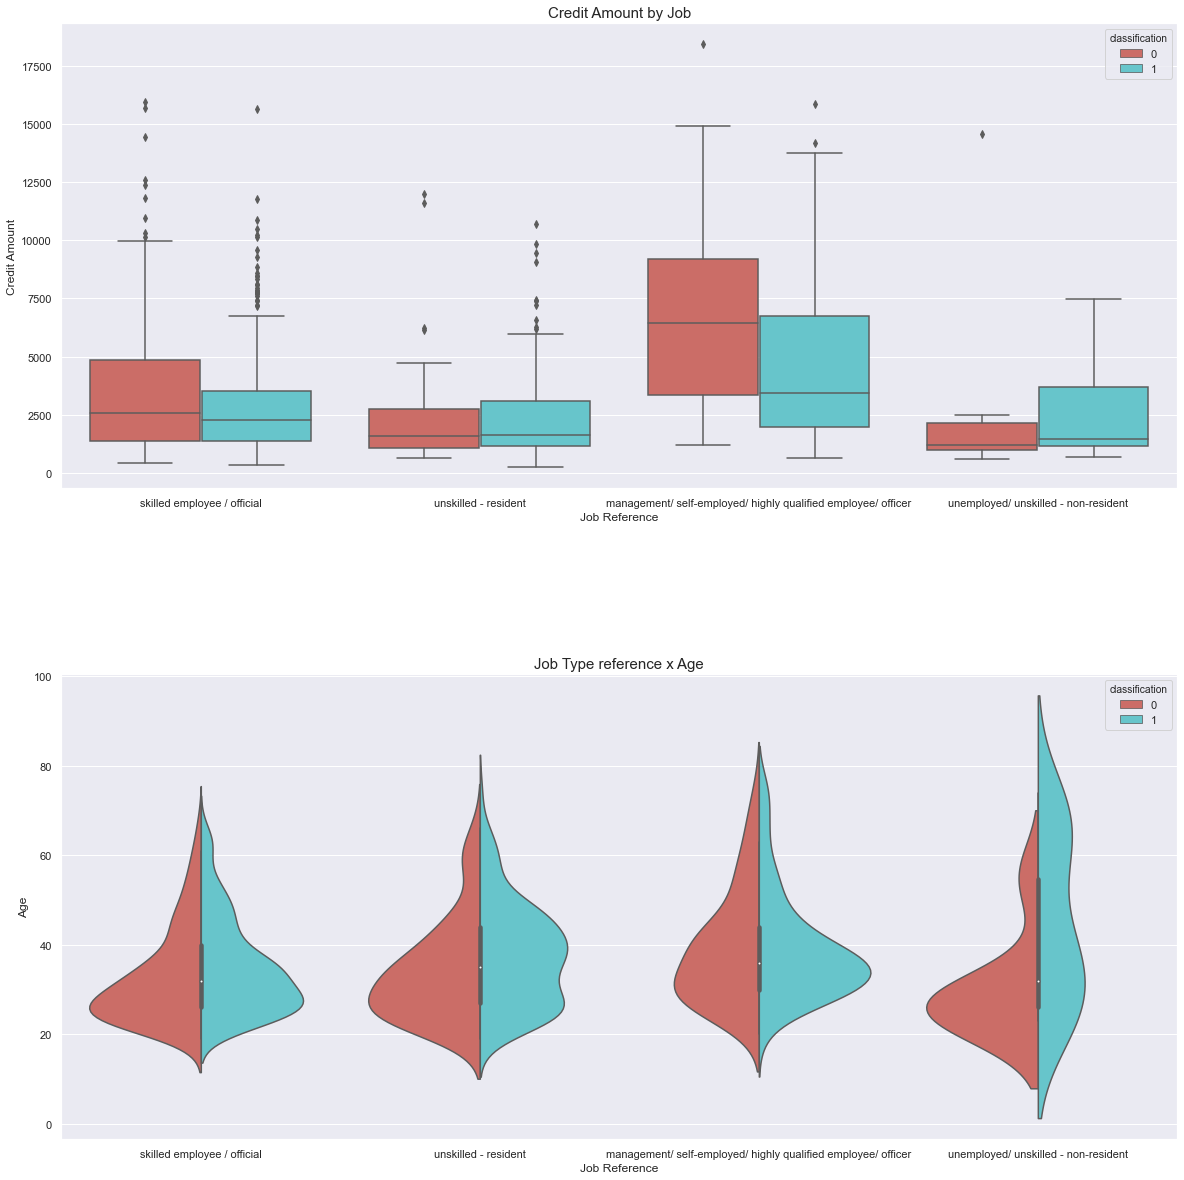

In [52]:
fig, ax = plt.subplots(figsize=(20,20), nrows=2)

g1 = sns.boxplot(x="job", y="credit_amount", data=data, 
            palette="hls", ax=ax[0], hue="classification")
g1.set_title("Credit Amount by Job", fontsize=15)
g1.set_xlabel("Job Reference", fontsize=12)
g1.set_ylabel("Credit Amount", fontsize=12)

g2 = sns.violinplot(x="job", y="age", data=data, ax=ax[1],  
               hue="classification", split=True, palette="hls")
g2.set_title("Job Type reference x Age", fontsize=15)
g2.set_xlabel("Job Reference", fontsize=12)
g2.set_ylabel("Age", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

### Credit Amount distribution

In [53]:
import plotly.figure_factory as ff

import numpy as np

# Add histogram data
x1 = np.log(df_good['credit_amount']) 
x2 = np.log(df_bad["credit_amount"])

# Group data together
hist_data = [x1, x2]

group_labels = ['Good Credit', 'Bad Credit']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
iplot(fig, filename='Distplot with Multiple Datasets')

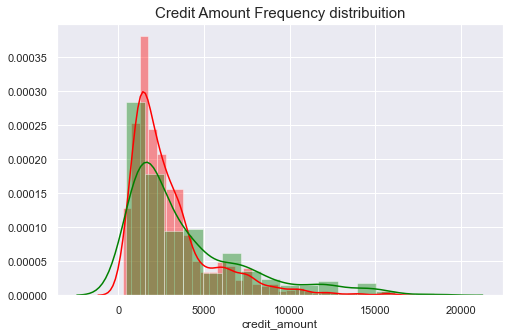

In [54]:
#Ploting the good and bad dataframes in distplot
plt.figure(figsize = (8,5))

g= sns.distplot(df_good['credit_amount'], color='r')
g = sns.distplot(df_bad["credit_amount"], color='g')
g.set_title("Credit Amount Frequency distribuition", fontsize=15)
plt.show()

### Savings account exploration 

In [43]:
from plotly import tools
import numpy as np
import plotly.graph_objs as go

count_good = go.Bar(
    x = df_good["savings"].value_counts().index.values,
    y = df_good["savings"].value_counts().values,
    name='Good credit'
)

count_bad = go.Bar(
    x = df_bad["savings"].value_counts().index.values,
    y = df_bad["savings"].value_counts().values,
    name='Bad credit'
)


box_1 = go.Box(
    x=df_good["savings"],
    y=df_good["credit_amount"],
    name='Good credit'
)

box_2 = go.Box(
    x=df_bad["savings"],
    y=df_bad["credit_amount"],
    name='Bad credit'
)

scat_1 = go.Box(
    x=df_good["savings"],
    y=df_good["age"],
    name='Good credit'
)
scat_2 = go.Box(
    x=df_bad["savings"],
    y=df_bad["age"],
    name='Bad credit'
)

info = [scat_1, scat_2, box_1, box_2, count_good, count_bad]

fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Count Saving Accounts','Credit Amount by Savings Acc', 
                                          'Age by Saving accounts'))

fig.append_trace(count_good, 1, 1)
fig.append_trace(count_bad, 1, 1)

fig.append_trace(box_2, 1, 2)
fig.append_trace(box_1, 1, 2)

fig.append_trace(scat_1, 2, 1)
fig.append_trace(scat_2, 2, 1)



fig['layout'].update(height=700, width=800, title='Saving Accounts Exploration', boxmode='group')

iplot(fig, filename='combined-savings')


C:\Users\User\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Description of Distribuition Saving accounts by Risk:  
classification                 0    1
savings                              
.. >= 1000 DM                  6   42
... < 100 DM                 217  386
100 <= ... < 500 DM           34   69
500 <= ... < 1000 DM          11   52
unknown/ no savings account   32  151


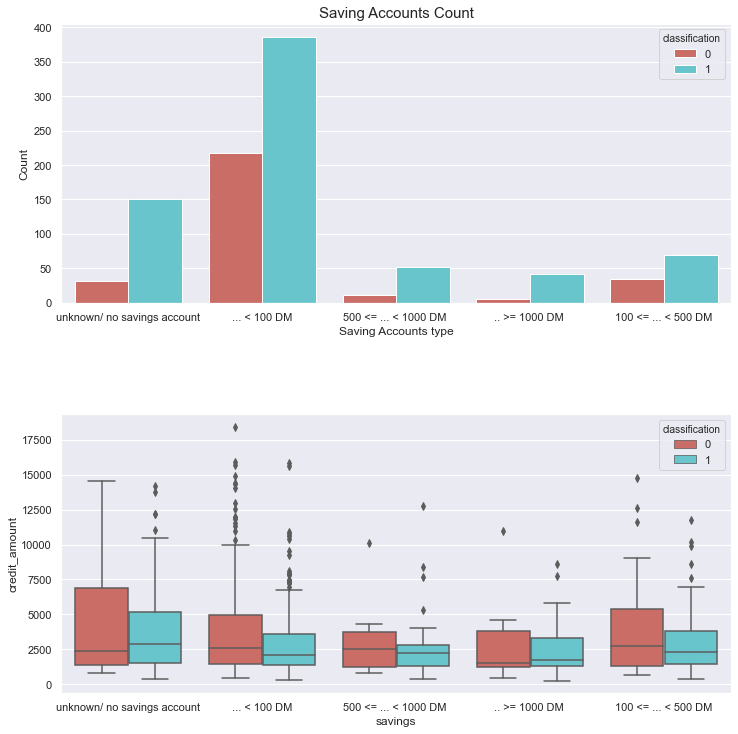

In [56]:
print("Description of Distribuition Saving accounts by Risk:  ")
print(pd.crosstab(data["savings"],data.classification))

fig, ax = plt.subplots(2,1, figsize=(12,12))
g = sns.countplot(x="savings", data=data, palette="hls", 
              ax=ax[0],hue="classification")
g.set_title("Saving Accounts Count", fontsize=15)
g.set_xlabel("Saving Accounts type", fontsize=12)
g.set_ylabel("Count", fontsize=12)

g = sns.boxplot(x="savings", y="credit_amount", data=data, ax=ax[1],
            hue = "classification",palette="hls")
g2.set_title("Saving Accounts by Credit Amount", fontsize=15)
g2.set_xlabel("Savings Accounts type", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

Values describe: 
classification                 0    1
purpose                              
(vacation - does not exist?)  22   28
business                      34   63
car (new)                     89  145
car (used)                    17   86
domestic appliances           62  218
education                      8   14
furniture/equipment            5    7
radio/television              58  123
repairs                        4    8
retraining                     1    8


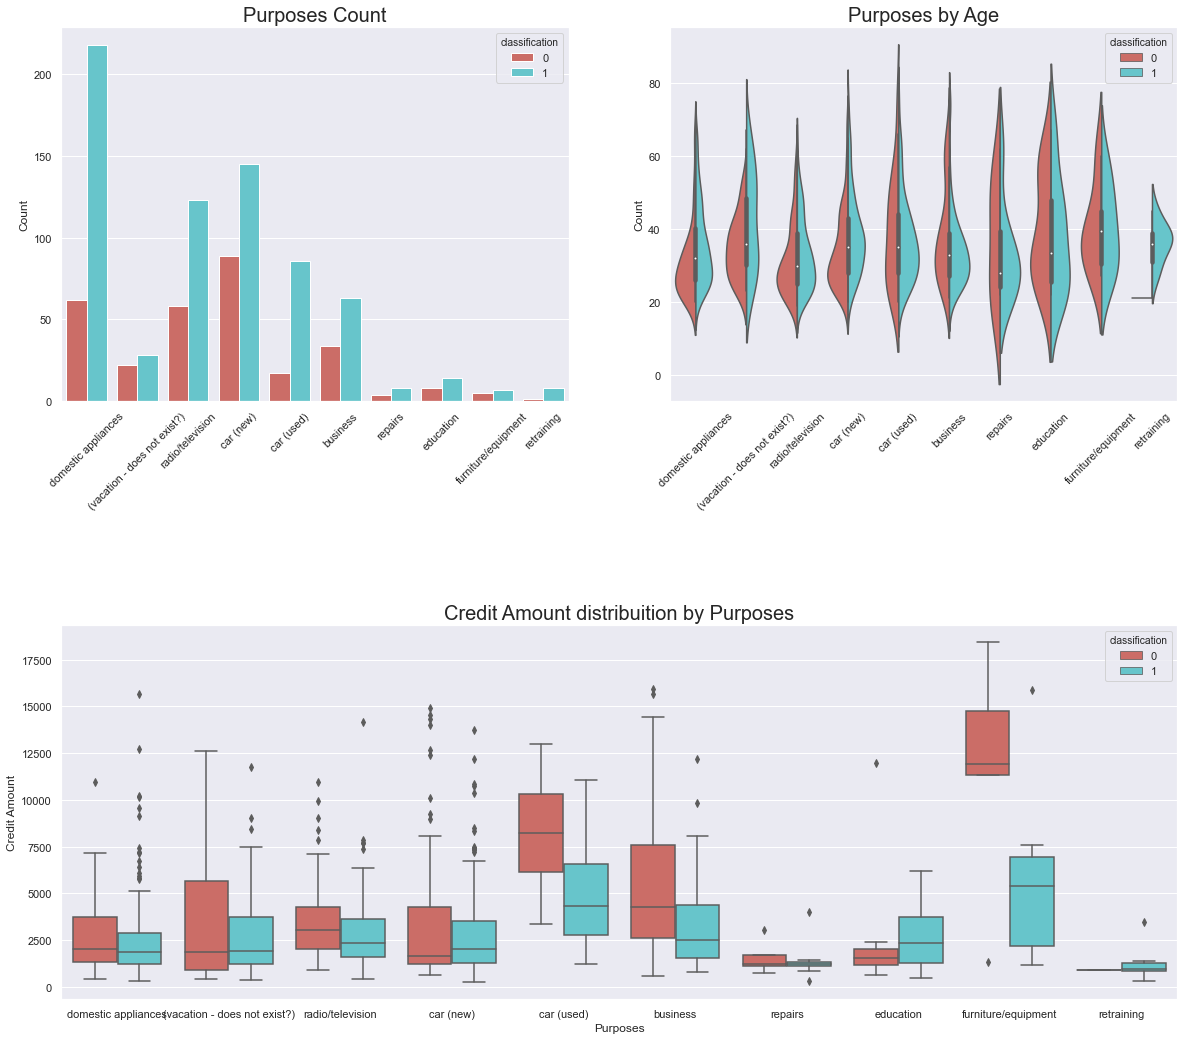

In [57]:
print("Values describe: ")
print(pd.crosstab(data.purpose, data.classification))

plt.figure(figsize = (20,20))

plt.subplot(221)
g = sns.countplot(x="purpose", data=data, 
              palette="hls", hue = "classification")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="purpose", y="age", data=data, 
                    palette="hls", hue = "classification",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="purpose", y="credit_amount", data=data, 
               palette="hls", hue = "classification")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

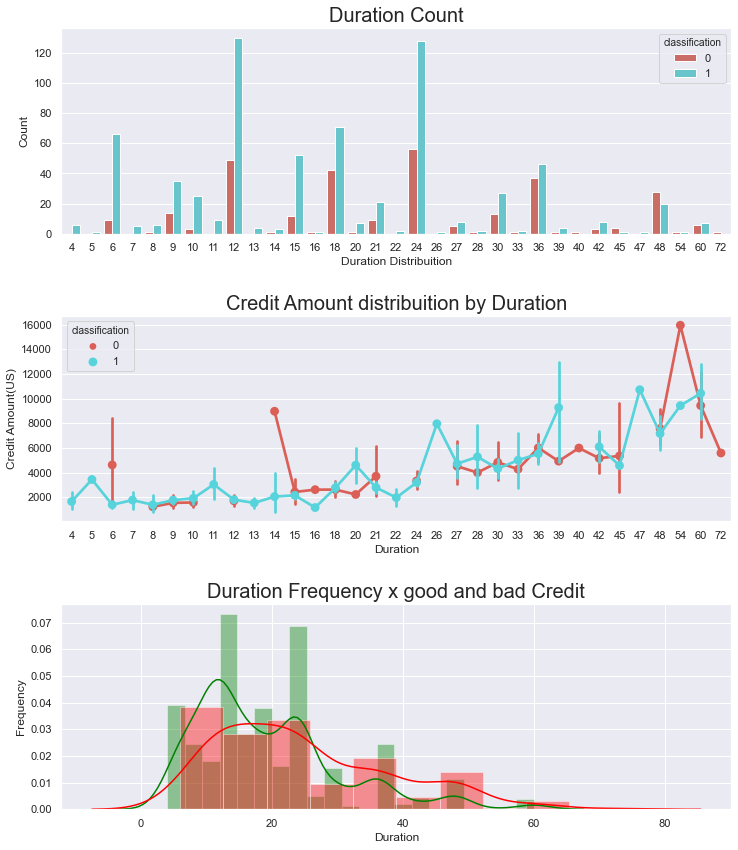

In [58]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="duration_in_month", data=data, 
              palette="hls",  hue = "classification")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="duration_in_month", y ="credit_amount",data=data,
                   hue="classification", palette="hls")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount(US)", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(df_good["duration_in_month"], color='g')
g2 = sns.distplot(df_bad["duration_in_month"], color='r')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x good and bad Credit", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

#### Interesting, we can see that the highest duration have the high amounts. The highest density is between [12 ~ 18 ~ 24] months

### Checking Account Variable 

In [59]:
#First plot
trace0 = go.Bar(
    x = data[data["classification"]== 1]["account_check_status"].value_counts().index.values,
    y = data[data["classification"]== 1]["account_check_status"].value_counts().values,
    name='Good credit Distribuition' 
    
)

#Second plot
trace1 = go.Bar(
    x = data[data["classification"]== 0]["account_check_status"].value_counts().index.values,
    y = data[data["classification"]== 0]["account_check_status"].value_counts().values,
    name="Bad Credit Distribuition"
)

info = [trace0, trace1]

layout = go.Layout(
    title='Checking accounts Distribuition',
    xaxis=dict(title='Checking accounts name'),
    yaxis=dict(title='Count'),
    barmode='group'
)


fig = go.Figure(data=info, layout=layout)

iplot(fig, filename = 'Age-ba', validate = False)

In [60]:
df_good = data[data["classification"] == 1]
df_bad = data[data["classification"] == 0]

trace0 = go.Box(
    y=df_good["credit_amount"],
    x=df_good["account_check_status"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['credit_amount'],
    x=df_bad['account_check_status'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
info = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Cheking distribuition'
    ),
    boxmode='group'
)
fig = go.Figure(data=info, layout=layout)

iplot(fig, filename='box-age-cat')

Total values of the most missing variable: 
account_check_status
0 <= ... < 200 DM                                     269
< 0 DM                                                274
>= 200 DM / salary assignments for at least 1 year     63
no checking account                                   394
Name: account_check_status, dtype: int64


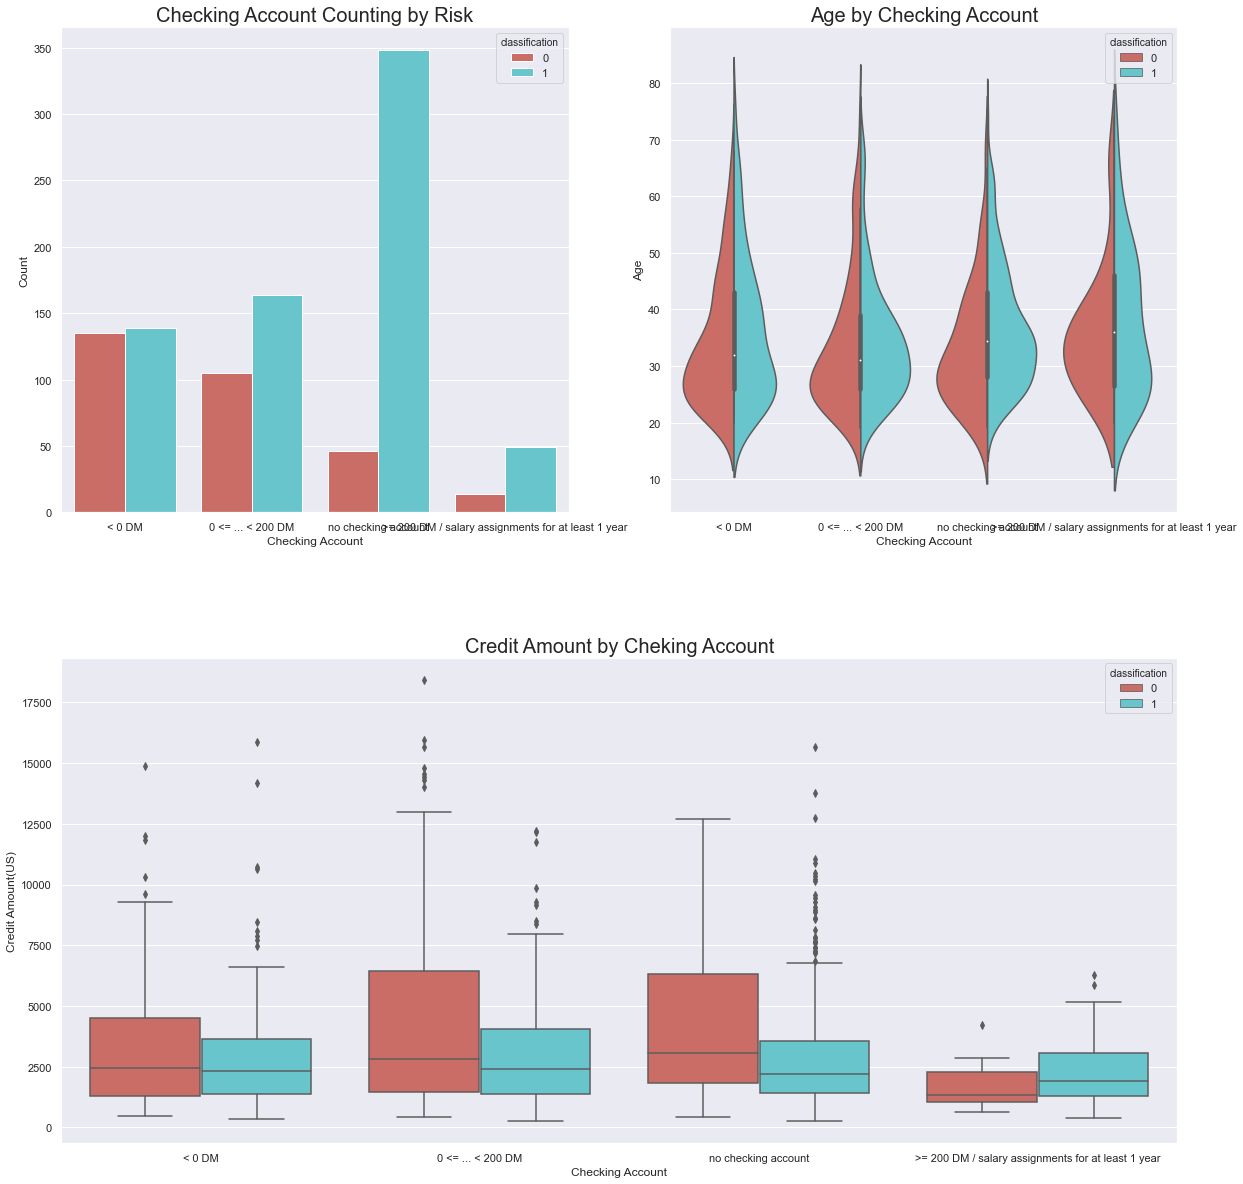

In [61]:
print("Total values of the most missing variable: ")
print(data.groupby("account_check_status")["account_check_status"].count())

plt.figure(figsize = (20,20))

g = plt.subplot(221)
g = sns.countplot(x="account_check_status", data=data, 
              palette="hls", hue="classification")
g.set_xlabel("Checking Account", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Checking Account Counting by Risk", fontsize=20)

g1 = plt.subplot(222)
g1 = sns.violinplot(x="account_check_status", y="age", data=data, palette="hls", hue = "classification",split=True)
g1.set_xlabel("Checking Account", fontsize=12)
g1.set_ylabel("Age", fontsize=12)
g1.set_title("Age by Checking Account", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="account_check_status",y="credit_amount", data=data,hue='classification',palette="hls")
g2.set_xlabel("Checking Account", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)
g2.set_title("Credit Amount by Cheking Account", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

plt.show()
plt.show()

## Wealth Analysis:
<a id="wealth_analysis"></a>
In this section we will analyse the amount of wealth our clients have by analyzing their checking accounts and whether the wealth status of our clients contribute to the risk of the loans Lending Club is issuing to customers.

## Summary: 
<ul>
<li> Individuals belonging to the <b>"little wealth"</b>  group, had a higher probability of being bad risk loans than other types fo groups.</li>
<li> The <b>higher the wealth</b>, the lower the probability of being a bad risk loan. </li>
</ul>

In [62]:
# We have some missing value so we will just ignore the missing values in this analysis.
data["account_check_status"].unique()
data.columns

Index(['classification', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker', 'Age_cat',
       'Age_Group', 'sex'],
      dtype='object')

In [63]:
cross_checking = pd.crosstab(data['classification'], data['account_check_status']).apply(lambda x: x/x.sum() * 100)
decimals = pd.Series([2,2,2])

cross_checking = cross_checking.round(decimals)
cross_checking

account_check_status  0 <= ... < 200 DM     < 0 DM  \
classification                                       
0                             39.033457  49.270073   
1                             60.966543  50.729927   

account_check_status  >= 200 DM / salary assignments for at least 1 year  \
classification                                                             
0                                                             22.222222    
1                                                             77.777778    

account_check_status  no checking account  
classification                             
0                               11.675127  
1                               88.324873

In [64]:
import chart_studio.plotly as py
import plotly.graph_objs as go


bad_little = cross_checking['< 0 DM'][0]
good_little = cross_checking['< 0 DM'][1]
bad_moderate = cross_checking['0 <= ... < 200 DM'][0]
good_moderate = cross_checking['0 <= ... < 200 DM'][1]
bad_rich = cross_checking['>= 200 DM / salary assignments for at least 1 year'][0]
good_rich = cross_checking['>= 200 DM / salary assignments for at least 1 year'][1]
good_no_checking = cross_checking['no checking account'][0]
bad_no_checking = cross_checking['no checking account'][1]

little = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_little, good_little],
    name="Little Wealth",
    text='%',
     marker=dict(
        color='#FF5050',
         line=dict(
            color='#E13232',
            width=1.5),
    ),
)

moderate = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_moderate, good_moderate],
    name="Moderate Wealth",
    text='%',
    xaxis='x2',
    yaxis='y2',
    marker=dict(
        color='#FFB232',
         line=dict(
            color='#CD8000',
            width=1.5),
    ),
)
rich = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_rich, good_rich],
    name="Rich Wealth",
    text="%",
    marker=dict(
        color='#8DFF83',
         line=dict(
            color='#3DAF33',
            width=1.5),
    ),
    xaxis='x3',
    yaxis='y3'
)

nochecking = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_no_checking, good_no_checking],
    name="No checking",
    text="%",
    marker=dict(
        color='#0000FF',
         line=dict(
            color='#0000FF',
            width=1.5),
    ),
    xaxis='x3',
    yaxis='y3'
)

info=[little, moderate, rich, nochecking]

fig = tools.make_subplots(rows=1, cols=4, subplot_titles=('Little Wealth', 'Moderate Wealth', 'Rich Wealth', 'No checking'))

fig.append_trace(little, 1, 1)
fig.append_trace(moderate, 1, 2)
fig.append_trace(rich, 1, 3)
fig.append_trace(nochecking, 1, 4)

fig['layout'].update(height=400, width=800, title='Levels of Risk' +
                                                  ' by Wealth')


iplot(fig, filename='make-subplots-multiple-with-titles')

C:\Users\User\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<b> It can be clearly observed that the people in the little wealth category have the highest chance of loan rejection while the people in the rich wealth category has the best chance for loan approval as expected. </b>

In [65]:
data2 = data

In [66]:
data2['purpose'].unique

<bound method Series.unique of 0               domestic appliances
1               domestic appliances
2      (vacation - does not exist?)
3                  radio/television
4                         car (new)
                   ...             
995                radio/television
996                      car (used)
997             domestic appliances
998             domestic appliances
999                      car (used)
Name: purpose, Length: 1000, dtype: object>

In [67]:
vacation_others = np.sum(data2['credit_amount'].loc[data2['purpose'] == '(vacation - does not exist?)'].values)
vacation_others

159020

### Impact of loan duration on loan outcome.

In [68]:
data2['purpose'].unique()

array(['domestic appliances', '(vacation - does not exist?)',
       'radio/television', 'car (new)', 'car (used)', 'business',
       'repairs', 'education', 'furniture/equipment', 'retraining'],
      dtype=object)

In [69]:
from chart_studio import plotly
import plotly.offline as pyoff
import plotly.graph_objs as go


radio_tv = np.sum(data2['credit_amount'].loc[data2['purpose'] == 'radio/television'].values)
education = np.sum(data2['credit_amount'].loc[data2['purpose'] == 'education'].values)
furniture = np.sum(data2['credit_amount'].loc[data2['purpose'] == 'furniture/equipment'].values)
carNew = np.sum(data2['credit_amount'].loc[data2['purpose'] == 'car (new)'].values)
carUsed = np.sum(data2['credit_amount'].loc[data2['purpose'] == 'car (used)'].values)
business = np.sum(data2['credit_amount'].loc[data2['purpose'] == 'business'].values)
domestic_app = np.sum(data2['credit_amount'].loc[data2['purpose'] == 'domestic appliances'].values)
repairs = np.sum(data2['credit_amount'].loc[data2['purpose'] == 'repairs'].values)
vacation_others = np.sum(data2['credit_amount'].loc[data2['purpose'] == '(vacation - does not exist?)'].values)
retraining = np.sum(data2['credit_amount'].loc[data2['purpose'] == 'retraining'].values)

df_purposes = pd.DataFrame(data=[[radio_tv, education, furniture, carNew, carUsed, business, domestic_app, repairs, vacation_others, retraining]],
                          columns=data2["purpose"].unique())

print(df_purposes)

   domestic appliances  (vacation - does not exist?)  radio/television  \
0               555125                         60018             98512   

   car (new)  car (used)  business  repairs  education  furniture/equipment  \
0     716748      553133    403330   696543      17976               159020   

   retraining  
0       10853  


In [70]:
data = [
    go.Scatterpolar(
        r = [radio_tv, education, furniture,carNew, carUsed, business, domestic_app, repairs, vacation_others, retraining],
        theta = data2['purpose'].unique().tolist(),
        line = dict(
            color = "#ff7f50"
        ),
        mode = 'lines+markers',
        fill='toself',
        marker = dict(
            color = '#8090c7',
            symbol='square',
            size=6
        )
    )
]

layout = go.Layout(
    showlegend = False,
    title= "Credit Distribution by Purpose",
    paper_bgcolor = "rgb(255, 245, 250)"
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = 'polar/basic')

### Loan Purpose

In [71]:
data2['purpose'].unique()

cross_purpose = pd.crosstab(data2['purpose'], data2['classification']).apply(lambda x: x/x.sum() * 100)
cross_purpose = cross_purpose.round(decimals=2)
cross_purpose.sort_values(by=[0])

classification                    0      1
purpose                                   
retraining                     0.33   1.14
repairs                        1.33   1.14
furniture/equipment            1.67   1.00
education                      2.67   2.00
car (used)                     5.67  12.29
(vacation - does not exist?)   7.33   4.00
business                      11.33   9.00
radio/television              19.33  17.57
domestic appliances           20.67  31.14
car (new)                     29.67  20.71

<b> In the table given above, 0 denotes loan rejection and 1 denotes loan approval. </b> 

## 3. Exploring Machine learning classifier models

### XGBoost Model 

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or framework.

In [72]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

data_clean.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in data_clean.columns.values]

In [73]:
# Unscaled, unnormalized data
X_clean = data_clean.drop(['classification'], axis=1)
y_clean = data_clean['classification']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean,y_clean,test_size=0.2, random_state=1)

In [74]:
import xgboost as xgb
from xgboost import XGBClassifier

def xgbclf(params, X_train, y_train,X_test, y_test):
  
    eval_set=[(X_train, y_train), (X_test, y_test)]
    
    model = XGBClassifier(**params).\
      fit(X_train, y_train, eval_set=eval_set, \
                  eval_metric='auc', early_stopping_rounds = 100, verbose=100)
    

    model.set_params(**{'n_estimators': model.best_ntree_limit})
    model.fit(X_train, y_train)
    
    
    # Predict target variables y for test data
    y_pred = model.predict(X_test, ntree_limit=model.best_ntree_limit) #model.best_iteration
    #print(y_pred)

    
    # Create and print confusion matrix    
    abclf_cm = confusion_matrix(y_test,y_pred)
    print(abclf_cm)
    
    print (classification_report(y_test,y_pred) )
    print ('\n')
    print ("Model Final Generalization Accuracy: %.6f" %accuracy_score(y_test,y_pred) )
    
    # Predict probabilities target variables y for test data
    y_pred_proba = model.predict_proba(X_test, ntree_limit=model.best_ntree_limit)[:,1] #model.best_iteration
    get_roc (y_test,y_pred_proba)
    return model

In [75]:
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper left")
    plt.show()
    return

[0]	validation_0-auc:0.85790	validation_1-auc:0.69498
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[99]	validation_0-auc:1.00000	validation_1-auc:0.73002
[[ 25  34]
 [ 16 125]]
              precision    recall  f1-score   support

           0       0.61      0.42      0.50        59
           1       0.79      0.89      0.83       141

    accuracy                           0.75       200
   macro avg       0.70      0.66      0.67       200
weighted avg       0.73      0.75      0.73       200



Model Final Generalization Accuracy: 0.750000


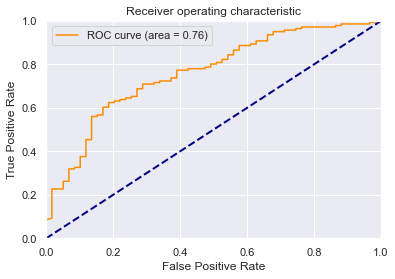

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=7, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
params={}
xgbclf(params, X_train_clean, y_train_clean, X_test_clean, y_test_clean)

In [77]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=51,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=None, colsample_bytree=1, gamma=0, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, monotone_constraints=None,
              n_estimators=51, n_jobs=1, nthread=None, num_parallel_tree=None,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1, tree_method=None,
              validate_parameters=None, verbosity=None)

[0]	validation_0-auc:0.79225	validation_1-auc:0.71998
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.89859	validation_1-auc:0.77906
Stopping. Best iteration:
[28]	validation_0-auc:0.88198	validation_1-auc:0.78772

[[ 22  37]
 [ 11 130]]
              precision    recall  f1-score   support

           0       0.67      0.37      0.48        59
           1       0.78      0.92      0.84       141

    accuracy                           0.76       200
   macro avg       0.72      0.65      0.66       200
weighted avg       0.75      0.76      0.74       200



Model Final Generalization Accuracy: 0.760000


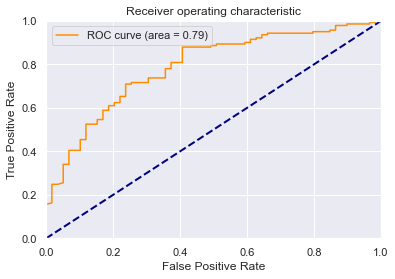

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.005, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=29, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.555,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
params={}

params1={
    'n_estimators':3000,
    'objective': 'binary:logistic',
    'learning_rate': 0.005,
    'gamma':0.1,
    'subsample':0.8,
    'colsample_bytree':0.3,
    'min_child_weight':3,
    'max_depth':3,
    #'seed':1024,
    'n_jobs' : -1
}

params2={
    'n_estimators':3000,
    'objective': 'binary:logistic',
    'learning_rate': 0.005,
    #'gamma':0.01,
    'subsample':0.555,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'max_depth':8,
    #'seed':1024,
    'n_jobs' : -1
}

xgbclf(params2, X_train_clean, y_train_clean, X_test_clean, y_test_clean)

In [79]:
eval_set=[(X_train_clean, y_train_clean), (X_test_clean, y_test_clean)]
model = XGBClassifier(**params2).\
      fit(X_train_clean, y_train_clean, eval_set=eval_set, \
                  eval_metric='auc', early_stopping_rounds = 100, verbose=100)
    
model.set_params(**{'n_estimators': model.best_ntree_limit})
model.fit(X_train_clean, y_train_clean)
xgBoost_pred = model.predict(X_test_clean, ntree_limit=model.best_ntree_limit) #model.best_iteration
xgBoost_pred_proba = model.predict_proba(X_test_clean, ntree_limit=model.best_ntree_limit)[:,1]

[0]	validation_0-auc:0.79225	validation_1-auc:0.71998
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.89859	validation_1-auc:0.77906
Stopping. Best iteration:
[28]	validation_0-auc:0.88198	validation_1-auc:0.78772



In [80]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.005,
       max_delta_step=0, max_depth=8, min_child_weight=3, missing=None,
       n_estimators=17, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.555)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=None, colsample_bytree=0.7, gamma=0, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.005, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=None, monotone_constraints=None,
              n_estimators=17, n_jobs=-1, nthread=None, num_parallel_tree=None,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=0.555, tree_method=None,
              validate_parameters=None, verbosity=None)

## Balanced Dataset 

In [81]:
from imblearn.over_sampling import SMOTE

# Oversampling
# http://contrib.scikit-learn.org/imbalanced-learn/auto_examples/combine/plot_smote_enn.html#sphx-glr-auto-examples-combine-plot-smote-enn-py

# Apply SMOTE
sm = SMOTE(sampling_strategy='auto')
X_train_clean_res, y_train_clean_res = sm.fit_sample(X_train_clean, y_train_clean)

# Print number of 'good' credits and 'bad credits, should be fairly balanced now
print("Before/After clean")
unique, counts = np.unique(y_train_clean, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_train_clean_res, return_counts=True)
print(dict(zip(unique, counts)))

Before/After clean
{0: 241, 1: 559}
{0: 559, 1: 559}


In [82]:
X_train_clean_res = pd.DataFrame(X_train_clean_res, columns=X_train_clean.keys())

[0]	validation_0-auc:0.92417	validation_1-auc:0.70165
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[99]	validation_0-auc:1.00000	validation_1-auc:0.71788
[[ 31  28]
 [ 28 113]]
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        59
           1       0.80      0.80      0.80       141

    accuracy                           0.72       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.72      0.72      0.72       200



Model Final Generalization Accuracy: 0.720000


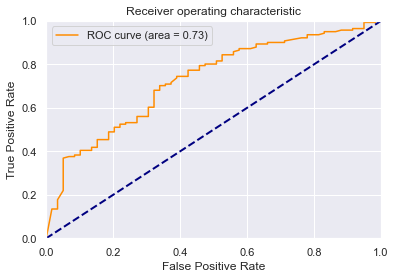

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=4, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
params={}
xgbclf(params,X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)

In [87]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=32,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=None, colsample_bytree=1, gamma=0, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, monotone_constraints=None,
              n_estimators=32, n_jobs=1, nthread=None, num_parallel_tree=None,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1, tree_method=None,
              validate_parameters=None, verbosity=None)

[0]	validation_0-auc:0.87860	validation_1-auc:0.70189
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.98514	validation_1-auc:0.76367
Stopping. Best iteration:
[24]	validation_0-auc:0.95587	validation_1-auc:0.76716

[[ 29  30]
 [ 22 119]]
              precision    recall  f1-score   support

           0       0.57      0.49      0.53        59
           1       0.80      0.84      0.82       141

    accuracy                           0.74       200
   macro avg       0.68      0.67      0.67       200
weighted avg       0.73      0.74      0.73       200



Model Final Generalization Accuracy: 0.740000


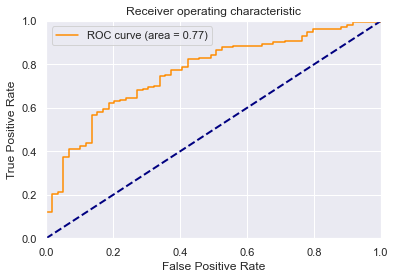

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=25, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.555,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
params = {}

params1={
    'n_estimators':3000,
    'objective': 'binary:logistic',
    'learning_rate': 0.005,
    'gamma':0.1,
    'subsample':0.8,
    'colsample_bytree':0.3,
    'min_child_weight':3,
    'max_depth':3,
    #'seed':1024,
    'n_jobs' : -1
}

params2={
    'n_estimators':3000,
    'objective': 'binary:logistic',
    'learning_rate': 0.05,
    #'gamma':0.01,
    'subsample':0.555,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'max_depth':8,
    #'seed':1024,
    'n_jobs' : -1
}

#xgbclf(params, X_train, y_train,X_test,y_test)
model = xgbclf(params2,X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)
model
#plot_featureImportance(model, X_train_clean_res.keys())

In [89]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.005,
       max_delta_step=0, max_depth=8, min_child_weight=3, missing=None,
       n_estimators=188, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.555)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=None, colsample_bytree=0.7, gamma=0, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.005, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=None, monotone_constraints=None,
              n_estimators=188, n_jobs=-1, nthread=None, num_parallel_tree=None,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=0.555, tree_method=None,
              validate_parameters=None, verbosity=None)

In [90]:
eval_set=[(X_train_clean_res, y_train_clean_res), (X_test_clean, y_test_clean)]
model_balanced = XGBClassifier(**params2).\
      fit(X_train_clean_res, y_train_clean_res, eval_set=eval_set, \
                  eval_metric='auc', early_stopping_rounds = 100, verbose=100)
    
model_balanced.set_params(**{'n_estimators': model.best_ntree_limit})
model_balanced.fit(X_train_clean_res, y_train_clean_res)
xgBoost_pred_balanced = model_balanced.predict(X_test_clean, ntree_limit=model.best_ntree_limit) #model.best_iteration
xgBoost_pred_proba_balanced = model_balanced.predict_proba(X_test_clean, ntree_limit=model.best_ntree_limit)[:,1]

[0]	validation_0-auc:0.87860	validation_1-auc:0.70189
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.98514	validation_1-auc:0.76367
Stopping. Best iteration:
[24]	validation_0-auc:0.95587	validation_1-auc:0.76716



<b> We observe that XGBoost performs the best with the original dataset as compared to the balanced dataset. 

###  Logisitic Regression

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).

Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

In [91]:
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test_clean, model, labels=[0, 1])
    classes=["Will Pay", "Will Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model,svm
import warnings
warnings.filterwarnings("ignore")

def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    #X=data_clean.iloc[:,:-1].values
    #y=data_clean.iloc[:,-1].values
    grid.fit(X_train_clean_res, y_train_clean_res)
    mean_scores = grid.cv_results_['mean_test_score']
    return mean_scores,grid.best_score_,grid.best_estimator_
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)

Best accuracy is 0.8078748391248392
LogisticRegression(C=1, random_state=0)


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# fit, train and cross validate Decision Tree with training and test data 
def logregclf(X_train, y_train,X_test, y_test):
    print("LogisticRegression")
    model = LogisticRegression().fit(X_train, y_train)
    print(model,'\n')

    # Predict target variables y for test data
    y_pred = model.predict_proba(X_test)[:,1]
    y_pred1 = model.predict(X_test)
    
    print ('Precision is',precision_score(y_test,y_pred1))
    print ('Recall is',recall_score(y_test,y_pred1))
    print ('F1-Score is',f1_score(y_test,y_pred1))
    print ('Accuracy Score is',accuracy_score(y_test,y_pred1))
   
    get_roc (y_test,y_pred)
    return

LogisticRegression
LogisticRegression() 

Precision is 0.7950310559006211
Recall is 0.9078014184397163
F1-Score is 0.847682119205298
Accuracy Score is 0.77


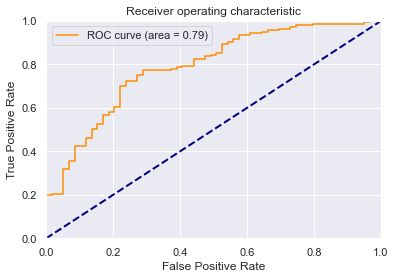

In [94]:
logregclf(X_train_clean, y_train_clean, X_test_clean, y_test_clean)

#### Balanced Dataset

LogisticRegression
LogisticRegression() 

Precision is 0.8092105263157895
Recall is 0.8723404255319149
F1-Score is 0.8395904436860069
Accuracy Score is 0.765


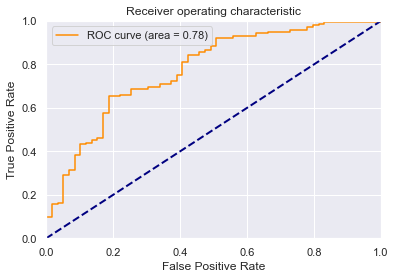

In [98]:
logregclf(X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)

In [99]:
model = LogisticRegression().fit(X_train_clean, y_train_clean)
lr_pred = model.predict(X_test_clean)  
lr_pred_auc = model.predict_proba(X_test_clean)[:,1]

#Balanced Dataset
balanced_model = LogisticRegression().fit(X_train_clean, y_train_clean)
lr_pred_balanced = balanced_model.predict(X_test_clean)   
lr_pred_auc_balanced = balanced_model.predict_proba(X_test_clean)[:,1]

We observe that, the results acheived after using a balanced dataset is very similar to the one acheived using the original dataset. 

### Random Forest 

Random forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

RandomForestClassifier
RandomForestClassifier() 

Accuracy: 0.78
Confusion Matrix: [ 24   9  35 132]
Classification report:
              precision    recall  f1-score   support

           0       0.41      0.73      0.52        33
           1       0.94      0.79      0.86       167

    accuracy                           0.78       200
   macro avg       0.67      0.76      0.69       200
weighted avg       0.85      0.78      0.80       200

cross val score: 0.7549999999999999


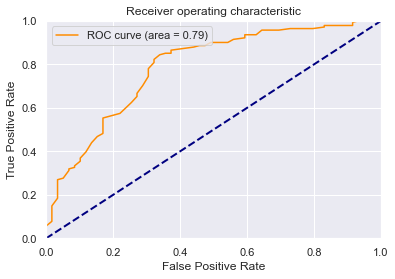

In [100]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import preprocessing,metrics 
# fit, train and cross validate Decision Tree with training and test data 
def randomforestclf(X_train, y_train,X_test, y_test):
    print("RandomForestClassifier")
    randomforest = RandomForestClassifier().fit(X_train, y_train)
    print(randomforest,'\n')
    
    # Predict target variables y for test data
    y_pred = randomforest.predict_proba(X_test)[:,1]
    y_pred1 = randomforest.predict(X_test)
    print('Accuracy:',accuracy_score(y_pred1,y_test) )
    
    #print('Accuracy:',accuracy_score(rfc_clf_pred,y_test_clean) )
    print('Confusion Matrix:', confusion_matrix(y_pred1,y_test).ravel()) #tn,fp,fn,tp
    print('Classification report:')
    print(classification_report(y_pred1,y_test))

# Let's make sure the data is not overfitting
    score_rfc = cross_val_score(randomforest,X_train,y_train,cv = 10).mean()
    print('cross val score:', score_rfc)
    
    # Get Cross Validation and Confusion matrix
    #get_eval(randomforest, X_train, y_train,y_test,y_pred)
    get_roc (y_test,y_pred)
    return

# Random Forest
# Choose clean data, as tree is robust
randomforestclf(X_train_clean, y_train_clean,X_test_clean, y_test_clean)

#### Balanced Dataset 

RandomForestClassifier
RandomForestClassifier() 

Accuracy: 0.785
Confusion Matrix: [ 30  14  29 127]
Classification report:
              precision    recall  f1-score   support

           0       0.51      0.68      0.58        44
           1       0.90      0.81      0.86       156

    accuracy                           0.79       200
   macro avg       0.70      0.75      0.72       200
weighted avg       0.81      0.79      0.80       200

cross val score: 0.8239784427284427


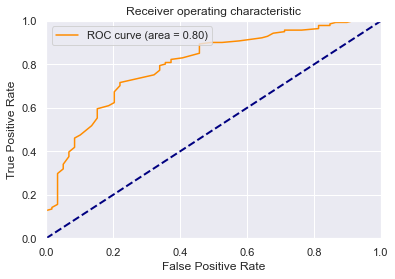

In [101]:
#Balanced Dataset

randomforestclf(X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)

In [102]:
randomforest = RandomForestClassifier().fit(X_train_clean, y_train_clean)
y_pred1 = randomforest.predict(X_test_clean)
y_pred_auc = randomforest.predict_proba(X_test_clean)[:,1]

#Balanced Dataset
randomforest_balanced = RandomForestClassifier().fit(X_train_clean_res, y_train_clean_res)
y_pred1_balanced = randomforest_balanced.predict(X_test_clean)
y_pred_balanced = randomforest_balanced.predict_proba(X_test_clean)[:,1]

We observe that the model performs slightly better when balanced dataset is used. 

### Neural network

Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated.

In [103]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.


0.705


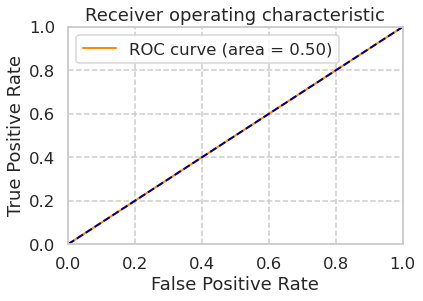

<Figure size 432x432 with 0 Axes>

In [104]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(hidden_layer_sizes=(13,10,2),max_iter=1000)
clf_NN.fit(X_train_clean,y_train_clean)     
predict_NN = clf_NN.predict(X_test_clean)
predictproba_NN = clf_NN.predict_proba(X_test_clean)[:,1]
NNAccuracy = accuracy_score(y_test_clean,predict_NN)
print(NNAccuracy)
get_roc (y_test_clean,predictproba_NN)
plt.show()
plt.figure(figsize=(6,6))
#plot_confusion_matrix(predict_NN, normalize=True)
plt.show()

#### Balanced Dataset

0.705


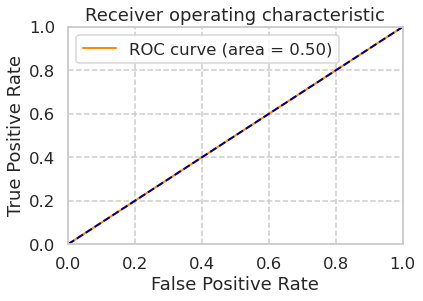

<Figure size 432x432 with 0 Axes>

In [105]:
# Balanced Dataset

from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(hidden_layer_sizes=(13,10,2),max_iter=1000)
clf_NN.fit(X_train_clean_res,y_train_clean_res)     
predict_NN_balanced = clf_NN.predict(X_test_clean)
predictproba_NN_balanced = clf_NN.predict_proba(X_test_clean)[:,1]
NNAccuracy = accuracy_score(y_test_clean,predict_NN_balanced)
print(NNAccuracy)
get_roc (y_test_clean,predictproba_NN_balanced)
plt.show()
plt.figure(figsize=(6,6))
#plot_confusion_matrix(predict_NN, normalize=True)
plt.show()

Similar results for both balanced and original dataset. 

### Comparison of ML models 

In [107]:
from sklearn.metrics import classification_report
print("RF",classification_report(y_test_clean, y_pred1, target_names=None))
print("XGBoost",classification_report(y_test_clean, xgBoost_pred, target_names=None))
print("LR",classification_report(y_test_clean, lr_pred, target_names=None))
#print("KNN",classification_report(y_test, knn_pred, target_names=None))
print("MLP",classification_report(y_test_clean, predict_NN, target_names=None))

RF               precision    recall  f1-score   support

           0       0.69      0.42      0.53        59
           1       0.79      0.92      0.85       141

    accuracy                           0.78       200
   macro avg       0.74      0.67      0.69       200
weighted avg       0.76      0.78      0.76       200

XGBoost               precision    recall  f1-score   support

           0       0.67      0.37      0.48        59
           1       0.78      0.92      0.84       141

    accuracy                           0.76       200
   macro avg       0.72      0.65      0.66       200
weighted avg       0.75      0.76      0.74       200

LR               precision    recall  f1-score   support

           0       0.67      0.44      0.53        59
           1       0.80      0.91      0.85       141

    accuracy                           0.77       200
   macro avg       0.73      0.67      0.69       200
weighted avg       0.76      0.77      0.75       200

MLP  

In [108]:
# Balanced Dataset

from sklearn.metrics import classification_report
print("RF",classification_report(y_test_clean, y_pred1_balanced, target_names=None))
print("XGBoost",classification_report(y_test_clean, xgBoost_pred_balanced, target_names=None))
print("LR",classification_report(y_test_clean, lr_pred_balanced, target_names=None))
print("MLP",classification_report(y_test_clean, predict_NN_balanced, target_names=None))

RF               precision    recall  f1-score   support

           0       0.68      0.46      0.55        59
           1       0.80      0.91      0.85       141

    accuracy                           0.78       200
   macro avg       0.74      0.68      0.70       200
weighted avg       0.76      0.78      0.76       200

XGBoost               precision    recall  f1-score   support

           0       0.57      0.49      0.53        59
           1       0.80      0.84      0.82       141

    accuracy                           0.74       200
   macro avg       0.68      0.67      0.67       200
weighted avg       0.73      0.74      0.73       200

LR               precision    recall  f1-score   support

           0       0.67      0.44      0.53        59
           1       0.80      0.91      0.85       141

    accuracy                           0.77       200
   macro avg       0.73      0.67      0.69       200
weighted avg       0.76      0.77      0.75       200

MLP  

Logistic regression accuracy is  0.765


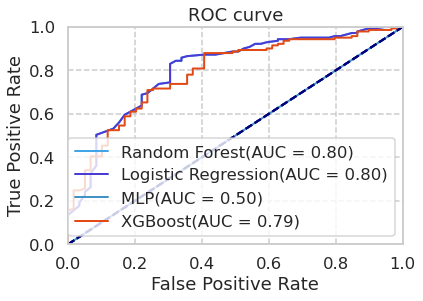

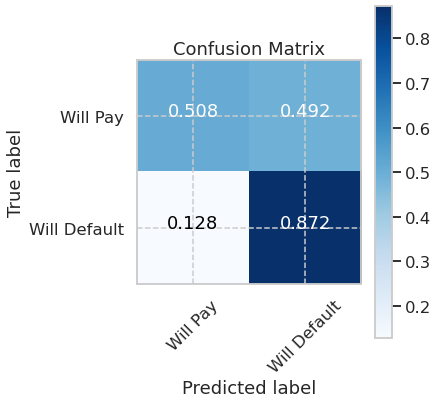

In [109]:
import itertools
from sklearn.metrics import confusion_matrix
clf_LR = linear_model.LogisticRegression(C=Best_classifier.C)
clf_LR.fit(X_train_clean_res,y_train_clean_res)
LR_Predict = clf_LR.predict_proba(X_test_clean)[:,1]
LR_Predict_bin = clf_LR.predict(X_test_clean)
LR_Accuracy = accuracy_score(y_test_clean,LR_Predict.round())
print("Logistic regression accuracy is ",LR_Accuracy)
plotAUC(y_test_clean,y_pred_auc, 'Random Forest')
plotAUC(y_test_clean,y_pred_auc,'Logistic Regression')
plotAUC(y_test_clean,predictproba_NN,'MLP')
plotAUC(y_test_clean,xgBoost_pred_proba,'XGBoost')

plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(LR_Predict_bin, normalize=True)
plt.show()

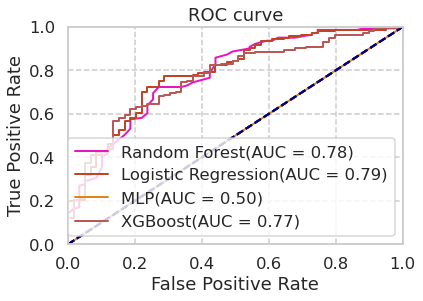

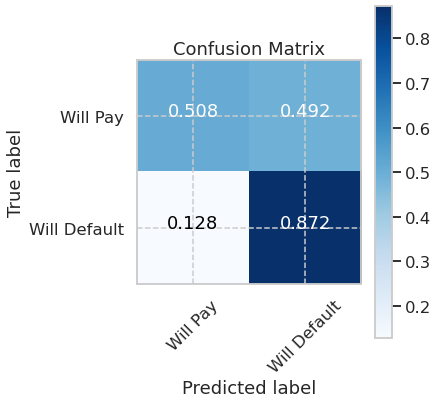

In [110]:
#Balanced Dataset

import itertools
from sklearn.metrics import confusion_matrix
clf_LR_balanced = linear_model.LogisticRegression(C=Best_classifier.C)
clf_LR_balanced.fit(X_train_clean_res,y_train_clean_res)
LR_Predict_balanced = clf_LR_balanced.predict_proba(X_test_clean)[:,1]
LR_Predict_bin_balanced = clf_LR_balanced.predict(X_test_clean)
LR_Accuracy_balanced = accuracy_score(y_test_clean,LR_Predict_balanced.round())
plotAUC(y_test_clean,y_pred_balanced, 'Random Forest')
plotAUC(y_test_clean,lr_pred_auc_balanced,'Logistic Regression')
plotAUC(y_test_clean,predictproba_NN_balanced,'MLP')
plotAUC(y_test_clean,xgBoost_pred_proba_balanced,'XGBoost')

plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(LR_Predict_bin, normalize=True)
plt.show()

It can be observed that these machine learning models usually perform better with the original dataset instead of the balanced dataset. At this stage, XGBoost, Random Forest and Logistic regression perform similarly having an ROC AUC curve of around 0.80.

## 5. Clustering 

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from scipy.stats import uniform
from scipy import interp


from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


#metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import silhouette_samples, silhouette_score
#from bayes_opt import BayesianOptimization


import warnings
warnings.filterwarnings("ignore")

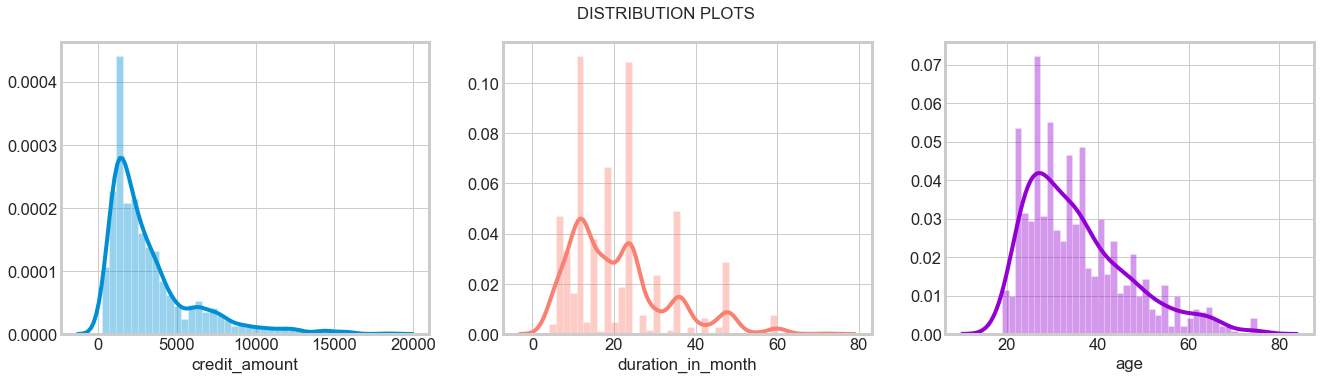

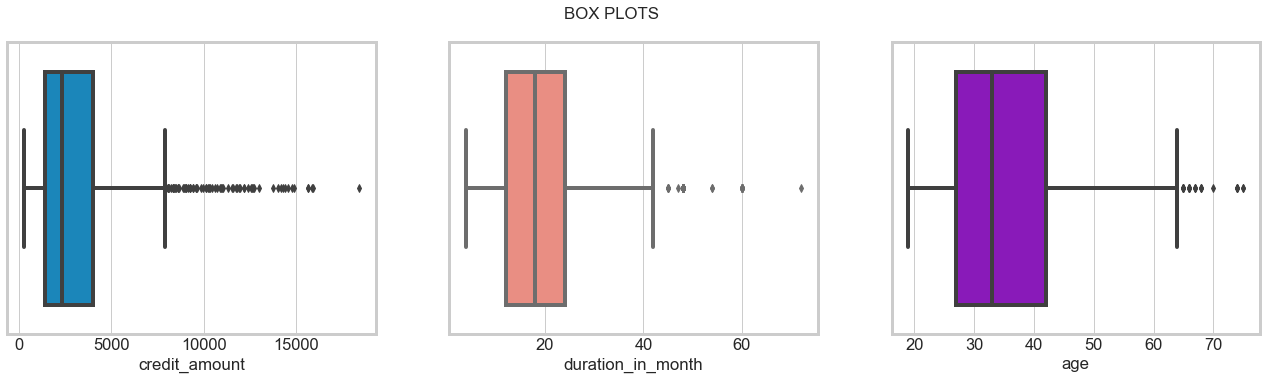

In [112]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('DISTRIBUTION PLOTS')
sns.distplot(data_clean['credit_amount'], bins=40, ax=ax[0]);
sns.distplot(data_clean['duration_in_month'], bins=40, ax=ax[1], color='salmon');
sns.distplot(data_clean['age'], bins=40, ax=ax[2], color='darkviolet');

fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('BOX PLOTS')
sns.boxplot(data_clean['credit_amount'], ax=ax[0]);
sns.boxplot(data_clean['duration_in_month'], ax=ax[1], color='salmon');
sns.boxplot(data_clean['age'], ax=ax[2], color='darkviolet');

### INSIGHTS:
    
    * Most of the credit cards have an amount of 1500 - 4000
    * The Credit amount is positively skewed, So the samples are dispersed

In [113]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                                                      Non-Null Count  Dtype
---  ------                                                                      --------------  -----
 0   credit_amount                                                               1000 non-null   int64
 1   duration_in_month                                                           1000 non-null   int64
 2   installment_as_income_perc                                                  1000 non-null   int64
 3   present_res_since                                                           1000 non-null   int64
 4   age                                                                         1000 non-null   int64
 5   credits_this_bank                                                           1000 non-null   int64
 6   people_under_maintenance                                         

In [114]:
#Selecting columns for clusterisation with k-means
selected_cols = ["age","credit_amount", "duration_in_month"]
cluster_data = data_clean.loc[:,selected_cols]
col = ["classification"]
classficationdata = data_clean.loc[:,col]

In [115]:
cluster_data

age  credit_amount  duration_in_month
0     67           1169                  6
1     22           5951                 48
2     49           2096                 12
3     45           7882                 42
4     53           4870                 24
..   ...            ...                ...
995   31           1736                 12
996   40           3857                 30
997   38            804                 12
998   23           1845                 45
999   27           4576                 45

[1000 rows x 3 columns]

In [116]:
# a function which plots three histograms - one for each variable.
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["age"], ax=ax1)
    sns.distplot(df["credit_amount"], ax=ax2)
    sns.distplot(df["duration_in_month"], ax=ax3)
    plt.tight_layout()

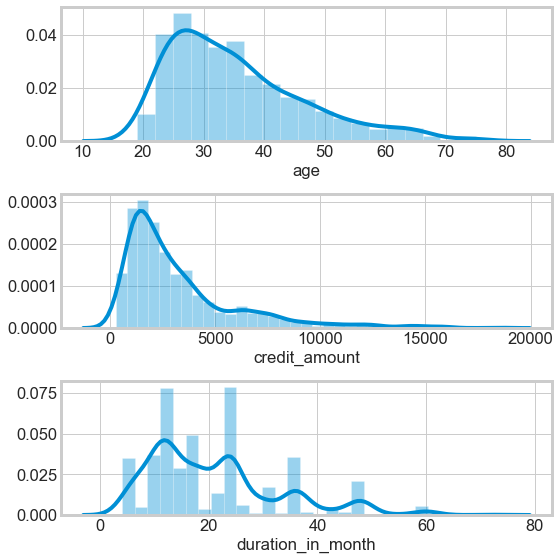

In [117]:
distributions(cluster_data)

We can see that distributions are right-skewed. To obtain better results we should remove the skewness by logarithmic transformation. After that let's see how they look like.

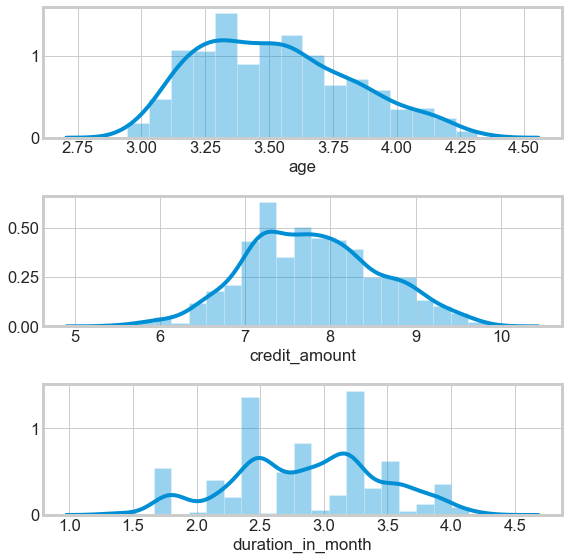

In [118]:
cluster_log = np.log(cluster_data)
distributions(cluster_log)

Indeed, the skewness has been eliminated.

The next step will be centering and scaling of variables – it is required by KMeans algorithm. We will use for that a StandardScaler from sklearn library.



In [119]:
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)

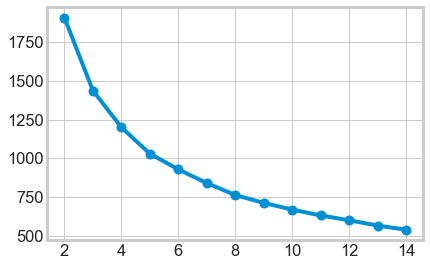

In [120]:
#Checking the inertia changes for various number of clusters

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')

The plot above shows that inertia decreases with increasing number of clusters.

This method allows for assessment of cluster separations and fitting of each observation in its own cluster. The highest score the better. I will perform this analysis for various seeds as well.

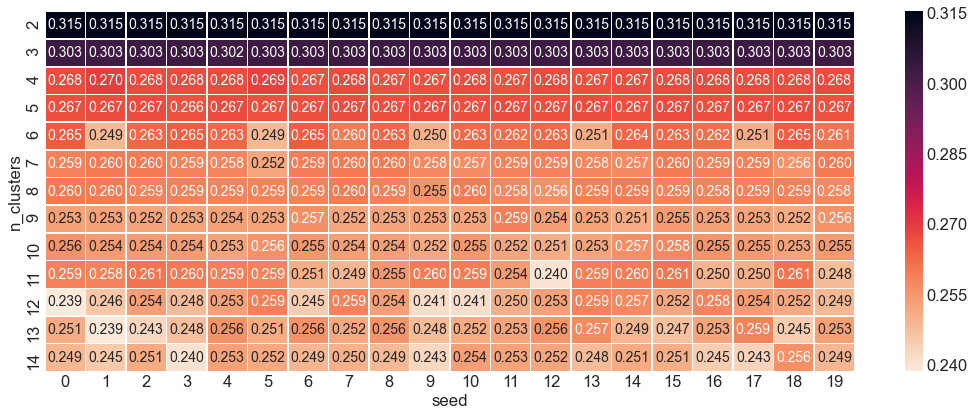

In [121]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        #print("For n_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

The heatmap above shows silhouette scores for various combinations of random state and number of clusters. The highest scores are for 2 and 3 clusters and they are relatively insensitive to seed.

I will chose 3 clusters to get more insight into data.

In [122]:
cluster_data["classification"] = classficationdata["classification"]
cluster_data

age  credit_amount  duration_in_month  classification
0     67           1169                  6               1
1     22           5951                 48               0
2     49           2096                 12               1
3     45           7882                 42               1
4     53           4870                 24               0
..   ...            ...                ...             ...
995   31           1736                 12               1
996   40           3857                 30               1
997   38            804                 12               1
998   23           1845                 45               0
999   27           4576                 45               1

[1000 rows x 4 columns]

In [123]:
kmeans_sel = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

In [124]:
cluster_scaled

array([[ 2.27100592, -0.933901  , -1.86486906],
       [-1.44615223,  1.16304581,  1.7083687 ],
       [ 1.22669602, -0.1815588 , -0.67378981],
       ...,
       [ 0.37810951, -1.4161991 , -0.67378981],
       [-1.29778048, -0.34591111,  1.59746802],
       [-0.76258638,  0.82450846,  1.59746802]])

Below I will create silhouette graph for 3 clusters in order to visually depict fit of each point within its own cluster (modified code from scikit-learn doc).

In [125]:
def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="credit_amount",y="duration_in_month", hue=h,palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="age",y="credit_amount", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="age",y="duration_in_month", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()

In [126]:
def scatters_classify(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="credit_amount",y="duration_in_month", hue="classification",palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="age",y="credit_amount", hue="classification", palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="age",y="duration_in_month", hue="classification", palette=pal, data=data, ax=ax3)
    plt.tight_layout()

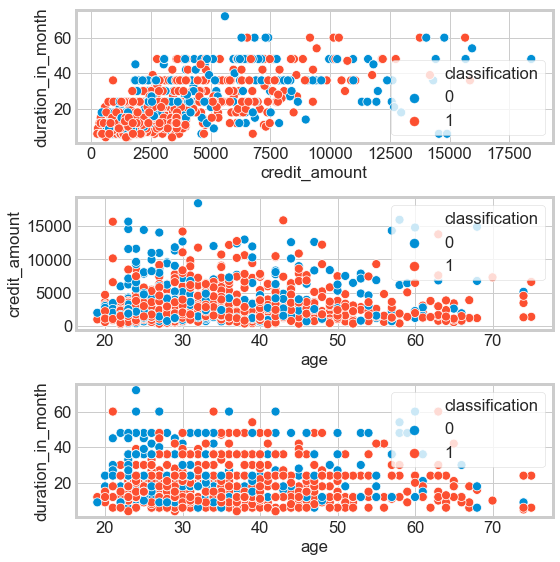

In [127]:
scatters_classify(clustered_data, 'Cluster')

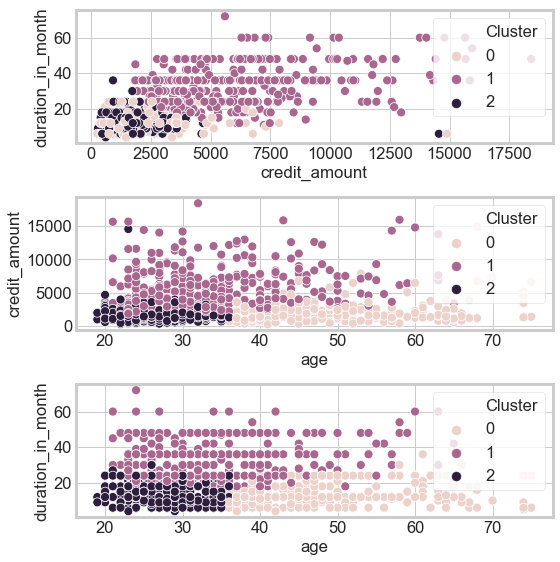

In [128]:
scatters(clustered_data, 'Cluster')

Plots above show three created clusters. Two bottom ones show relatively clear separation of clusters, but it is no so evident on the top one.

I will generate now a heatmap plot for easier business interpretation of customer segmentation

In [129]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km["classification"] = grouped_km["classification"]*100 

In [133]:
grouped_km

age  credit_amount  duration_in_month  classification
Cluster                                                        
0        48.5         1970.3               13.9            80.0
1        34.0         5665.4               32.2            60.0
2        27.7         1736.3               14.3            70.0

Cluster 0 – low mean of credit amount, less duration, middle-aged customers - 80% chances of approval

Cluster 1 – High mean of credit amount, long duration, younger customers - 60% chances of approval

Cluster 2 - low mean of credit amount, short duration, younger customers - 70% chances of approval


### Clustering with Affinity Propagation

In this algorithm there are two relevant parameters: preference and dumping. It means that we don’t define upfront number of clusters, algorithm itself chooses their number. I will fix dumping and check number of clusters in function of preference parameter.

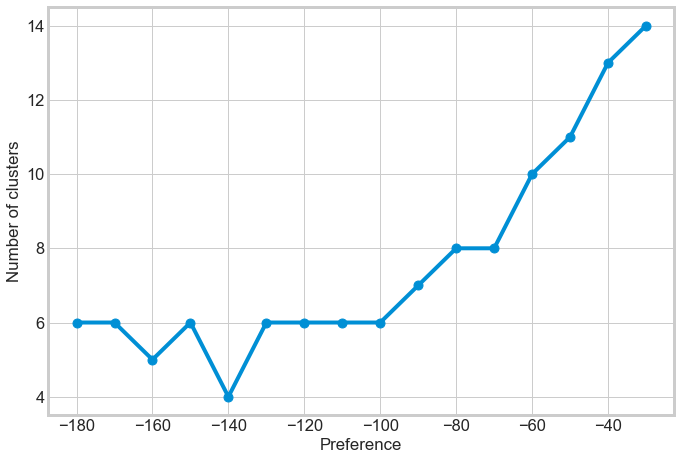

In [130]:
from sklearn.cluster import KMeans, AffinityPropagation

preferences = np.arange(-30,-190,-10)
clusters = []

for p in preferences:
    af = AffinityPropagation(preference=p, damping=0.6, max_iter=400, verbose=False).fit(cluster_scaled)
    labels_af = pd.DataFrame(af.labels_)
    clusters.append(len(af.cluster_centers_indices_))

plt.figure(figsize=(10,7))
plt.xlabel("Preference")
plt.ylabel("Number of clusters")
plt.plot(preferences,clusters, marker='o')

Together with decreasing value of preference parameter number of clusters goes down as well and levels for very small preference values. I will check four clusters option.

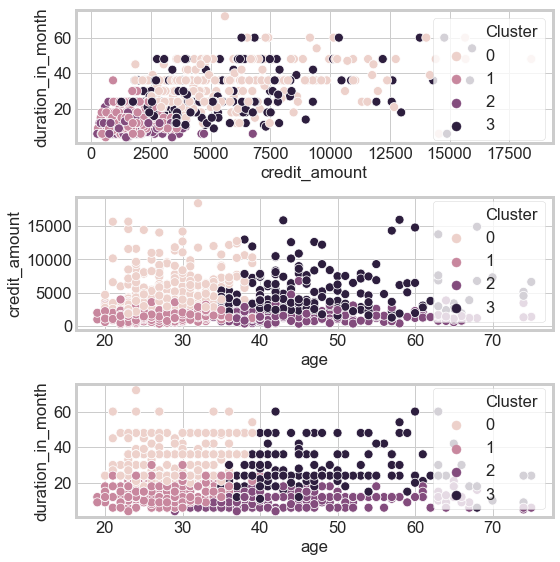

In [131]:
af = AffinityPropagation(preference=-140, damping=0.6, verbose=False).fit(cluster_scaled)
labels_af = pd.DataFrame(af.labels_)
n_clusters_ = len(af.cluster_centers_indices_)

clustered_data_af = cluster_data.assign(Cluster=labels_af)
scatters(clustered_data_af,'Cluster')

grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)

In [132]:
grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)
grouped_af["classification"] = grouped_af["classification"] * 100
grouped_af

age  credit_amount  duration_in_month  classification
Cluster                                                        
0        28.7         5593.7               32.2            60.0
1        27.9         1654.3               15.1            70.0
2        46.0         1551.7               10.7            80.0
3        47.5         4977.9               27.6            70.0

Cluster 0 – high mean of credit amount, long duration, younger customers - 60% chances of approval 

Cluster 1 – low mean of credit amount, short duration, younger customers - 70% chances of approval

Cluster 2 - low mean of credit amount, short duration, older customers - 80% chances of approval

Cluster 3 - high mean of credit amount, middle-time duration, older customers - 70% chances of approval

## 6. Classification on a cluster

##### Attempt with 2 clusters (K=2), K determined by elbow curve 

In [134]:
data_clean.corrwith(data_clean["credit_amount"],axis=0)

credit_amount                                          1.000000
duration_in_month                                      0.624984
installment_as_income_perc                            -0.271316
present_res_since                                      0.028926
age                                                    0.032716
                                                         ...   
job_unskilled - resident                              -0.161757
telephone_none                                        -0.276995
telephone_yes, registered under the customers name     0.276995
foreign_worker_no                                     -0.050050
foreign_worker_yes                                     0.050050
Length: 62, dtype: float64

In [135]:
from sklearn.preprocessing import normalize
X=normalize(data_clean)

Text(0.5, 1.0, 'Elbow curve')

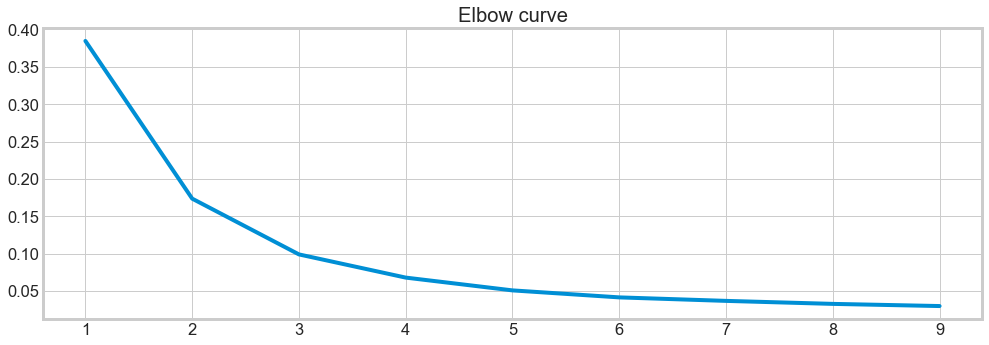

In [136]:
distorsions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1,10), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [137]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2,max_iter=10000,random_state=None)
km.fit_transform(X)

array([[0.0438092 , 0.01046406],
       [0.0101394 , 0.05076516],
       [0.00997011, 0.03192336],
       ...,
       [0.03488244, 0.00700729],
       [0.01676649, 0.0425148 ],
       [0.00815869, 0.04832743]])

The k-means score is an indication of how far the points are from the centroids. In scikit learn, the score is better the closer to zero it is.

Bad scores will return a large negative number, whereas good scores return close to zero. Generally, you will want to take the absolute value of the output from the scores method for better visualization.

In [138]:
km.score(X)# negative score does not mean bad model

-0.17356665466365107

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [139]:
from sklearn.metrics import silhouette_score
silhouette_score(X, km.labels_)

0.6508240060030919

In [140]:
labels = pd.DataFrame(km.labels_)
clustered_data = data_clean.assign(Cluster=labels)

In [141]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km["classification"] = grouped_km["classification"]*100 

In [142]:
grouped_km

credit_amount  duration_in_month  installment_as_income_perc  \
Cluster                                                                 
0               3683.4               22.4                         2.9   
1                917.6               12.1                         3.4   

         present_res_since   age  credits_this_bank  people_under_maintenance  \
Cluster                                                                         
0                      2.8  34.0                1.4                       1.2   
1                      3.2  44.5                1.4                       1.2   

         classification  account_check_status_0 _= ... _ 200 DM  \
Cluster                                                           
0                  70.0                                     0.3   
1                  70.0                                     0.2   

         account_check_status__ 0 DM  ...  housing_own  housing_rent  \
Cluster                               ...                              
0                                0.3  ...          0.7           0.2   
1                                0.3  ...          0.8           0.1   

         job_management/ self-employed/ highly qualified employee/ officer  \
Cluster                                                                      
0                                                      0.2                   
1                                                      0.1                   

         job_skilled employee / official  \
Cluster                                    
0                                    0.6   
1                                    0.5   

         job_unemployed/ unskilled - non-resident  job_unskilled - resident  \
Cluster                                                                       
0                                             0.0                       0.2   
1                                             0.1                       0.3   

         telephone_none  telephone_yes, registered under the customers name   \
Cluster                                                                        
0                   0.6                                                0.4     
1                   0.7                                                0.3     

         foreign_worker_no  foreign_worker_yes  
Cluster                                         
0                      0.0                 1.0  
1                      0.0                 1.0  

[2 rows x 62 columns]

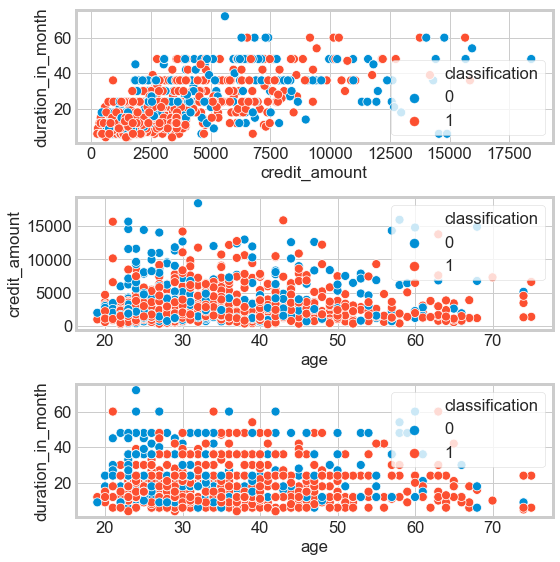

In [144]:
scatters_classify(clustered_data, 'Cluster')

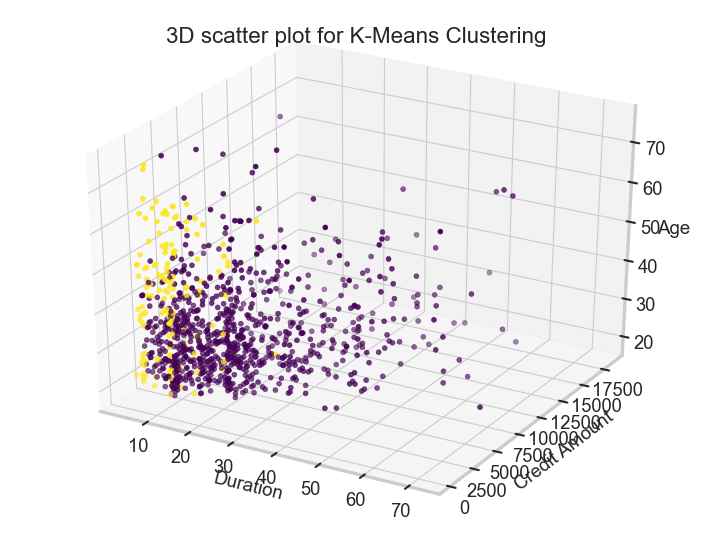

In [145]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

#scatter plot of the three features to show the cluster
ax.scatter3D(clustered_data['duration_in_month'],clustered_data['credit_amount'], clustered_data['age'],
             c=labels, cmap='viridis')

#setting the label    
xLabel = ax.set_xlabel('Duration', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Age', linespacing=3.4)
title = ax.set_title('3D scatter plot for K-Means Clustering')

In [146]:
cluster0 = clustered_data.loc[clustered_data['Cluster'] == 0]
cluster1 = clustered_data.loc[clustered_data['Cluster'] == 1]

In [147]:
cluster0

credit_amount  duration_in_month  installment_as_income_perc  \
1             5951                 48                           2   
2             2096                 12                           2   
3             7882                 42                           2   
4             4870                 24                           3   
5             9055                 36                           2   
..             ...                ...                         ...   
994           2390                 12                           4   
995           1736                 12                           3   
996           3857                 30                           4   
998           1845                 45                           4   
999           4576                 45                           3   

     present_res_since  age  credits_this_bank  people_under_maintenance  \
1                    2   22                  1                         1   
2                    3   49                  1                         2   
3                    4   45                  1                         2   
4                    4   53                  2                         2   
5                    4   35                  1                         2   
..                 ...  ...                ...                       ...   
994                  3   50                  1                         1   
995                  4   31                  1                         1   
996                  4   40                  1                         1   
998                  4   23                  1                         1   
999                  4   27                  1                         1   

     classification  account_check_status_0 _= ... _ 200 DM  \
1                 0                                       1   
2                 1                                       0   
3                 1                                       0   
4                 0                                       0   
5                 1                                       0   
..              ...                                     ...   
994               1                                       0   
995               1                                       0   
996               1                                       0   
998               0                                       0   
999               1                                       1   

     account_check_status__ 0 DM  ...  housing_rent  \
1                              0  ...             0   
2                              0  ...             0   
3                              1  ...             0   
4                              1  ...             0   
5                              0  ...             0   
..                           ...  ...           ...   
994                            0  ...             0   
995                            0  ...             0   
996                            1  ...             0   
998                            1  ...             0   
999                            0  ...             0   

     job_management/ self-employed/ highly qualified employee/ officer  \
1                                                    0                   
2                                                    0                   
3                                                    0                   
4                                                    0                   
5                                                    0                   
..                                                 ...                   
994                                                  0                   
995                                                  0                   
996                                                  1                   
998                                                  0                   
999                            

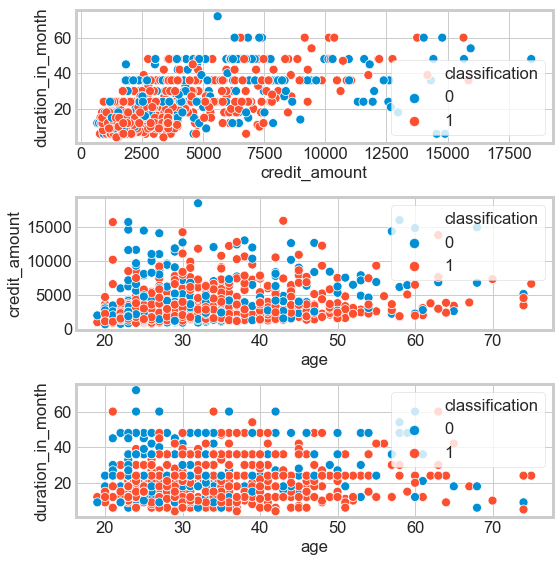

In [148]:
scatters_classify(cluster0, 'Cluster')

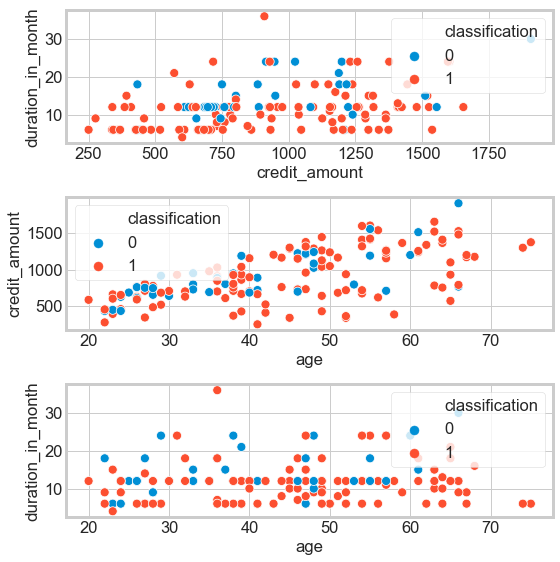

In [149]:
scatters_classify(cluster1, 'Cluster')

In [150]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

cluster0.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in cluster0.columns.values]

In [151]:
# Unscaled, unnormalized data
X_clean = cluster0.drop(['classification'], axis=1)
y_clean = cluster0['classification']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean,y_clean,test_size=0.2, random_state=1)

In [152]:
X_train_clean

credit_amount  duration_in_month  installment_as_income_perc  \
268           8978                 14                           1   
795           2301                  9                           2   
158           3512                 24                           2   
940           3527                 12                           2   
119           2366                 12                           3   
..             ...                ...                         ...   
850           2235                 20                           4   
906           3763                 21                           2   
82            1568                 18                           3   
281           1574                 12                           4   
43            6187                 30                           1   

     present_res_since  age  credits_this_bank  people_under_maintenance  \
268                  4   45                  1                         1   
795                  4   22                  1                         1   
158                  3   38                  2                         1   
940                  3   45                  1                         2   
119                  3   36                  1                         1   
..                 ...  ...                ...                       ...   
850                  2   33                  2                         1   
906                  2   24                  1                         1   
82                   4   24                  1                         1   
281                  2   50                  1                         1   
43                   4   24                  2                         1   

     account_check_status_0 _= ... _ 200 DM  account_check_status__ 0 DM  \
268                                       0                            1   
795                                       0                            0   
158                                       1                            0   
940                                       0                            0   
119                                       1                            0   
..                                      ...                          ...   
850                                       0                            1   
906                                       0                            1   
82                                        0                            0   
281                                       0                            0   
43                                        0                            1   

     account_check_status_>= 200 DM / salary assignments for at least 1 year  \
268                                                  0                         
795                                                  0                         
158                                                  0                         
940                                                  0                         
119                                                  0                         
..                                                 ...                         
850                                                  0                         
906                                                  0                         
82                                                   0                         
281                                                  0                         
43                                                   0                         

     ...  housing_rent  \
268  ...             0   
795  ...             1   
158  ...             0   
940  ...             0   
119  ...             0   
..   ...           ...   
850  ...             1   
906  ...             0   
82   ...             1   
281  ...             0   
43   ...             1   

     job_management/ self-employed/ highly qualified employee/ officer  \
26

[0]	validation_0-auc:0.75023	validation_1-auc:0.66661
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.88864	validation_1-auc:0.78463
Stopping. Best iteration:
[17]	validation_0-auc:0.86983	validation_1-auc:0.78777

[[ 15  35]
 [  7 114]]
              precision    recall  f1-score   support

           0       0.68      0.30      0.42        50
           1       0.77      0.94      0.84       121

    accuracy                           0.75       171
   macro avg       0.72      0.62      0.63       171
weighted avg       0.74      0.75      0.72       171



Model Final Generalization Accuracy: 0.754386


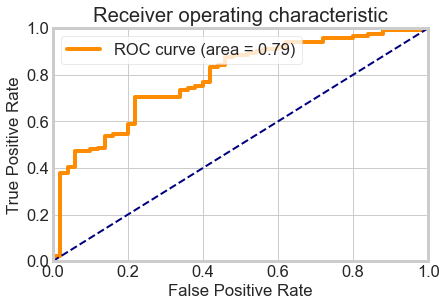

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.005, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=18, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.555,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [153]:
params2={
    'n_estimators':3000,
    'objective': 'binary:logistic',
    'learning_rate': 0.005,
    #'gamma':0.01,
    'subsample':0.555,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'max_depth':8,
    #'seed':1024,
    'n_jobs' : -1
}

xgbclf(params2, X_train_clean, y_train_clean, X_test_clean, y_test_clean)

0.7076023391812866


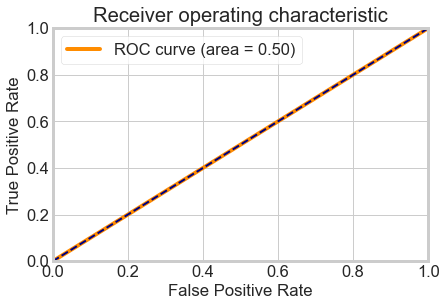

<Figure size 432x432 with 0 Axes>

In [154]:
clf_NN = MLPClassifier(hidden_layer_sizes=(13,10,2),max_iter=1000)
clf_NN.fit(X_train_clean,y_train_clean)     
predict_NN = clf_NN.predict(X_test_clean)
predictproba_NN = clf_NN.predict_proba(X_test_clean)[:,1]
NNAccuracy = accuracy_score(y_test_clean,predict_NN)
print(NNAccuracy)
get_roc (y_test_clean,predictproba_NN)
plt.show()
plt.figure(figsize=(6,6))
#plot_confusion_matrix(predict_NN, normalize=True)
plt.show()

In [155]:
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_train_clean,y_train_clean)
rfc_clf_pred = rfc_clf.predict(X_test_clean)
print('Accuracy:',accuracy_score(rfc_clf_pred,y_test_clean) )
print('Confusion Matrix:', confusion_matrix(rfc_clf_pred,y_test_clean).ravel()) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(rfc_clf_pred,y_test_clean))

# Let's make sure the data is not overfitting
score_rfc = cross_val_score(rfc_clf,X_train_clean,y_train_clean,cv = 10).mean()
print('cross val score:', score_rfc)

Accuracy: 0.7543859649122807
Confusion Matrix: [ 21  13  29 108]
Classification report:
              precision    recall  f1-score   support

           0       0.42      0.62      0.50        34
           1       0.89      0.79      0.84       137

    accuracy                           0.75       171
   macro avg       0.66      0.70      0.67       171
weighted avg       0.80      0.75      0.77       171

cross val score: 0.7691176470588235


RandomForestClassifier
RandomForestClassifier() 

Accuracy: 0.7719298245614035
Confusion Matrix: [ 21  10  29 111]
Classification report:
              precision    recall  f1-score   support

           0       0.42      0.68      0.52        31
           1       0.92      0.79      0.85       140

    accuracy                           0.77       171
   macro avg       0.67      0.74      0.68       171
weighted avg       0.83      0.77      0.79       171

cross val score: 0.7617647058823529


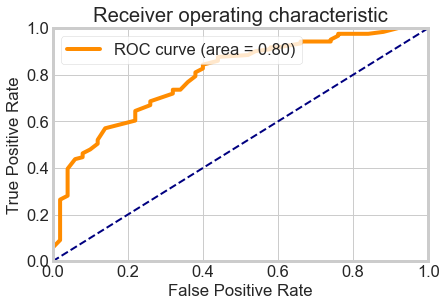

In [156]:
randomforestclf(X_train_clean, y_train_clean,X_test_clean, y_test_clean)

LogisticRegression
LogisticRegression() 

Precision is 0.828125
Recall is 0.8760330578512396
F1-Score is 0.8514056224899599
Accuracy Score is 0.783625730994152


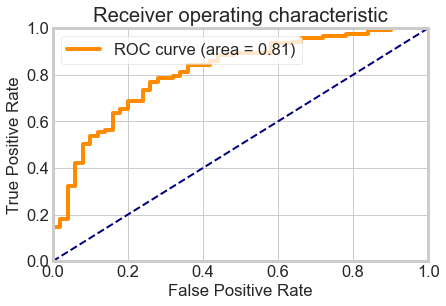

In [161]:
logregclf(X_train_clean, y_train_clean,X_test_clean, y_test_clean)

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model,svm
import warnings
warnings.filterwarnings("ignore")

def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    grid.fit(X_train_clean, y_train_clean)
    mean_scores = grid.cv_results_['mean_test_score']
    return mean_scores,grid.best_score_,grid.best_estimator_
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)

Best accuracy is 0.7470588235294118
LogisticRegression(C=1, random_state=0)


In [163]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

cluster1.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in cluster1.columns.values]


In [164]:
# Unscaled, unnormalized data
X_clean = cluster1.drop(['classification'], axis=1)
y_clean = cluster1['classification']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean,y_clean,test_size=0.2, random_state=1)

[0]	validation_0-auc:0.69663	validation_1-auc:0.55114
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.89888	validation_1-auc:0.81250
[200]	validation_0-auc:0.90712	validation_1-auc:0.81250
Stopping. Best iteration:
[173]	validation_0-auc:0.90337	validation_1-auc:0.85227

[[ 1  7]
 [ 0 22]]
              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.76      1.00      0.86        22

    accuracy                           0.77        30
   macro avg       0.88      0.56      0.54        30
weighted avg       0.82      0.77      0.69        30



Model Final Generalization Accuracy: 0.766667


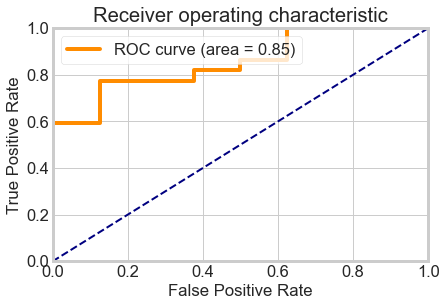

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.005, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=174, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.555,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [165]:
params2={
    'n_estimators':3000,
    'objective': 'binary:logistic',
    'learning_rate': 0.005,
    #'gamma':0.01,
    'subsample':0.555,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'max_depth':8,
    #'seed':1024,
    'n_jobs' : -1
}

xgbclf(params2, X_train_clean, y_train_clean, X_test_clean, y_test_clean)

0.6333333333333333


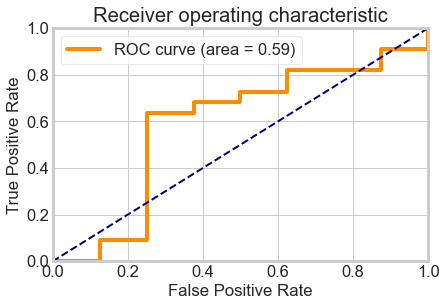

<Figure size 432x432 with 0 Axes>

In [166]:
clf_NN = MLPClassifier(hidden_layer_sizes=(13,10,2),max_iter=1000)
clf_NN.fit(X_train_clean,y_train_clean)     
predict_NN = clf_NN.predict(X_test_clean)
predictproba_NN = clf_NN.predict_proba(X_test_clean)[:,1]
NNAccuracy = accuracy_score(y_test_clean,predict_NN)
print(NNAccuracy)
get_roc (y_test_clean,predictproba_NN)
plt.show()
plt.figure(figsize=(6,6))
#plot_confusion_matrix(predict_NN, normalize=True)
plt.show()

Accuracy: 0.7666666666666667
Confusion Matrix: [ 3  2  5 20]
Classification report:
              precision    recall  f1-score   support

           0       0.38      0.60      0.46         5
           1       0.91      0.80      0.85        25

    accuracy                           0.77        30
   macro avg       0.64      0.70      0.66        30
weighted avg       0.82      0.77      0.79        30

cross val score: 0.7560606060606061
RandomForestClassifier
RandomForestClassifier() 

Accuracy: 0.8
Confusion Matrix: [ 4  2  4 20]
Classification report:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.83      0.87        24

    accuracy                           0.80        30
   macro avg       0.70      0.75      0.72        30
weighted avg       0.83      0.80      0.81        30

cross val score: 0.7984848484848485


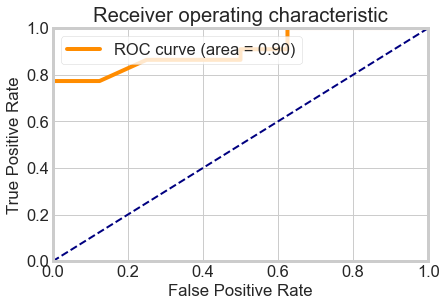

In [168]:
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_train_clean,y_train_clean)
rfc_clf_pred = rfc_clf.predict(X_test_clean)
print('Accuracy:',accuracy_score(rfc_clf_pred,y_test_clean) )
print('Confusion Matrix:', confusion_matrix(rfc_clf_pred,y_test_clean).ravel()) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(rfc_clf_pred,y_test_clean))

# Let's make sure the data is not overfitting
score_rfc = cross_val_score(rfc_clf,X_train_clean,y_train_clean,cv = 10).mean()
print('cross val score:', score_rfc)

randomforestclf(X_train_clean, y_train_clean,X_test_clean, y_test_clean)

Best accuracy is 0.7909090909090908
LogisticRegression(C=100, random_state=0)
LogisticRegression
LogisticRegression() 

Precision is 0.9
Recall is 0.8181818181818182
F1-Score is 0.8571428571428572
Accuracy Score is 0.8


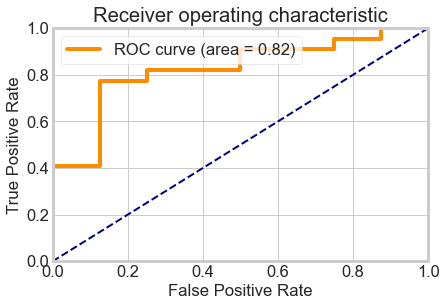

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model,svm
import warnings
warnings.filterwarnings("ignore")

def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    #X=data_clean.iloc[:,:-1].values
    #y=data_clean.iloc[:,-1].values
    grid.fit(X_train_clean, y_train_clean)
    mean_scores = grid.cv_results_['mean_test_score']
    return mean_scores,grid.best_score_,grid.best_estimator_
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)

logregclf(X_train_clean, y_train_clean,X_test_clean, y_test_clean)

We can see how after using classification on the clustering models, we get a better ROC curve. 

### Clustering on most important columns - Age, credit amount and duration

##### Attempt with 3 clusters (K=3), K determined by elbow curve

In [177]:
cols_of_interest = ['age', 'credit_amount', 'duration_in_month']

In [178]:
data = data_clean[cols_of_interest]

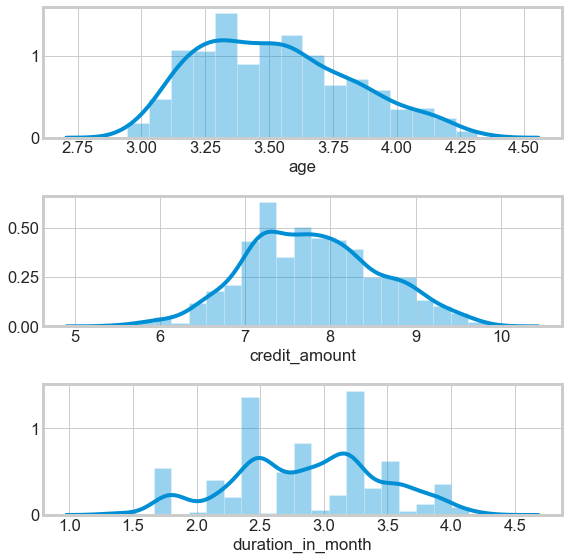

In [179]:
data_log = np.log(data[['age', 'credit_amount','duration_in_month']])

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(data_log["age"], ax=ax1)
sns.distplot(data_log["credit_amount"], ax=ax2)
sns.distplot(data_log["duration_in_month"], ax=ax3)
plt.tight_layout()

In [180]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(data_log)

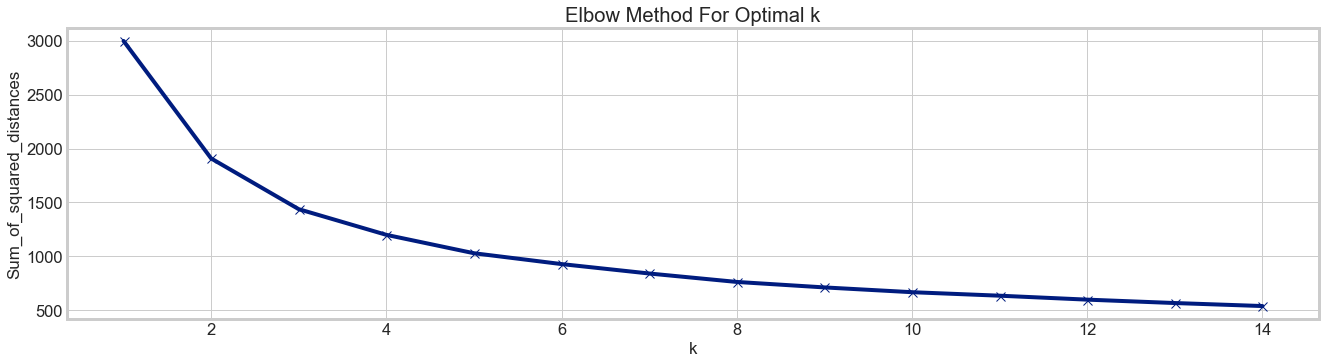

In [181]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

K-Means


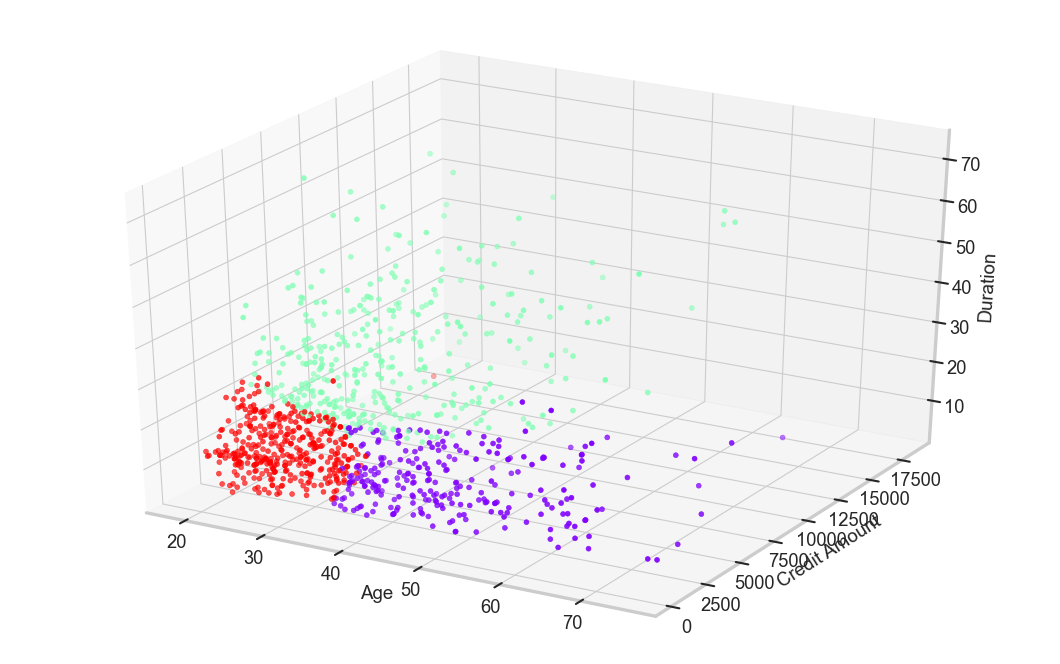

In [182]:
from mpl_toolkits.mplot3d import Axes3D

km = KMeans(n_clusters=3)
km.fit(cluster_scaled)
kmeans_labels = km.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(data['age'],data['credit_amount'],data['duration_in_month'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("K-Means")

In [183]:
df_clustered_kmeans = data.assign(Cluster=kmeans_labels)
grouped_kmeans = df_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

age  credit_amount  duration_in_month
Cluster                                        
0        48.6         1970.5               13.9
1        34.2         5698.9               32.3
2        27.7         1746.4               14.4

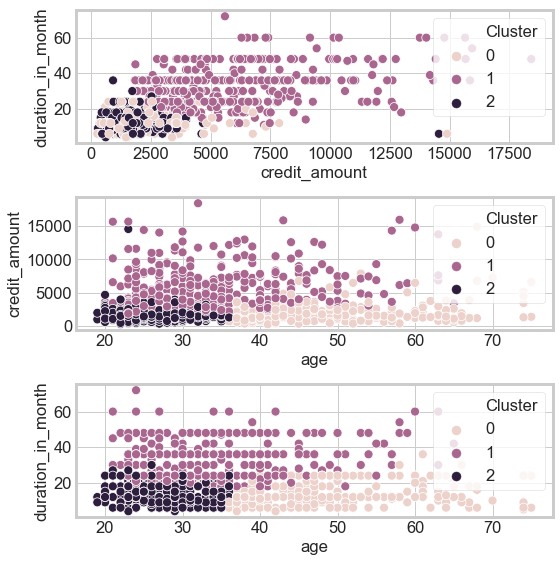

In [184]:
scatters(df_clustered_kmeans, 'Cluster')

In [185]:
clusterData = data_clean.copy()
clusterData

credit_amount  duration_in_month  installment_as_income_perc  \
0             1169                  6                           4   
1             5951                 48                           2   
2             2096                 12                           2   
3             7882                 42                           2   
4             4870                 24                           3   
..             ...                ...                         ...   
995           1736                 12                           3   
996           3857                 30                           4   
997            804                 12                           4   
998           1845                 45                           4   
999           4576                 45                           3   

     present_res_since  age  credits_this_bank  people_under_maintenance  \
0                    4   67                  2                         1   
1                    2   22                  1                         1   
2                    3   49                  1                         2   
3                    4   45                  1                         2   
4                    4   53                  2                         2   
..                 ...  ...                ...                       ...   
995                  4   31                  1                         1   
996                  4   40                  1                         1   
997                  4   38                  1                         1   
998                  4   23                  1                         1   
999                  4   27                  1                         1   

     classification  account_check_status_0 _= ... _ 200 DM  \
0                 1                                       0   
1                 0                                       1   
2                 1                                       0   
3                 1                                       0   
4                 0                                       0   
..              ...                                     ...   
995               1                                       0   
996               1                                       0   
997               1                                       0   
998               0                                       0   
999               1                                       1   

     account_check_status__ 0 DM  ...  housing_own  housing_rent  \
0                              1  ...            1             0   
1                              0  ...            1             0   
2                              0  ...            1             0   
3                              1  ...            0             0   
4                              1  ...            0             0   
..                           ...  ...          ...           ...   
995                            0  ...            1             0   
996                            1  ...            1             0   
997                            0  ...            1             0   
998                            1  ...            0             0   
999                            0  ...            1             0   

     job_management/ self-employed/ highly qualified employee/ officer  \
0                                                    0                   
1                                                    0                   
2                                                    0                   
3                                                    0                   
4                                                    0                   
..                                                 ...                   
995                                                  0                   
996                                                  1                   
997                    

In [186]:
clusterData["Cluster"] = df_clustered_kmeans["Cluster"]
clusterData

credit_amount  duration_in_month  installment_as_income_perc  \
0             1169                  6                           4   
1             5951                 48                           2   
2             2096                 12                           2   
3             7882                 42                           2   
4             4870                 24                           3   
..             ...                ...                         ...   
995           1736                 12                           3   
996           3857                 30                           4   
997            804                 12                           4   
998           1845                 45                           4   
999           4576                 45                           3   

     present_res_since  age  credits_this_bank  people_under_maintenance  \
0                    4   67                  2                         1   
1                    2   22                  1                         1   
2                    3   49                  1                         2   
3                    4   45                  1                         2   
4                    4   53                  2                         2   
..                 ...  ...                ...                       ...   
995                  4   31                  1                         1   
996                  4   40                  1                         1   
997                  4   38                  1                         1   
998                  4   23                  1                         1   
999                  4   27                  1                         1   

     classification  account_check_status_0 _= ... _ 200 DM  \
0                 1                                       0   
1                 0                                       1   
2                 1                                       0   
3                 1                                       0   
4                 0                                       0   
..              ...                                     ...   
995               1                                       0   
996               1                                       0   
997               1                                       0   
998               0                                       0   
999               1                                       1   

     account_check_status__ 0 DM  ...  housing_rent  \
0                              1  ...             0   
1                              0  ...             0   
2                              0  ...             0   
3                              1  ...             0   
4                              1  ...             0   
..                           ...  ...           ...   
995                            0  ...             0   
996                            1  ...             0   
997                            0  ...             0   
998                            1  ...             0   
999                            0  ...             0   

     job_management/ self-employed/ highly qualified employee/ officer  \
0                                                    0                   
1                                                    0                   
2                                                    0                   
3                                                    0                   
4                                                    0                   
..                                                 ...                   
995                                                  0                   
996                                                  1                   
997                                                  0                   
998                                                  0                   
999                            

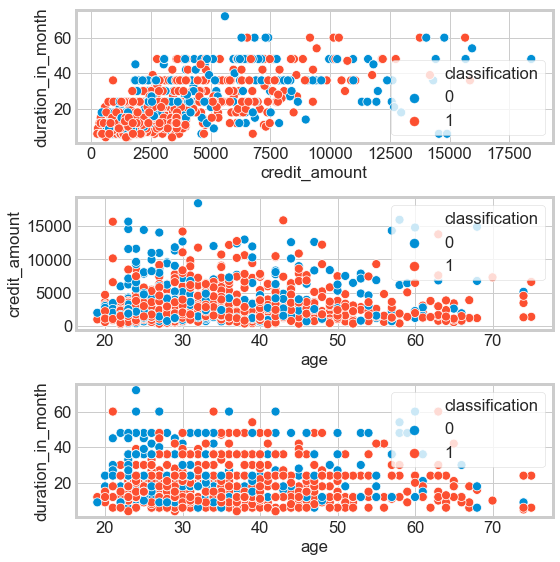

In [187]:
scatters_classify(clusterData, 'Cluster')

In [188]:
labels = pd.DataFrame(km.labels_)
clustered_data = data.assign(Cluster=labels)

In [189]:
clusterData = data_clean.copy()
clusterData

credit_amount  duration_in_month  installment_as_income_perc  \
0             1169                  6                           4   
1             5951                 48                           2   
2             2096                 12                           2   
3             7882                 42                           2   
4             4870                 24                           3   
..             ...                ...                         ...   
995           1736                 12                           3   
996           3857                 30                           4   
997            804                 12                           4   
998           1845                 45                           4   
999           4576                 45                           3   

     present_res_since  age  credits_this_bank  people_under_maintenance  \
0                    4   67                  2                         1   
1                    2   22                  1                         1   
2                    3   49                  1                         2   
3                    4   45                  1                         2   
4                    4   53                  2                         2   
..                 ...  ...                ...                       ...   
995                  4   31                  1                         1   
996                  4   40                  1                         1   
997                  4   38                  1                         1   
998                  4   23                  1                         1   
999                  4   27                  1                         1   

     classification  account_check_status_0 _= ... _ 200 DM  \
0                 1                                       0   
1                 0                                       1   
2                 1                                       0   
3                 1                                       0   
4                 0                                       0   
..              ...                                     ...   
995               1                                       0   
996               1                                       0   
997               1                                       0   
998               0                                       0   
999               1                                       1   

     account_check_status__ 0 DM  ...  housing_own  housing_rent  \
0                              1  ...            1             0   
1                              0  ...            1             0   
2                              0  ...            1             0   
3                              1  ...            0             0   
4                              1  ...            0             0   
..                           ...  ...          ...           ...   
995                            0  ...            1             0   
996                            1  ...            1             0   
997                            0  ...            1             0   
998                            1  ...            0             0   
999                            0  ...            1             0   

     job_management/ self-employed/ highly qualified employee/ officer  \
0                                                    0                   
1                                                    0                   
2                                                    0                   
3                                                    0                   
4                                                    0                   
..                                                 ...                   
995                                                  0                   
996                                                  1                   
997                    

In [190]:
clusterData["Cluster"] = clustered_data["Cluster"]
clusterData

credit_amount  duration_in_month  installment_as_income_perc  \
0             1169                  6                           4   
1             5951                 48                           2   
2             2096                 12                           2   
3             7882                 42                           2   
4             4870                 24                           3   
..             ...                ...                         ...   
995           1736                 12                           3   
996           3857                 30                           4   
997            804                 12                           4   
998           1845                 45                           4   
999           4576                 45                           3   

     present_res_since  age  credits_this_bank  people_under_maintenance  \
0                    4   67                  2                         1   
1                    2   22                  1                         1   
2                    3   49                  1                         2   
3                    4   45                  1                         2   
4                    4   53                  2                         2   
..                 ...  ...                ...                       ...   
995                  4   31                  1                         1   
996                  4   40                  1                         1   
997                  4   38                  1                         1   
998                  4   23                  1                         1   
999                  4   27                  1                         1   

     classification  account_check_status_0 _= ... _ 200 DM  \
0                 1                                       0   
1                 0                                       1   
2                 1                                       0   
3                 1                                       0   
4                 0                                       0   
..              ...                                     ...   
995               1                                       0   
996               1                                       0   
997               1                                       0   
998               0                                       0   
999               1                                       1   

     account_check_status__ 0 DM  ...  housing_rent  \
0                              1  ...             0   
1                              0  ...             0   
2                              0  ...             0   
3                              1  ...             0   
4                              1  ...             0   
..                           ...  ...           ...   
995                            0  ...             0   
996                            1  ...             0   
997                            0  ...             0   
998                            1  ...             0   
999                            0  ...             0   

     job_management/ self-employed/ highly qualified employee/ officer  \
0                                                    0                   
1                                                    0                   
2                                                    0                   
3                                                    0                   
4                                                    0                   
..                                                 ...                   
995                                                  0                   
996                                                  1                   
997                                                  0                   
998                                                  0                   
999                            

In [191]:
cluster0 = clusterData.loc[clusterData['Cluster'] == 0]
cluster1 = clusterData.loc[clusterData['Cluster'] == 1]
cluster2 = clusterData.loc[clusterData['Cluster'] == 2]

In [192]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

cluster0.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in cluster0.columns.values]

In [193]:
# Unscaled, unnormalized data
X_clean = cluster0.drop(['classification'], axis=1)
y_clean = cluster0['classification']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean,y_clean,test_size=0.2, random_state=1)

In [194]:
y_test_clean

430    1
709    1
427    1
406    1
725    1
843    1
288    1
990    1
443    0
678    1
90     1
997    1
146    1
316    1
234    1
344    1
13     0
186    0
955    1
702    1
849    0
891    1
445    1
156    1
139    1
493    1
126    1
27     1
271    1
732    1
412    0
977    1
925    0
215    1
765    1
629    1
994    1
928    1
619    1
361    1
830    1
674    0
975    1
989    1
100    1
61     1
648    0
649    0
697    1
62     0
448    1
784    1
123    1
Name: classification, dtype: int64

[0]	validation_0-auc:0.80701	validation_1-auc:0.63837
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.98923	validation_1-auc:0.80930
Stopping. Best iteration:
[88]	validation_0-auc:0.98847	validation_1-auc:0.84186

[[ 5  5]
 [ 6 37]]
              precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.88      0.86      0.87        43

    accuracy                           0.79        53
   macro avg       0.67      0.68      0.67        53
weighted avg       0.80      0.79      0.80        53



Model Final Generalization Accuracy: 0.792453


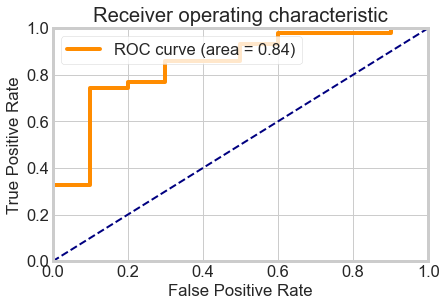

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=89, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.555,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [203]:
params2={
    'n_estimators':3000,
    'objective': 'binary:logistic',
    'learning_rate': 0.5,
    #'gamma':0.01,
    'subsample':0.555,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'max_depth':8,
    #'seed':1024,
    'n_jobs' : -1
}

xgbclf(params2, X_train_clean, y_train_clean, X_test_clean, y_test_clean)

0.8113207547169812


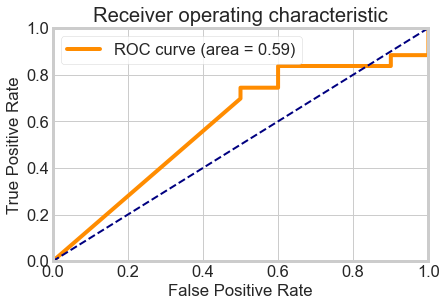

<Figure size 432x432 with 0 Axes>

In [204]:
clf_NN = MLPClassifier(hidden_layer_sizes=(13,10,2),max_iter=1000)
clf_NN.fit(X_train_clean,y_train_clean)     
predict_NN = clf_NN.predict(X_test_clean)
predictproba_NN = clf_NN.predict_proba(X_test_clean)[:,1]
NNAccuracy = accuracy_score(y_test_clean,predict_NN)
print(NNAccuracy)
get_roc (y_test_clean,predictproba_NN)
plt.show()
plt.figure(figsize=(6,6))
#plot_confusion_matrix(predict_NN, normalize=True)
plt.show()

In [205]:
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_train_clean,y_train_clean)
rfc_clf_pred = rfc_clf.predict(X_test_clean)
print('Accuracy:',accuracy_score(rfc_clf_pred,y_test_clean) )
print('Confusion Matrix:', confusion_matrix(rfc_clf_pred,y_test_clean).ravel()) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(rfc_clf_pred,y_test_clean))

# Let's make sure the data is not overfitting
score_rfc = cross_val_score(rfc_clf,X_train_clean,y_train_clean,cv = 10).mean()
print('cross val score:', score_rfc)

Accuracy: 0.8490566037735849
Confusion Matrix: [ 2  0  8 43]
Classification report:
              precision    recall  f1-score   support

           0       0.20      1.00      0.33         2
           1       1.00      0.84      0.91        51

    accuracy                           0.85        53
   macro avg       0.60      0.92      0.62        53
weighted avg       0.97      0.85      0.89        53

cross val score: 0.8033333333333333


RandomForestClassifier
RandomForestClassifier() 

Accuracy: 0.8490566037735849
Confusion Matrix: [ 2  0  8 43]
Classification report:
              precision    recall  f1-score   support

           0       0.20      1.00      0.33         2
           1       1.00      0.84      0.91        51

    accuracy                           0.85        53
   macro avg       0.60      0.92      0.62        53
weighted avg       0.97      0.85      0.89        53

cross val score: 0.7890476190476189


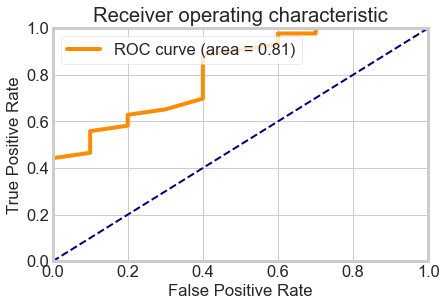

In [206]:
randomforestclf(X_train_clean, y_train_clean,X_test_clean, y_test_clean)

LogisticRegression
LogisticRegression() 

Precision is 0.8478260869565217
Recall is 0.9069767441860465
F1-Score is 0.8764044943820224
Accuracy Score is 0.7924528301886793


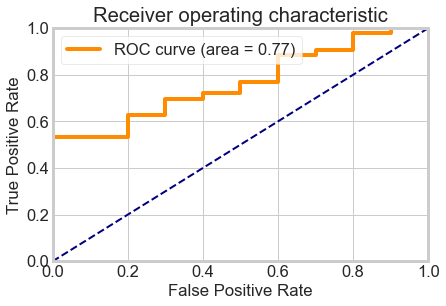

In [207]:
logregclf(X_train_clean, y_train_clean,X_test_clean, y_test_clean)

In [208]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model,svm
import warnings
warnings.filterwarnings("ignore")

def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    grid.fit(X_train_clean, y_train_clean)
    mean_scores = grid.cv_results_['mean_test_score']
    return mean_scores,grid.best_score_,grid.best_estimator_
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)

Best accuracy is 0.8266666666666665
LogisticRegression(C=0.1, random_state=0)


In [209]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

cluster1.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in cluster1.columns.values]


In [210]:
# Unscaled, unnormalized data
X_clean = cluster1.drop(['classification'], axis=1)
y_clean = cluster1['classification']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean,y_clean,test_size=0.2, random_state=1)

[0]	validation_0-auc:0.73292	validation_1-auc:0.59164
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.88282	validation_1-auc:0.80352
[200]	validation_0-auc:0.89792	validation_1-auc:0.80865
[300]	validation_0-auc:0.91107	validation_1-auc:0.82331
[400]	validation_0-auc:0.91837	validation_1-auc:0.82551
Stopping. Best iteration:
[391]	validation_0-auc:0.91837	validation_1-auc:0.82845

[[14 17]
 [ 5 39]]
              precision    recall  f1-score   support

           0       0.74      0.45      0.56        31
           1       0.70      0.89      0.78        44

    accuracy                           0.71        75
   macro avg       0.72      0.67      0.67        75
weighted avg       0.71      0.71      0.69        75



Model Final Generalization Accuracy: 0.706667


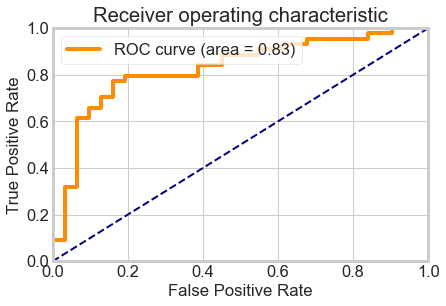

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.005, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=392, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.555,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [211]:
params2={
    'n_estimators':3000,
    'objective': 'binary:logistic',
    'learning_rate': 0.005,
    #'gamma':0.01,
    'subsample':0.555,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'max_depth':8,
    #'seed':1024,
    'n_jobs' : -1
}

xgbclf(params2, X_train_clean, y_train_clean, X_test_clean, y_test_clean)

0.5866666666666667


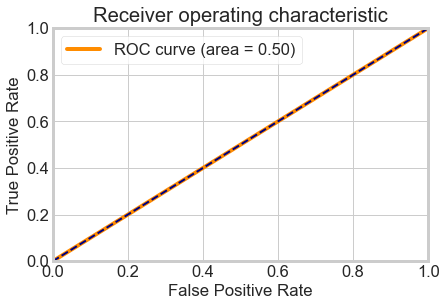

<Figure size 432x432 with 0 Axes>

In [212]:
clf_NN = MLPClassifier(hidden_layer_sizes=(13,10,2),max_iter=1000)
clf_NN.fit(X_train_clean,y_train_clean)     
predict_NN = clf_NN.predict(X_test_clean)
predictproba_NN = clf_NN.predict_proba(X_test_clean)[:,1]
NNAccuracy = accuracy_score(y_test_clean,predict_NN)
print(NNAccuracy)
get_roc (y_test_clean,predictproba_NN)
plt.show()
plt.figure(figsize=(6,6))
#plot_confusion_matrix(predict_NN, normalize=True)
plt.show()

Accuracy: 0.6533333333333333
Confusion Matrix: [ 9  4 22 40]
Classification report:
              precision    recall  f1-score   support

           0       0.29      0.69      0.41        13
           1       0.91      0.65      0.75        62

    accuracy                           0.65        75
   macro avg       0.60      0.67      0.58        75
weighted avg       0.80      0.65      0.69        75

cross val score: 0.7025287356321839
RandomForestClassifier
RandomForestClassifier() 

Accuracy: 0.7066666666666667
Confusion Matrix: [11  2 20 42]
Classification report:
              precision    recall  f1-score   support

           0       0.35      0.85      0.50        13
           1       0.95      0.68      0.79        62

    accuracy                           0.71        75
   macro avg       0.65      0.76      0.65        75
weighted avg       0.85      0.71      0.74        75

cross val score: 0.7159770114942529


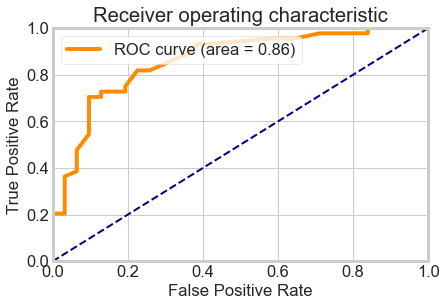

In [213]:
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_train_clean,y_train_clean)
rfc_clf_pred = rfc_clf.predict(X_test_clean)
print('Accuracy:',accuracy_score(rfc_clf_pred,y_test_clean) )
print('Confusion Matrix:', confusion_matrix(rfc_clf_pred,y_test_clean).ravel()) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(rfc_clf_pred,y_test_clean))

# Let's make sure the data is not overfitting
score_rfc = cross_val_score(rfc_clf,X_train_clean,y_train_clean,cv = 10).mean()
print('cross val score:', score_rfc)

randomforestclf(X_train_clean, y_train_clean,X_test_clean, y_test_clean)

In [215]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model,svm
import warnings
warnings.filterwarnings("ignore")

def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    grid.fit(X_train_clean, y_train_clean)
    mean_scores = grid.cv_results_['mean_test_score']
    return mean_scores,grid.best_score_,grid.best_estimator_
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)

Best accuracy is 0.7022988505747126
LogisticRegression(C=100, random_state=0)


LogisticRegression
LogisticRegression() 

Precision is 0.7254901960784313
Recall is 0.8409090909090909
F1-Score is 0.7789473684210527
Accuracy Score is 0.72


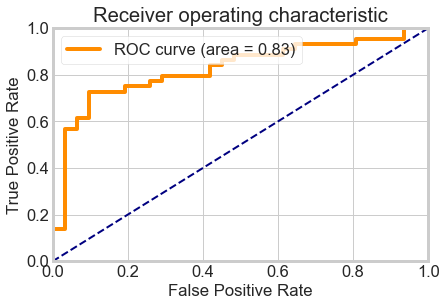

In [221]:
logregclf(X_train_clean, y_train_clean, X_test_clean, y_test_clean)

We can see how after using classification on the clustering models, we get a better ROC curve. 

In [222]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

cluster2.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in cluster2.columns.values]


In [223]:
# Unscaled, unnormalized data
X_clean = cluster2.drop(['classification'], axis=1)
y_clean = cluster2['classification']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean,y_clean,test_size=0.2, random_state=1)

[0]	validation_0-auc:0.75323	validation_1-auc:0.70162
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.85963	validation_1-auc:0.81586
Stopping. Best iteration:
[41]	validation_0-auc:0.85076	validation_1-auc:0.83973

[[ 5 18]
 [ 1 50]]
              precision    recall  f1-score   support

           0       0.83      0.22      0.34        23
           1       0.74      0.98      0.84        51

    accuracy                           0.74        74
   macro avg       0.78      0.60      0.59        74
weighted avg       0.77      0.74      0.69        74



Model Final Generalization Accuracy: 0.743243


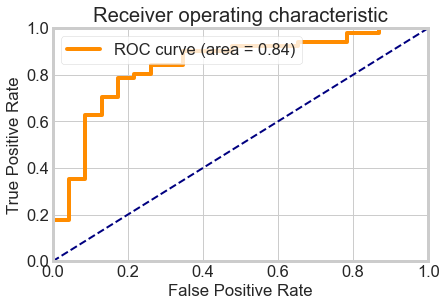

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.005, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=42, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.555,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [224]:
params2={
    'n_estimators':3000,
    'objective': 'binary:logistic',
    'learning_rate': 0.005,
    #'gamma':0.01,
    'subsample':0.555,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'max_depth':8,
    #'seed':1024,
    'n_jobs' : -1
}

xgbclf(params2, X_train_clean, y_train_clean, X_test_clean, y_test_clean)

0.6891891891891891


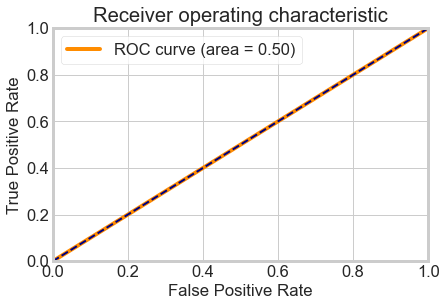

<Figure size 432x432 with 0 Axes>

In [225]:
clf_NN = MLPClassifier(hidden_layer_sizes=(13,10,2),max_iter=1000)
clf_NN.fit(X_train_clean,y_train_clean)     
predict_NN = clf_NN.predict(X_test_clean)
predictproba_NN = clf_NN.predict_proba(X_test_clean)[:,1]
NNAccuracy = accuracy_score(y_test_clean,predict_NN)
print(NNAccuracy)
get_roc (y_test_clean,predictproba_NN)
plt.show()
plt.figure(figsize=(6,6))
#plot_confusion_matrix(predict_NN, normalize=True)
plt.show()

In [226]:
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_train_clean,y_train_clean)
rfc_clf_pred = rfc_clf.predict(X_test_clean)
print('Accuracy:',accuracy_score(rfc_clf_pred,y_test_clean))
print('Confusion Matrix:', confusion_matrix(rfc_clf_pred,y_test_clean).ravel()) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(rfc_clf_pred,y_test_clean))

# Let's make sure the data is not overfitting
score_rfc = cross_val_score(rfc_clf,X_train_clean,y_train_clean,cv = 10).mean()
print('cross val score:', score_rfc)

Accuracy: 0.7432432432432432
Confusion Matrix: [ 9  5 14 46]
Classification report:
              precision    recall  f1-score   support

           0       0.39      0.64      0.49        14
           1       0.90      0.77      0.83        60

    accuracy                           0.74        74
   macro avg       0.65      0.70      0.66        74
weighted avg       0.81      0.74      0.76        74

cross val score: 0.7377011494252874


RandomForestClassifier
RandomForestClassifier() 

Accuracy: 0.7837837837837838
Confusion Matrix: [11  4 12 47]
Classification report:
              precision    recall  f1-score   support

           0       0.48      0.73      0.58        15
           1       0.92      0.80      0.85        59

    accuracy                           0.78        74
   macro avg       0.70      0.76      0.72        74
weighted avg       0.83      0.78      0.80        74

cross val score: 0.7477011494252874


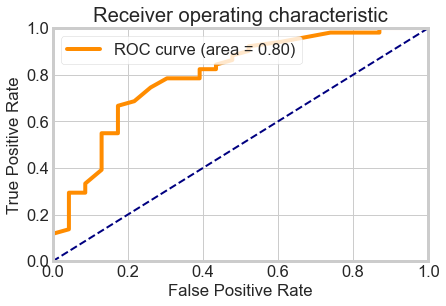

In [227]:
randomforestclf(X_train_clean, y_train_clean,X_test_clean, y_test_clean)

In [228]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model,svm
import warnings
warnings.filterwarnings("ignore")

def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    grid.fit(X_train_clean, y_train_clean)
    mean_scores = grid.cv_results_['mean_test_score']
    return mean_scores,grid.best_score_,grid.best_estimator_
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)

Best accuracy is 0.7371264367816092
LogisticRegression(C=10, random_state=0)


LogisticRegression
LogisticRegression() 

Precision is 0.7719298245614035
Recall is 0.8627450980392157
F1-Score is 0.8148148148148149
Accuracy Score is 0.7297297297297297


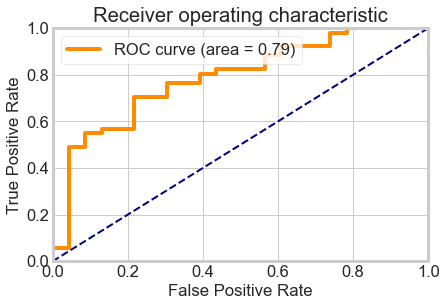

In [229]:
logregclf(X_train_clean, y_train_clean, X_test_clean, y_test_clean)

### Improvement in Mean ROC Curve 

| Classification Method | Before Clustering | After Clustering |
| --- | --- | --- |
| XGBoost | 0.79 | 0.83 |
| Logistic Regression | 0.79 | 0.79 |
| Neural Networks | 0.50 | 0.53 |
| Random Forest | 0.79 | 0.82 |

### Which Cluster model to choose - K=2 or K=3 ? 

<b> K = 3

K-Means


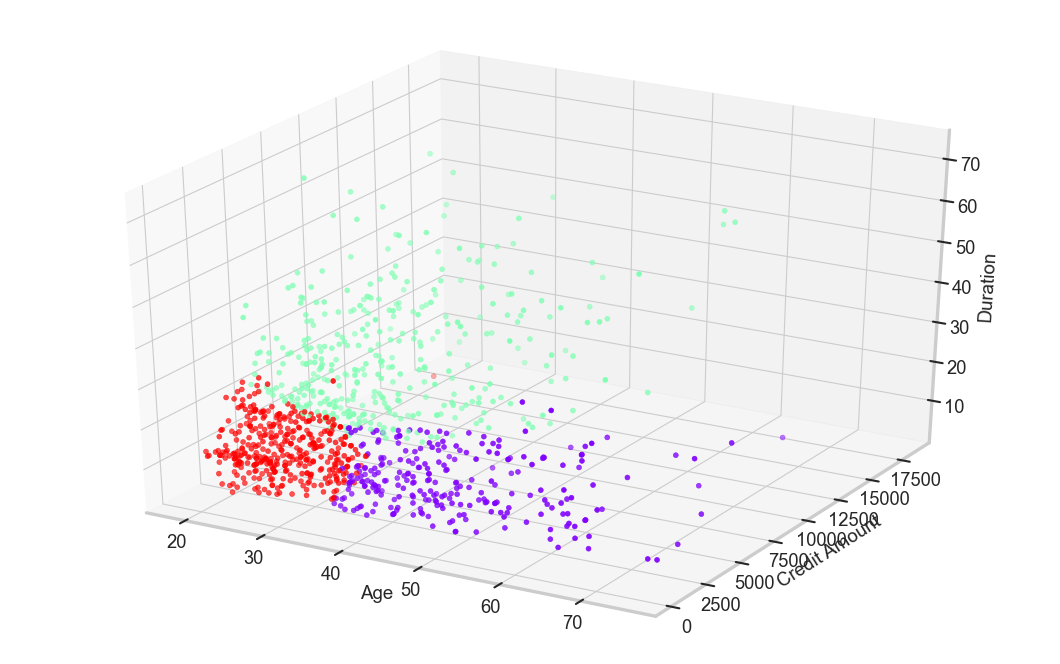

In [182]:
from mpl_toolkits.mplot3d import Axes3D

km = KMeans(n_clusters=3)
km.fit(cluster_scaled)
kmeans_labels = km.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(data['age'],data['credit_amount'],data['duration_in_month'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("K-Means")

<b> K = 2

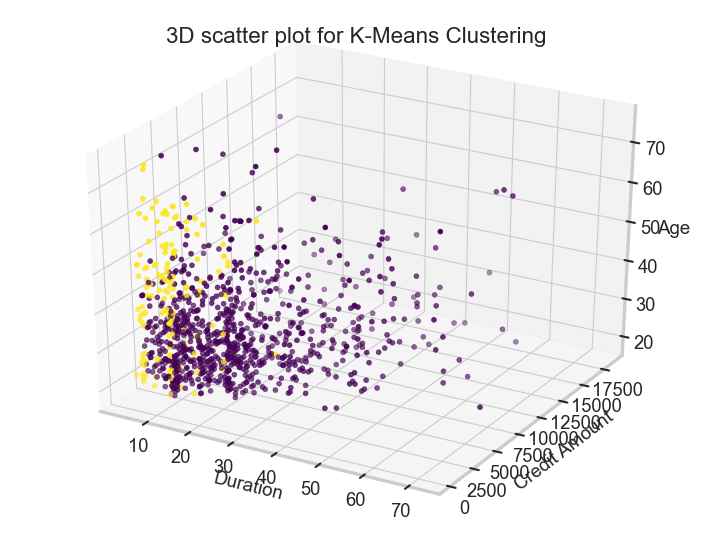

In [145]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

#scatter plot of the three features to show the cluster
ax.scatter3D(clustered_data['duration_in_month'],clustered_data['credit_amount'], clustered_data['age'],
             c=labels, cmap='viridis')

#setting the label    
xLabel = ax.set_xlabel('Duration', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Age', linespacing=3.4)
title = ax.set_title('3D scatter plot for K-Means Clustering')

We choose k=3 because as seen from the cluster 3D models given above, we can say that 3 clusters are almost equally distributed and it is spread out more. On the other hand, when K=2 we can see one kind of cluster occupies most of the area because of which the effect of clustering is not noticed much. 

We can see that from the results given above too. 

## 7. Data Simulation for Pandemic

Some terms used in this section and their meaning:

1. Potential Exposure before Pandemic - Loss a financial institution can occur before pandemic.  
2. Potential Exposure after Pandemic - Loss a financial institution can occur after pandemic.

The dataset would be simulated according to a global pandemic. After the data simulation, our existing classification models would be used to predict the loan outcome on our simulated dataset. The most important observation that can be made is that
the number of loans had dropped considerably after the pandemic. We can see the pandemic’s effect on the number of loans approved. The number of loan approvals had drastically reduced. 

In [231]:
data_clean.columns

Index(['credit_amount', 'duration_in_month', 'installment_as_income_perc',
       'present_res_since', 'age', 'credits_this_bank',
       'people_under_maintenance', 'classification',
       'account_check_status_0 _= ... _ 200 DM', 'account_check_status__ 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_(vacation - does not exist?)', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_re

In [232]:
data_pan = data_clean.copy()
data_pan.head(20)

credit_amount  duration_in_month  installment_as_income_perc  \
0            1169                  6                           4   
1            5951                 48                           2   
2            2096                 12                           2   
3            7882                 42                           2   
4            4870                 24                           3   
5            9055                 36                           2   
6            2835                 24                           3   
7            6948                 36                           2   
8            3059                 12                           2   
9            5234                 30                           4   
10           1295                 12                           3   
11           4308                 48                           3   
12           1567                 12                           1   
13           1199                 24                           4   
14           1403                 15                           2   
15           1282                 24                           4   
16           2424                 24                           4   
17           8072                 30                           2   
18          12579                 24                           4   
19           3430                 24                           3   

    present_res_since  age  credits_this_bank  people_under_maintenance  \
0                   4   67                  2                         1   
1                   2   22                  1                         1   
2                   3   49                  1                         2   
3                   4   45                  1                         2   
4                   4   53                  2                         2   
5                   4   35                  1                         2   
6                   4   53                  1                         1   
7                   2   35                  1                         1   
8                   4   61                  1                         1   
9                   2   28                  2                         1   
10                  1   25                  1                         1   
11                  4   24                  1                         1   
12                  1   22                  1                         1   
13                  4   60                  2                         1   
14                  4   28                  1                         1   
15                  2   32                  1                         1   
16                  4   53                  2                         1   
17                  3   25                  3                         1   
18                  2   44                  1                         1   
19                  2   31                  1                         2   

    classification  account_check_status_0 _= ... _ 200 DM  \
0                1                                       0   
1                0                                       1   
2                1                                       0   
3                1                                       0   
4                0                                       0   
5                1                                       0   
6                1                                       0   
7                1                                       1   
8                1                                       0   
9                0                                       1   
10               0                                       1   
11               0                                       0   
12               1                                       1   
13               0                                       0   
14               1                                       0   
15     

In the dataset, people whose checking account status is between 0 and 200 DM and they are an unskilled worker (resident), their checking account status is changed to 0 DM and they are also labelled as 'job_unemployed/ unskilled - non-resident'.

Similarly, people whose savings account status is 'savings_100 _= ... _ 500 DM' and they are an unskilled worker, their savings account status is changed to <100 DM and and they are labelled as 'job_unemployed/ unskilled - non-resident'.

In [233]:
data_pan.loc[(data_pan['account_check_status_0 _= ... _ 200 DM'] == 1) & (data_pan['job_unskilled - resident'] == 1) , 'account_check_status__ 0 DM'] = 1
data_pan.loc[(data_pan['savings_100 _= ... _ 500 DM'] == 1) & (data_pan['job_unskilled - resident'] == 1), 'savings_... _ 100 DM'] = 1

data_pan.loc[(data_pan['account_check_status_0 _= ... _ 200 DM'] == 1) & (data_pan['job_unskilled - resident'] == 1) , 'job_unemployed/ unskilled - non-resident'] = 1
data_pan.loc[(data_pan['savings_100 _= ... _ 500 DM'] == 1) & (data_pan['job_unskilled - resident'] == 1), 'job_unemployed/ unskilled - non-resident'] = 1


In [234]:
data_pan.loc[(data_pan['account_check_status_0 _= ... _ 200 DM'] == 1) & (data_pan['job_unskilled - resident'] == 1) , 'account_check_status_0 _= ... _ 200 DM'] = 0
data_pan.loc[(data_pan['savings_100 _= ... _ 500 DM'] == 1) & (data_pan['job_unskilled - resident'] == 1), 'savings_100 _= ... _ 500 DM'] = 0

data_pan.loc[(data_pan['job_unemployed/ unskilled - non-resident'] == 1) & (data_pan['job_unskilled - resident'] == 1) , 'job_unskilled - resident'] = 0
data_pan.loc[(data_pan['job_unemployed/ unskilled - non-resident'] == 1) & (data_pan['job_unskilled - resident'] == 1), 'job_unskilled - resident'] = 0

data_pan.loc[(data_pan['credit_history_delay in paying off in the past'] == 1), 'credit_history_all credits at this bank paid back duly'] = 0
data_pan.loc[(data_pan['credit_history_delay in paying off in the past'] == 1), 'credit_history_critical account/ other credits existing (not at this bank)'] = 0
data_pan.loc[(data_pan['credit_history_delay in paying off in the past'] == 1), 'credit_history_existing credits paid back duly till now'] = 0
data_pan.loc[(data_pan['credit_history_delay in paying off in the past'] == 1), 'credit_history_no credits taken/ all credits paid back duly'] = 0

In [235]:
data_pan.loc[(data_pan['job_unemployed/ unskilled - non-resident'] == 1) & (data_pan['account_check_status__ 0 DM'] == 1),'present_emp_since_unemployed'] = 1
data_pan.loc[(data_pan['job_unemployed/ unskilled - non-resident'] == 1) & (data_pan['savings_... _ 100 DM'] == 1),'present_emp_since_unemployed'] = 1

In [236]:
data_pan['classification'].value_counts()

1    700
0    300
Name: classification, dtype: int64

In [237]:
X_test = data_pan.copy()

In [238]:
def model(X_train, y_train,X_test, df):
    print("RandomForestClassifier")
    randomforest = RandomForestClassifier().fit(X_train, y_train)
    print(randomforest,'\n')
    
    # Predict target variables y for test data
    y_pred = randomforest.predict_proba(X_test)[:,1]
    y_pred1 = randomforest.predict(X_test)
    df["classification"] = y_pred1
    
    return df

In [239]:
X_train_clean.columns

Index(['credit_amount', 'duration_in_month', 'installment_as_income_perc',
       'present_res_since', 'age', 'credits_this_bank',
       'people_under_maintenance', 'account_check_status_0 _= ... _ 200 DM',
       'account_check_status__ 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_(vacation - does not exist?)', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs', 'purpose_r

In [241]:
data_pan

credit_amount  duration_in_month  installment_as_income_perc  \
0             1169                  6                           4   
1             5951                 48                           2   
2             2096                 12                           2   
3             7882                 42                           2   
4             4870                 24                           3   
..             ...                ...                         ...   
995           1736                 12                           3   
996           3857                 30                           4   
997            804                 12                           4   
998           1845                 45                           4   
999           4576                 45                           3   

     present_res_since  age  credits_this_bank  people_under_maintenance  \
0                    4   67                  2                         1   
1                    2   22                  1                         1   
2                    3   49                  1                         2   
3                    4   45                  1                         2   
4                    4   53                  2                         2   
..                 ...  ...                ...                       ...   
995                  4   31                  1                         1   
996                  4   40                  1                         1   
997                  4   38                  1                         1   
998                  4   23                  1                         1   
999                  4   27                  1                         1   

     classification  account_check_status_0 _= ... _ 200 DM  \
0                 1                                       0   
1                 0                                       1   
2                 1                                       0   
3                 1                                       0   
4                 0                                       0   
..              ...                                     ...   
995               1                                       0   
996               1                                       0   
997               1                                       0   
998               0                                       0   
999               1                                       1   

     account_check_status__ 0 DM  ...  housing_own  housing_rent  \
0                              1  ...            1             0   
1                              0  ...            1             0   
2                              0  ...            1             0   
3                              1  ...            0             0   
4                              1  ...            0             0   
..                           ...  ...          ...           ...   
995                            0  ...            1             0   
996                            1  ...            1             0   
997                            0  ...            1             0   
998                            1  ...            0             0   
999                            0  ...            1             0   

     job_management/ self-employed/ highly qualified employee/ officer  \
0                                                    0                   
1                                                    0                   
2                                                    0                   
3                                                    0                   
4                                                    0                   
..                                                 ...                   
995                                                  0                   
996                                                  1                   
997                    

In [242]:
df = model(X_train_clean, y_train_clean,X_test, data_pan) #Simulating a dataset after pandemic 

RandomForestClassifier
RandomForestClassifier() 



In [243]:
df

credit_amount  duration_in_month  installment_as_income_perc  \
0             1169                  6                           4   
1             5951                 48                           2   
2             2096                 12                           2   
3             7882                 42                           2   
4             4870                 24                           3   
..             ...                ...                         ...   
995           1736                 12                           3   
996           3857                 30                           4   
997            804                 12                           4   
998           1845                 45                           4   
999           4576                 45                           3   

     present_res_since  age  credits_this_bank  people_under_maintenance  \
0                    4   67                  2                         1   
1                    2   22                  1                         1   
2                    3   49                  1                         2   
3                    4   45                  1                         2   
4                    4   53                  2                         2   
..                 ...  ...                ...                       ...   
995                  4   31                  1                         1   
996                  4   40                  1                         1   
997                  4   38                  1                         1   
998                  4   23                  1                         1   
999                  4   27                  1                         1   

     classification  account_check_status_0 _= ... _ 200 DM  \
0                 1                                       0   
1                 0                                       1   
2                 1                                       0   
3                 0                                       0   
4                 1                                       0   
..              ...                                     ...   
995               0                                       0   
996               1                                       0   
997               0                                       0   
998               1                                       0   
999               1                                       1   

     account_check_status__ 0 DM  ...  housing_own  housing_rent  \
0                              1  ...            1             0   
1                              0  ...            1             0   
2                              0  ...            1             0   
3                              1  ...            0             0   
4                              1  ...            0             0   
..                           ...  ...          ...           ...   
995                            0  ...            1             0   
996                            1  ...            1             0   
997                            0  ...            1             0   
998                            1  ...            0             0   
999                            0  ...            1             0   

     job_management/ self-employed/ highly qualified employee/ officer  \
0                                                    0                   
1                                                    0                   
2                                                    0                   
3                                                    0                   
4                                                    0                   
..                                                 ...                   
995                                                  0                   
996                                                  1                   
997                    

In [244]:
df['classification'].value_counts()

1    575
0    425
Name: classification, dtype: int64

Text(0, 0.5, 'Loan Count')

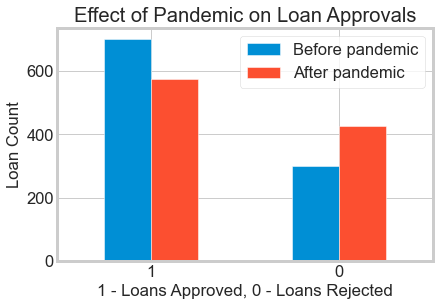

In [245]:
comparison = pd.DataFrame({'Before pandemic': X_test['classification'].value_counts(),
                   'After pandemic': df['classification'].value_counts()})
ax = comparison.plot.bar(rot=0)
plt.title("Effect of Pandemic on Loan Approvals")
plt.xlabel("1 - Loans Approved, 0 - Loans Rejected")
plt.ylabel("Loan Count")

In [246]:
X_clean = df.drop(['classification'], axis=1)
y_clean = df['classification']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean,y_clean,test_size=0.2, random_state=1)

[0]	validation_0-auc:0.89409	validation_1-auc:0.86443
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.94955	validation_1-auc:0.90445
Stopping. Best iteration:
[16]	validation_0-auc:0.93803	validation_1-auc:0.91523

[[ 69  15]
 [ 15 101]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        84
           1       0.87      0.87      0.87       116

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



Model Final Generalization Accuracy: 0.850000


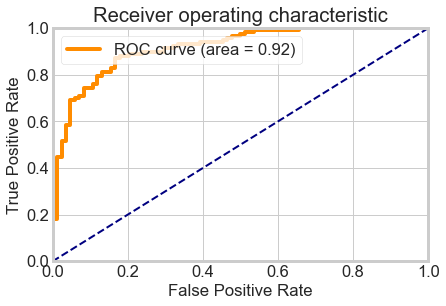

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.005, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=17, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.555,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [247]:
params2={
    'n_estimators':3000,
    'objective': 'binary:logistic',
    'learning_rate': 0.005,
    #'gamma':0.01,
    'subsample':0.555,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'max_depth':8,
    #'seed':1024,
    'n_jobs' : -1
}

xgbclf(params2, X_train_clean, y_train_clean, X_test_clean, y_test_clean)

LogisticRegression
LogisticRegression() 

Precision is 0.8362068965517241
Recall is 0.8362068965517241
F1-Score is 0.8362068965517241
Accuracy Score is 0.81


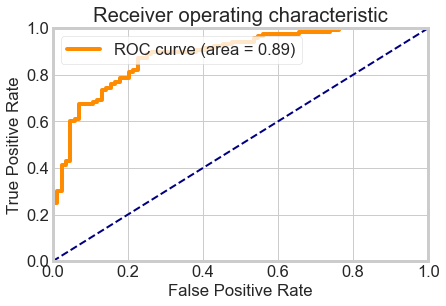

In [248]:
logregclf(X_train_clean, y_train_clean, X_test_clean, y_test_clean)

0.58


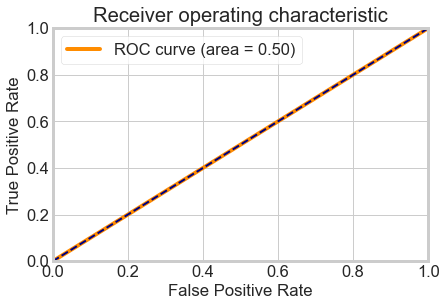

<Figure size 432x432 with 0 Axes>

In [249]:
clf_NN = MLPClassifier(hidden_layer_sizes=(13,10,2),max_iter=1000)
clf_NN.fit(X_train_clean,y_train_clean)     
predict_NN = clf_NN.predict(X_test_clean)
predictproba_NN = clf_NN.predict_proba(X_test_clean)[:,1]
NNAccuracy = accuracy_score(y_test_clean,predict_NN)
print(NNAccuracy)
get_roc (y_test_clean,predictproba_NN)
plt.show()
plt.figure(figsize=(6,6))
#plot_confusion_matrix(predict_NN, normalize=True)
plt.show()

In [250]:
df.loc[(((df['savings_... _ 100 DM'] == 1) | (df['account_check_status__ 0 DM'] == 1)) & (df['job_unemployed/ unskilled - non-resident'] == 1) & (df['classification'] == 0))]

credit_amount  duration_in_month  installment_as_income_perc  \
47            1352                  6                           1   
73            5954                 42                           2   
82            1568                 18                           3   
100           1469                 24                           4   
112           6260                 18                           3   
191           3844                 48                           4   
220            625                 12                           4   
237           2767                 21                           4   
259           1154                 11                           4   
300            672                  6                           1   
309            276                  9                           4   
313            685                 12                           2   
336           2101                 13                           2   
348           1743                  6                           1   
355           1246                 24                           4   
364           2473                 18                           4   
384           4272                 30                           2   
391            983                 12                           1   
478           1037                 12                           3   
488           1418                 10                           3   
498           1301                 18                           4   
524           1113                 18                           4   
574           1082                  9                           4   
597           4241                 24                           1   
602           1837                 24                           4   
634           1355                 24                           3   
640            750                 18                           4   
641           1308                 15                           4   
656            888                 12                           4   
670           4139                 24                           3   
684           9857                 36                           1   
691           2631                 15                           3   
697            926                 12                           1   
732            760                  8                           4   
752            841                 12                           2   
765           1155                 12                           3   
783            836                 12                           4   
785           1941                 18                           4   
801           1795                 18                           3   
806            590                  6                           3   
811            484                  6                           3   
909           3195                  9                           1   
989           1743                 24                           4   
991           1569                 15                           4   

     present_res_since  age  credits_this_bank  people_under_maintenance  \
47                   2   23                  1                         1   
73                   1   41                  2                         1   
82                   4   24                  1                         1   
100                  4   41                  1                         1   
112                  3   28                  1                         1   
191                  4   34                  1                         2   
220                  1   26                  1                         1   
237                  2   61                  2                         1   
259                  4   57                  3                         1   
300                  4   54                  1                         1   
309                  4   22                  1                 

In [251]:
potentialExposureBeforePandemic = data_clean.loc[(((data_clean['savings_... _ 100 DM'] == 1) | (data_clean['account_check_status__ 0 DM'] == 1)) & (data_clean['job_unemployed/ unskilled - non-resident'] == 1) & (data_clean['classification'] == 1))]
potentialExposureBeforePandemic 

credit_amount  duration_in_month  installment_as_income_perc  \
47            1352                  6                           1   
187           1175                 16                           2   
300            672                  6                           1   
438           3394                 42                           4   
697            926                 12                           1   
756           1299                  6                           1   
883           1098                 18                           4   
950           3590                 18                           3   

     present_res_since  age  credits_this_bank  people_under_maintenance  \
47                   2   23                  1                         1   
187                  3   68                  3                         1   
300                  4   54                  1                         1   
438                  4   65                  2                         1   
697                  2   38                  1                         1   
756                  1   74                  3                         2   
883                  4   65                  2                         1   
950                  3   40                  3                         2   

     classification  account_check_status_0 _= ... _ 200 DM  \
47                1                                       0   
187               1                                       1   
300               1                                       0   
438               1                                       0   
697               1                                       0   
756               1                                       0   
883               1                                       0   
950               1                                       1   

     account_check_status__ 0 DM  ...  housing_own  housing_rent  \
47                             1  ...            0             1   
187                            0  ...            0             0   
300                            0  ...            1             0   
438                            1  ...            1             0   
697                            0  ...            1             0   
756                            0  ...            1             0   
883                            0  ...            1             0   
950                            0  ...            1             0   

     job_management/ self-employed/ highly qualified employee/ officer  \
47                                                   0                   
187                                                  0                   
300                                                  0                   
438                                                  0                   
697                                                  0                   
756                                                  0                   
883                                                  0                   
950                                                  0                   

     job_skilled employee / official  \
47                                 0   
187                                0   
300                                0   
438                                0   
697                                0   
756                                0   
883                                0   
950                                0   

     job_unemployed/ unskilled - non-resident  job_unskilled - resident  \
47                                          1                         0   
187                                         1                         0   
300                                         1                         0   
438                                         1                         0   
697                                         1                         0   
756                                    

In [252]:
CreditRiskBeforePandemic =  potentialExposureBeforePandemic['credit_amount'].sum()
CreditRiskBeforePandemic

13506

In [253]:
potentialExposureAfterPandemic = df.loc[(((df['savings_... _ 100 DM'] == 1) | (df['account_check_status__ 0 DM'] == 1)) & (df['job_unemployed/ unskilled - non-resident'] == 1) & (df['classification'] == 1))]
potentialExposureAfterPandemic 

credit_amount  duration_in_month  installment_as_income_perc  \
15            1282                 24                           4   
35            4746                 45                           4   
42            6204                 18                           2   
50            2333                 24                           4   
137            766                 12                           4   
187           1175                 16                           2   
215            932                  6                           1   
233            866                 18                           4   
255           7418                 60                           1   
307            727                 12                           4   
317           4351                 24                           1   
333          11590                 48                           2   
339           1521                 10                           4   
379            362                  6                           4   
422            958                 12                           2   
429           1190                 18                           2   
438           3394                 42                           4   
439            609                 12                           4   
480           3573                 12                           1   
559           1928                 18                           2   
581           3124                 12                           1   
583           2384                 36                           4   
593           2718                 24                           3   
595            931                  6                           1   
611           1240                 10                           1   
651           1922                 12                           4   
709           2118                  9                           2   
723            790                  9                           4   
737           4380                 18                           3   
739           4280                 30                           4   
741           1048                 10                           4   
756           1299                  6                           1   
782           1410                 12                           2   
809           1778                 15                           2   
883           1098                 18                           4   
911           4736                 24                           2   
950           3590                 18                           3   
957           1154                  9                           2   
964            454                  6                           3   
966           2520                 27                           4   
972           1193                 24                           1   

     present_res_since  age  credits_this_bank  people_under_maintenance  \
15                   2   32                  1                         1   
35                   2   25                  2                         1   
42                   4   44                  1                         2   
50                   2   29                  1                         1   
137                  3   66                  1                         1   
187                  3   68                  3                         1   
215                  3   39                  2                         1   
233                  2   25                  1                         1   
255                  1   27                  1                         1   
307                  3   33                  1                         1   
317                  4   48                  1                         1   
333                  4   24                  2                         1   
339                  2   31                  1                         1   
379                  4   52               

In [254]:
CreditRiskAfterPandemic =  potentialExposureAfterPandemic['credit_amount'].sum()
CreditRiskAfterPandemic

100092

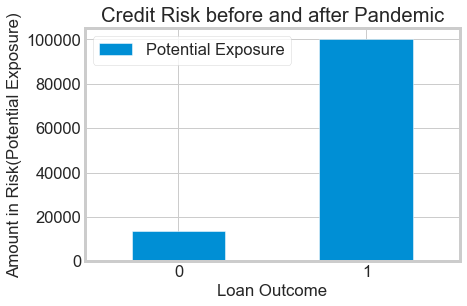

In [258]:
barchart = pd.DataFrame({'lab':['Before Pandemic', 'After Pandemic'], 'Potential Exposure':[CreditRiskBeforePandemic, CreditRiskAfterPandemic]})
ax = barchart.plot.bar(y='Potential Exposure', rot=0, title = "Credit Risk before and after Pandemic", ylabel="Amount in Risk(Potential Exposure)", xlabel="Loan Outcome")

We can see how much potential exposure a financial institution can have after a pandemic as compared to before.

## 8. Conclusion 

The goal of each and every business is to make profit. For a lender, profit depends on whether
or not the borrower repays the principal as well as interest. Without repayment, the lender would
incur a loss and that loss can even potentially be greater than the initial loan amount when lawyer,
court and collection fees are taken into consideration. Therefore, it is critically important for a
lender to be able to identify whether a potential borrower can and will make all of his or her loan
payments. The purpose of this project is to identify the characteristics (limited to those found in
the dataset) of persons who are likely to default on their loans and provide a simple framework for
borrowers to make such a distinction. In order to make predictions on which potential borrower is
or is not likely to default, binary classification predictive models have been created using a variety
of machine learning algorithms.

The two big takeaways from this project would be on how we have improved our prediction accuracy
levels by clustering and how a pandemic has been dealt with. After clustering, we have been able
to divide customers on the basis of age, sex and the credit amount which has allowed us to make
highly accurate predictions for each of these groups specifically. In order to conclude the project, it
can be said on a satisfactory note that a loan prediction system has successfully been formed which
can make accurate predictions with a highly advanced novel method that has not been explored
on a big scale before. The model is specially equipped to handle uncertain situations as well like
a global market crash or a pandemic. The model can be explored and tested real-time through a
user interface that has been created.

With every day passing by, technology is improving at a very fast pace to make human life seamless.
With this project, the goal is similar - to make financial lives easier for both individuals and financial
institutions.

"Financial freedom is available to those who learn about it and work for it." - Robert Kiyosaki.